# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rizky Putra Reinanda
- **Email:** reinanda1908@gmail.com
- **ID Dicoding:** Rizky Putra Reinanda

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tingkat polusi PM2.5 dari tahun ke tahun di berbagai stasiun?
- Jam berapakah rata-rata pencemaran udara meningkat secara global berdasarkan PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analisa Lanjutan
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import LinearSegmentedColormap
import folium
import branca.colormap as cm

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
aotizhongxin_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [3]:
changping_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Changping_20130301-20170228.csv')
changping_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [4]:
dingling_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Dingling_20130301-20170228.csv')
dingling_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [5]:
dongsi_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

In [6]:
guanyuan_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

In [7]:
gucheng_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Gucheng_20130301-20170228.csv')
gucheng_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

In [8]:
huairou_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Huairou_20130301-20170228.csv')
huairou_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

In [9]:
nongzhanguan_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
nongzhanguan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [10]:
shunyi_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Shunyi_20130301-20170228.csv')
shunyi_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

In [11]:
tiantan_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Tiantan_20130301-20170228.csv')
tiantan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

In [12]:
wanliu_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Wanliu_20130301-20170228.csv')
wanliu_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu

In [13]:
wanshouxigong_df = pd.read_csv('/content/drive/MyDrive/Dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
wanshouxigong_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

#### **Insight:**
- Pada Air Quality Dataset, terdapat 12 data tabel yang terpisah berdasarkan station-nya.
- Pada setiap tabel di dataset terdapat 18 atribut yakni:
  1. **No** : Nomor urut data
  2. **year** : Tahun pengukuran kualitas udara
  3. **month** : Bulan pengukuran kualitas udara (1-12)
  4. **day** : Tanggal dalam bulan (1-31)
  5. **hour** : Jam pengukuran (0-23)
  6. **PM2.5** : Konsentrasi partikel mikroskopis berdiameter ≤ 2.5 μm (µg/m³)
  7. **PM10** : Konsentrasi partikel mikroskopis berdiameter ≤ 10 μm (µg/m³)
  8. **SO2** : Gas dari pembakaran fosil (µg/m³)
  9. **NO2** : Gas dari kendaraan (µg/m³)bermotor & proses pembakaran
  10. **CO** : Gas beracun dari pembakaran tidak sempurna (µg/m³)
  11. **O3** : Ozon di permukaan tanah (µg/m³)
  12. **TEMP** : Suhu udara (°C)
  13. **PRES** : Tekanan udara (hPa)
  14. **DEWP** : Titik embun (°C)
  15. **RAIN** : Curah hujan (mm)
  16. **wd** : Arah angin (N,NE, E, dll)
  17. **WSPM** : Kecepatan angin (m/s)
  18. **station** : Nama stasiun pemantauan kualitas udara

### Assessing Data

Menilai Tabel **aotizhongxin_df**

In [14]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [15]:
aotizhongxin_na = aotizhongxin_df.isna().sum().to_frame('Jumlah N/A')
aotizhongxin_na['Persentase N/A'] = ((aotizhongxin_df.isna().sum()) / len(aotizhongxin_df) * 100).round(2)
aotizhongxin_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           925            2.64
PM10            718            2.05
SO2             935            2.67
NO2            1023            2.92
CO             1776            5.07
O3             1719            4.90
TEMP             20            0.06
PRES             20            0.06
DEWP             20            0.06
RAIN             20            0.06
wd               81            0.23
WSPM             14            0.04
station           0            0.00

In [16]:
print("Jumlah duplikasi : ", aotizhongxin_df.duplicated().sum())

Jumlah duplikasi :  0


In [17]:
aotizhongxin_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

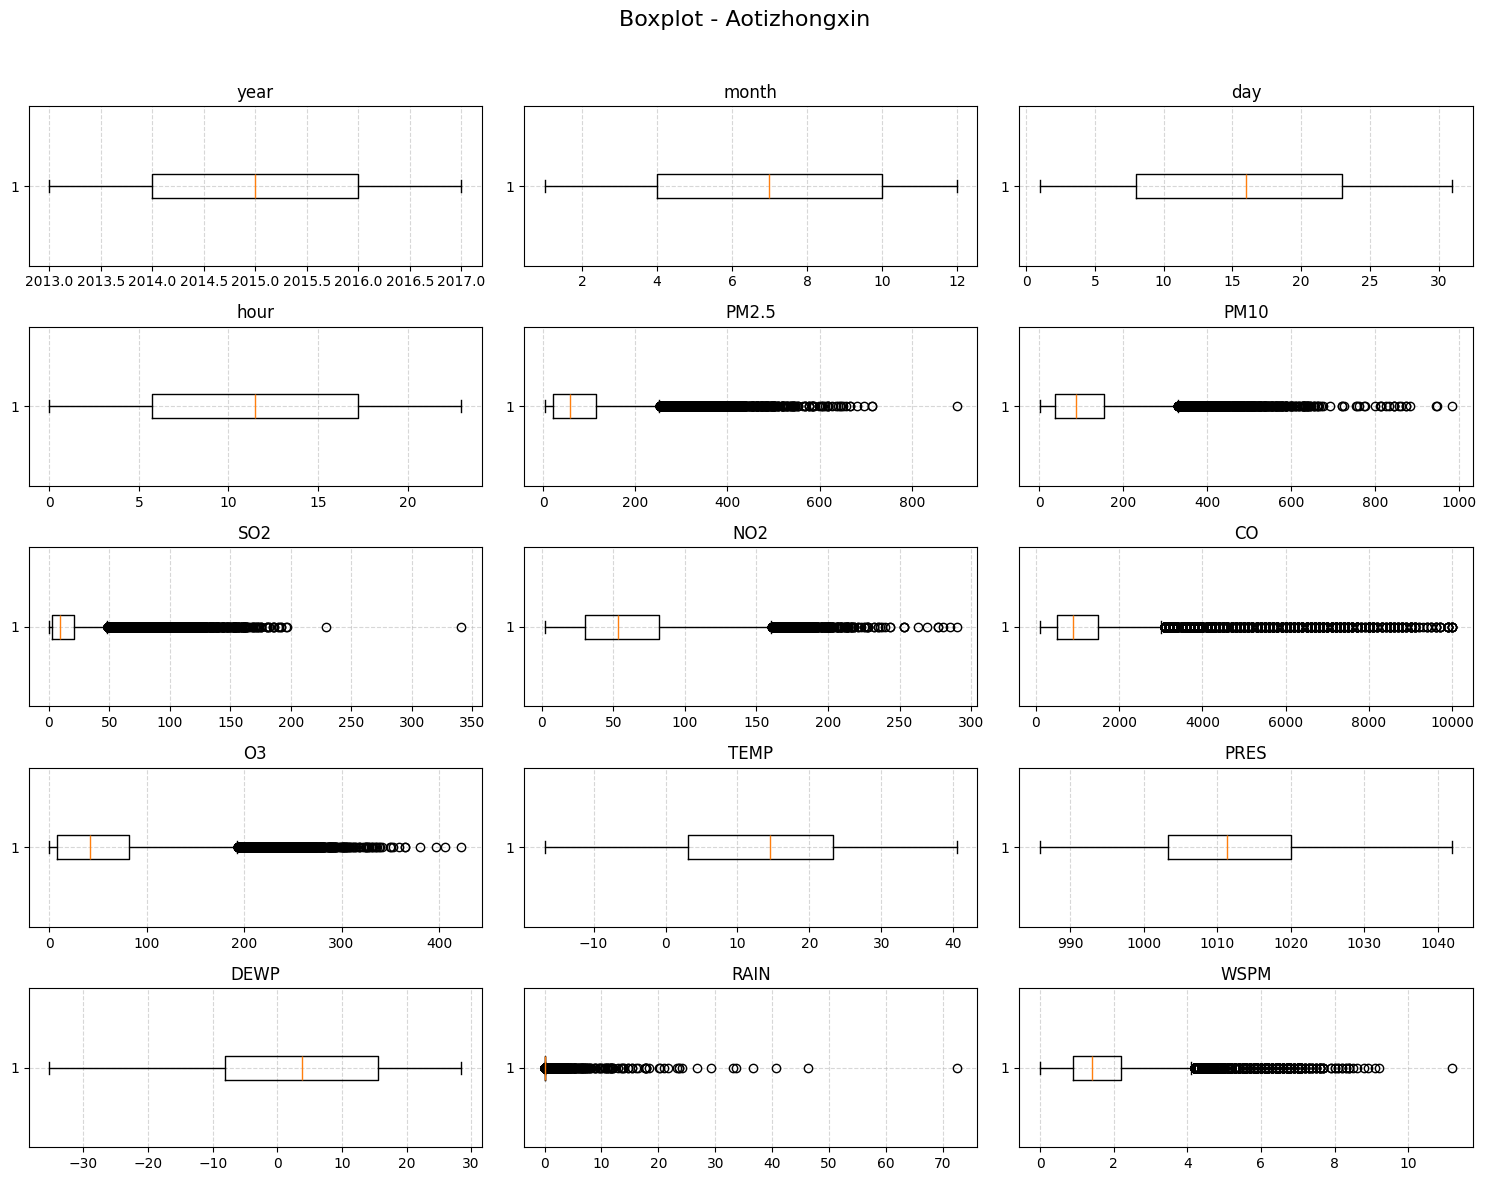

In [18]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        aotizhongxin_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Aotizhongxin", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **changping_df**

In [19]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
changping_na = changping_df.isna().sum().to_frame('Jumlah N/A')
changping_na['Persentase N/A'] = ((changping_df.isna().sum()) / len(changping_df) * 100).round(2)
changping_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           774            2.21
PM10            582            1.66
SO2             628            1.79
NO2             667            1.90
CO             1521            4.34
O3              604            1.72
TEMP             53            0.15
PRES             50            0.14
DEWP             53            0.15
RAIN             51            0.15
wd              140            0.40
WSPM             43            0.12
station           0            0.00

In [21]:
print("Jumlah duplikasi : ", changping_df.duplicated().sum())

Jumlah duplikasi :  0


In [22]:
changping_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331     29.519796   1103.056282   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%      100.000000    131.000000     18.000000     60.358200   1400.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      57.940003     13.686111   1007.760278      1.505495      0.060366   
std       54.316674     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.636600      3.400000    999.300000    -10.200000      0.000000   
50%       46.000000     14.700000   1007.400000      1.800000      0.000000   
75%       80.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

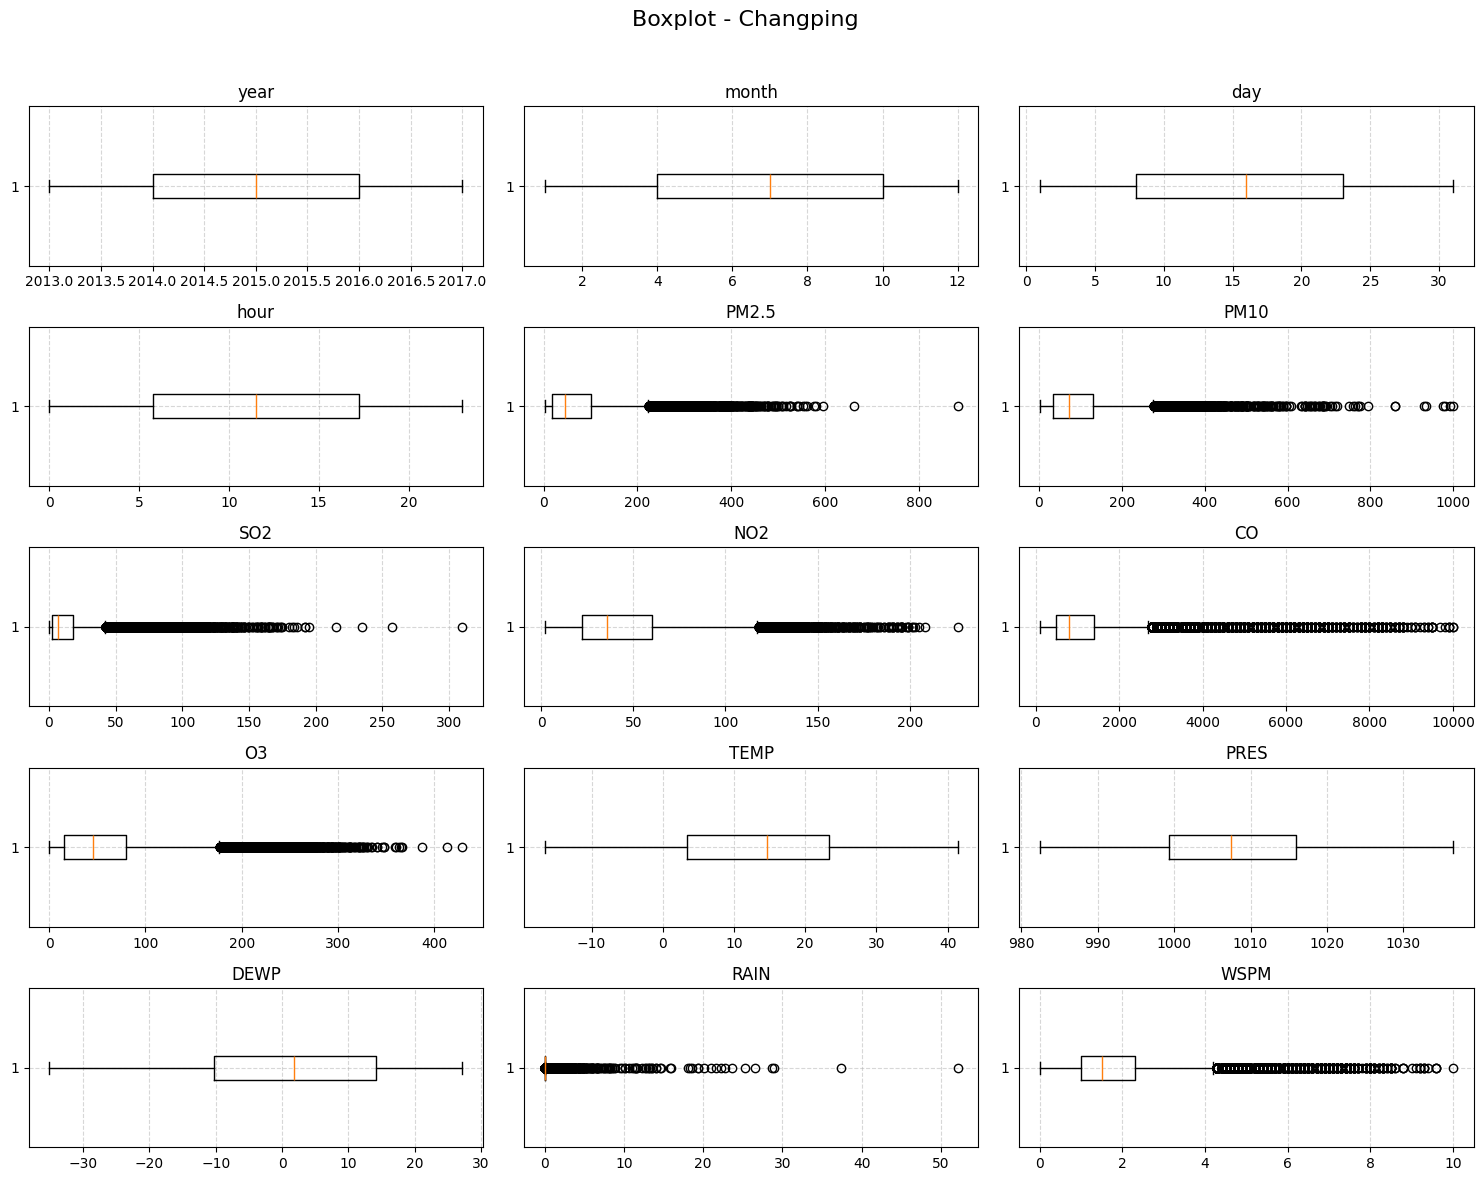

In [23]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        changping_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Changping", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **dingling_df**

In [24]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
dingling_na = dingling_df.isna().sum().to_frame('Jumlah N/A')
dingling_na['Persentase N/A'] = ((dingling_df.isna().sum()) / len(dingling_df) * 100).round(2)
dingling_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           779            2.22
PM10            656            1.87
SO2             730            2.08
NO2            1234            3.52
CO             2012            5.74
O3             1214            3.46
TEMP             53            0.15
PRES             50            0.14
DEWP             53            0.15
RAIN             51            0.15
wd              140            0.40
WSPM             43            0.12
station           0            0.00

In [26]:
print("Jumlah duplikasi : ", dingling_df.duplicated().sum())

Jumlah duplikasi :  0


In [27]:
dingling_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

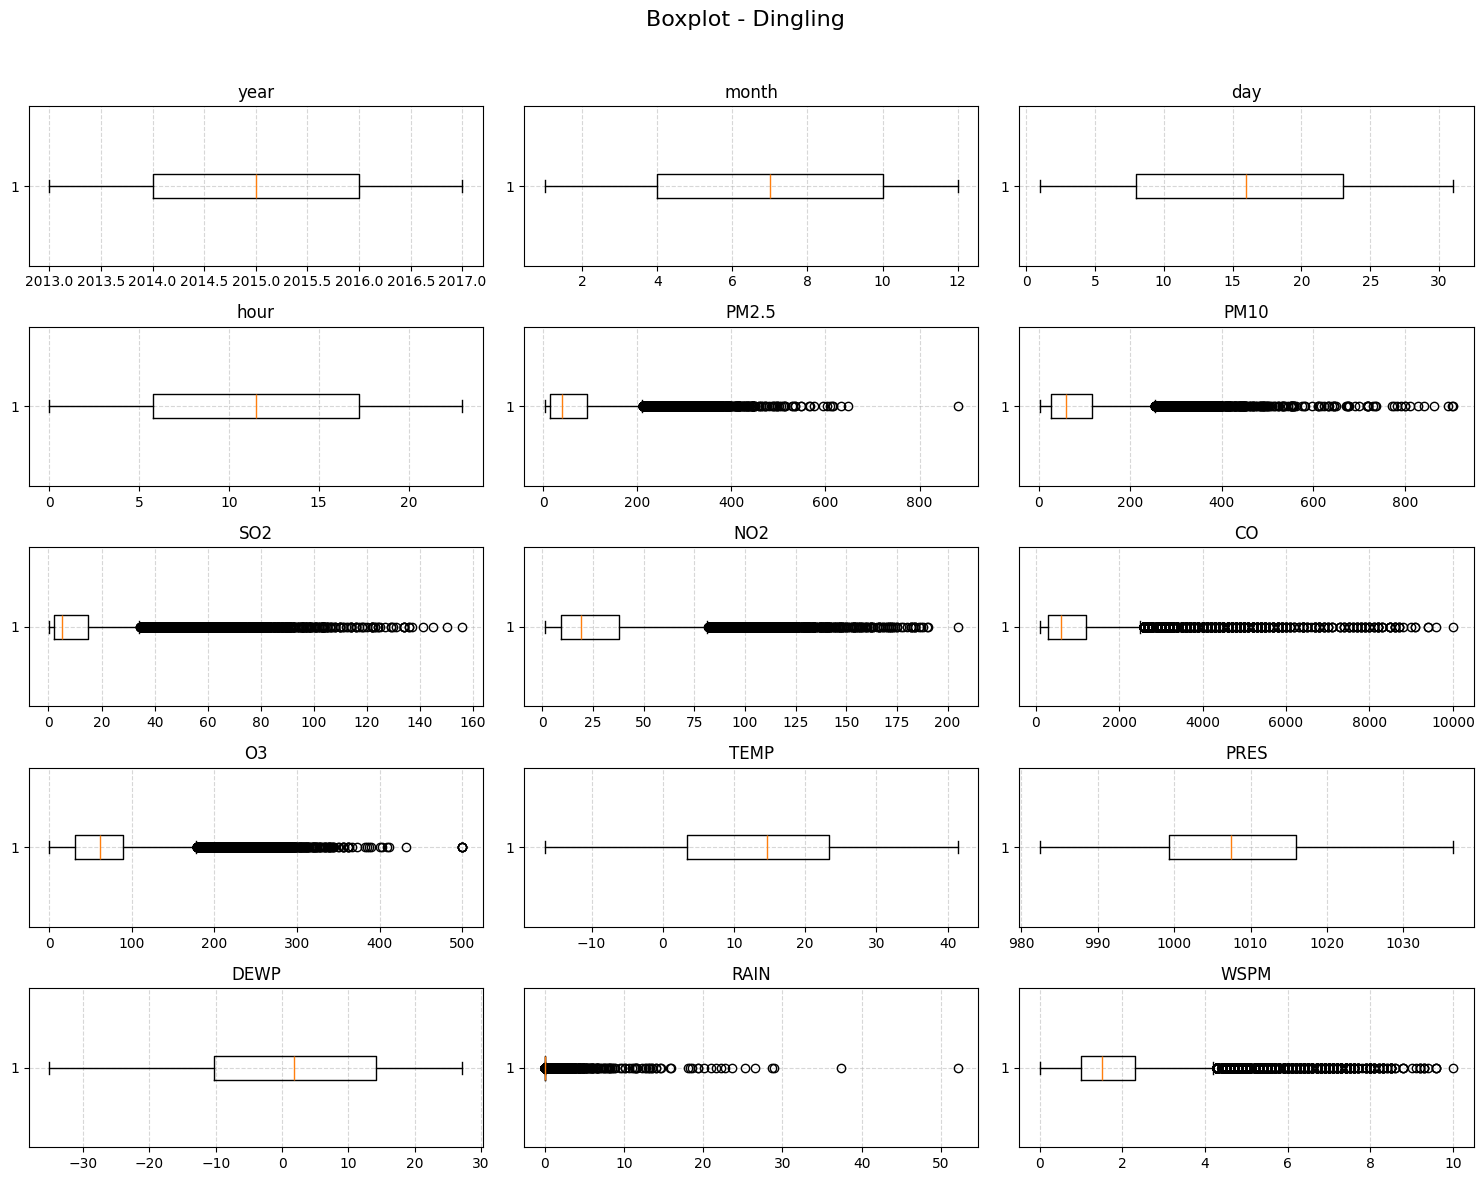

In [28]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        dingling_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Dingling", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **dongsi_df**

In [29]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [30]:
dongsi_na = dongsi_df.isna().sum().to_frame('Jumlah N/A')
dongsi_na['Persentase N/A'] = ((dongsi_df.isna().sum()) / len(dongsi_df) * 100).round(2)
dongsi_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           750            2.14
PM10            553            1.58
SO2             663            1.89
NO2            1601            4.57
CO             3197            9.12
O3              664            1.89
TEMP             20            0.06
PRES             20            0.06
DEWP             20            0.06
RAIN             20            0.06
wd               78            0.22
WSPM             14            0.04
station           0            0.00

In [31]:
print("Jumlah duplikasi : ", dongsi_df.duplicated().sum())

Jumlah duplikasi :  0


In [32]:
dongsi_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

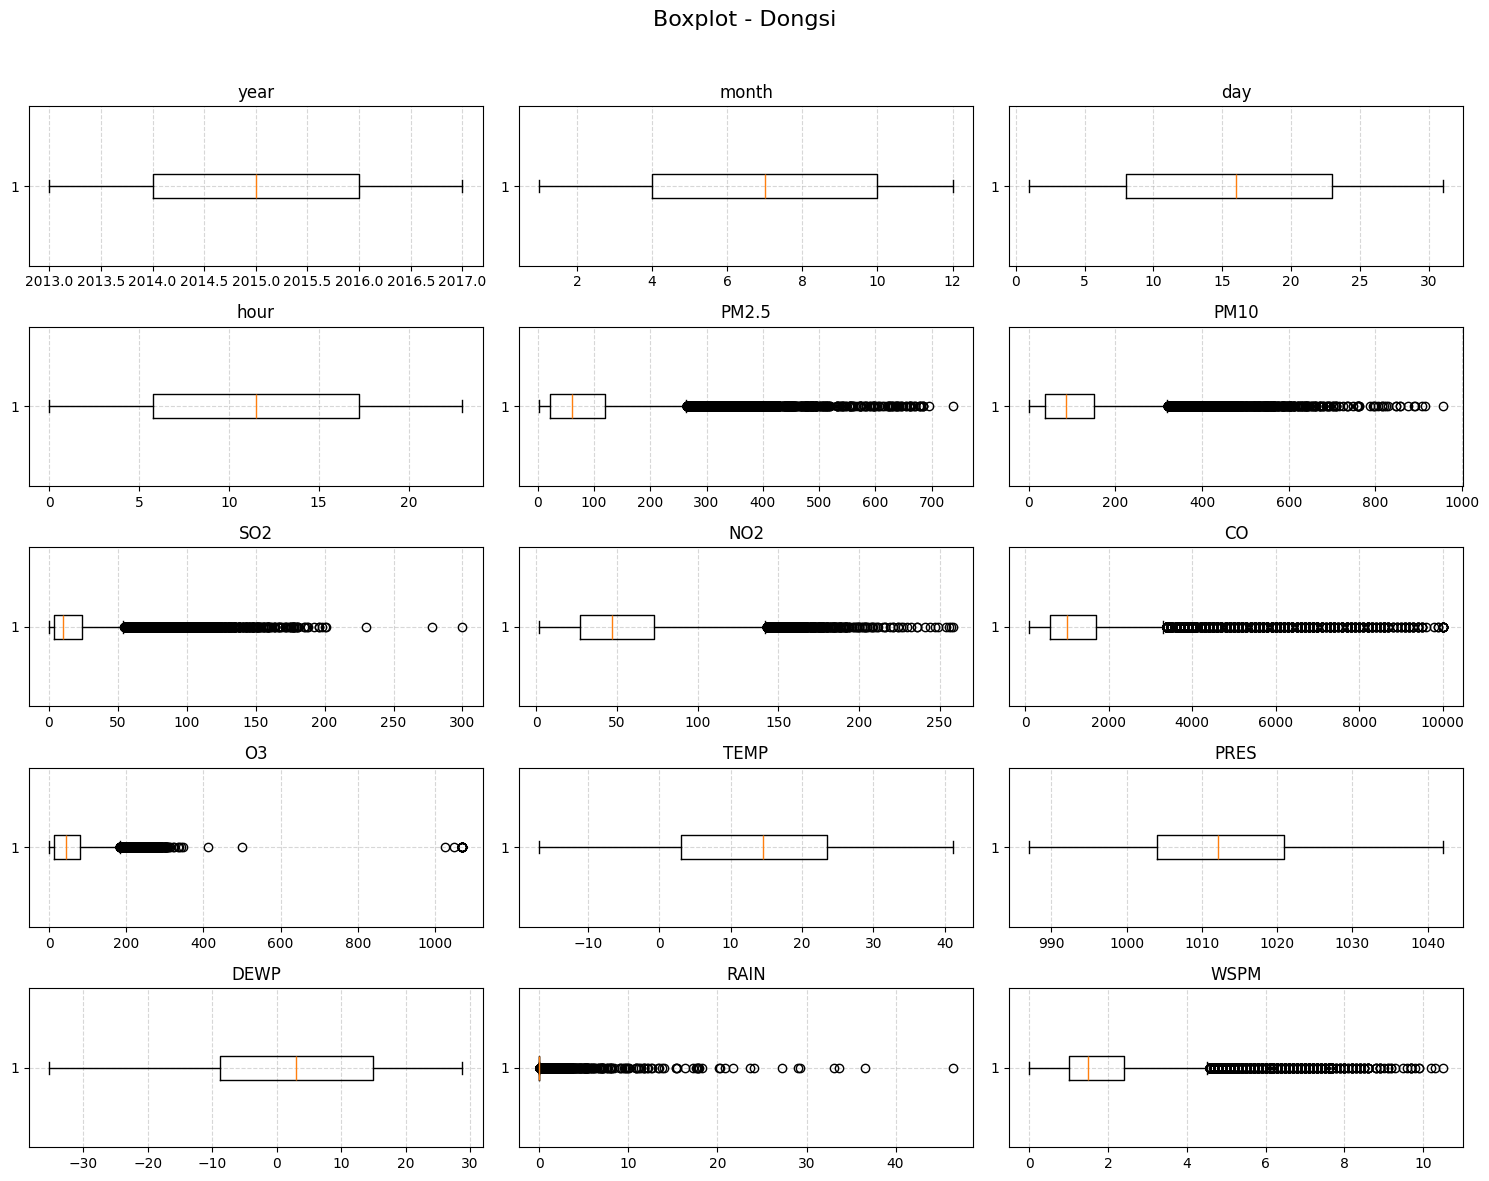

In [33]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        dongsi_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Dongsi", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **guanyuan_df**

In [34]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [35]:
guanyuan_na = guanyuan_df.isna().sum().to_frame('Jumlah N/A')
guanyuan_na['Persentase N/A'] = ((guanyuan_df.isna().sum()) / len(guanyuan_df) * 100).round(2)
guanyuan_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           616            1.76
PM10            429            1.22
SO2             474            1.35
NO2             659            1.88
CO             1753            5.00
O3             1173            3.35
TEMP             20            0.06
PRES             20            0.06
DEWP             20            0.06
RAIN             20            0.06
wd               81            0.23
WSPM             14            0.04
station           0            0.00

In [36]:
print("Jumlah duplikasi : ", guanyuan_df.duplicated().sum())

Jumlah duplikasi :  0


In [37]:
guanyuan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

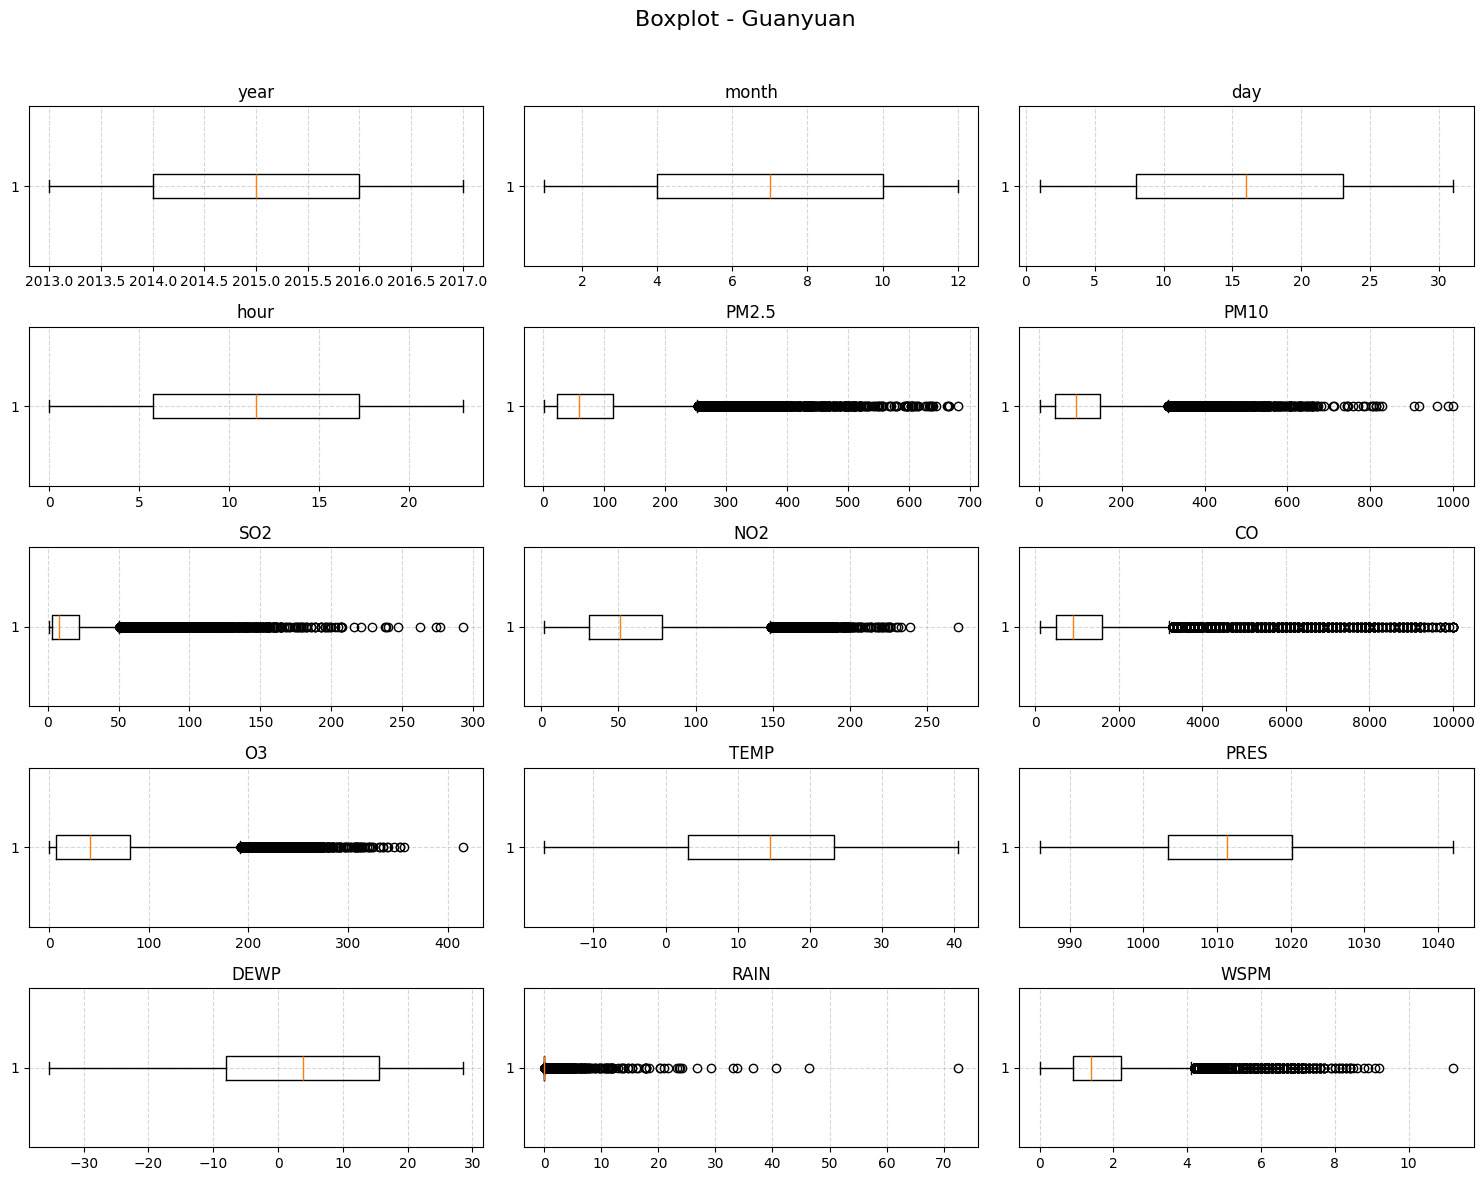

In [38]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        guanyuan_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Guanyuan", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **gucheng_df**

In [39]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
gucheng_na = gucheng_df.isna().sum().to_frame('Jumlah N/A')
gucheng_na['Persentase N/A'] = ((gucheng_df.isna().sum()) / len(gucheng_df) * 100).round(2)
gucheng_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           646            1.84
PM10            381            1.09
SO2             507            1.45
NO2             668            1.91
CO             1401            4.00
O3              729            2.08
TEMP             51            0.15
PRES             50            0.14
DEWP             51            0.15
RAIN             43            0.12
wd              159            0.45
WSPM             42            0.12
station           0            0.00

In [41]:
print("Jumlah duplikasi : ", gucheng_df.duplicated().sum())

Jumlah duplikasi :  0


In [42]:
gucheng_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

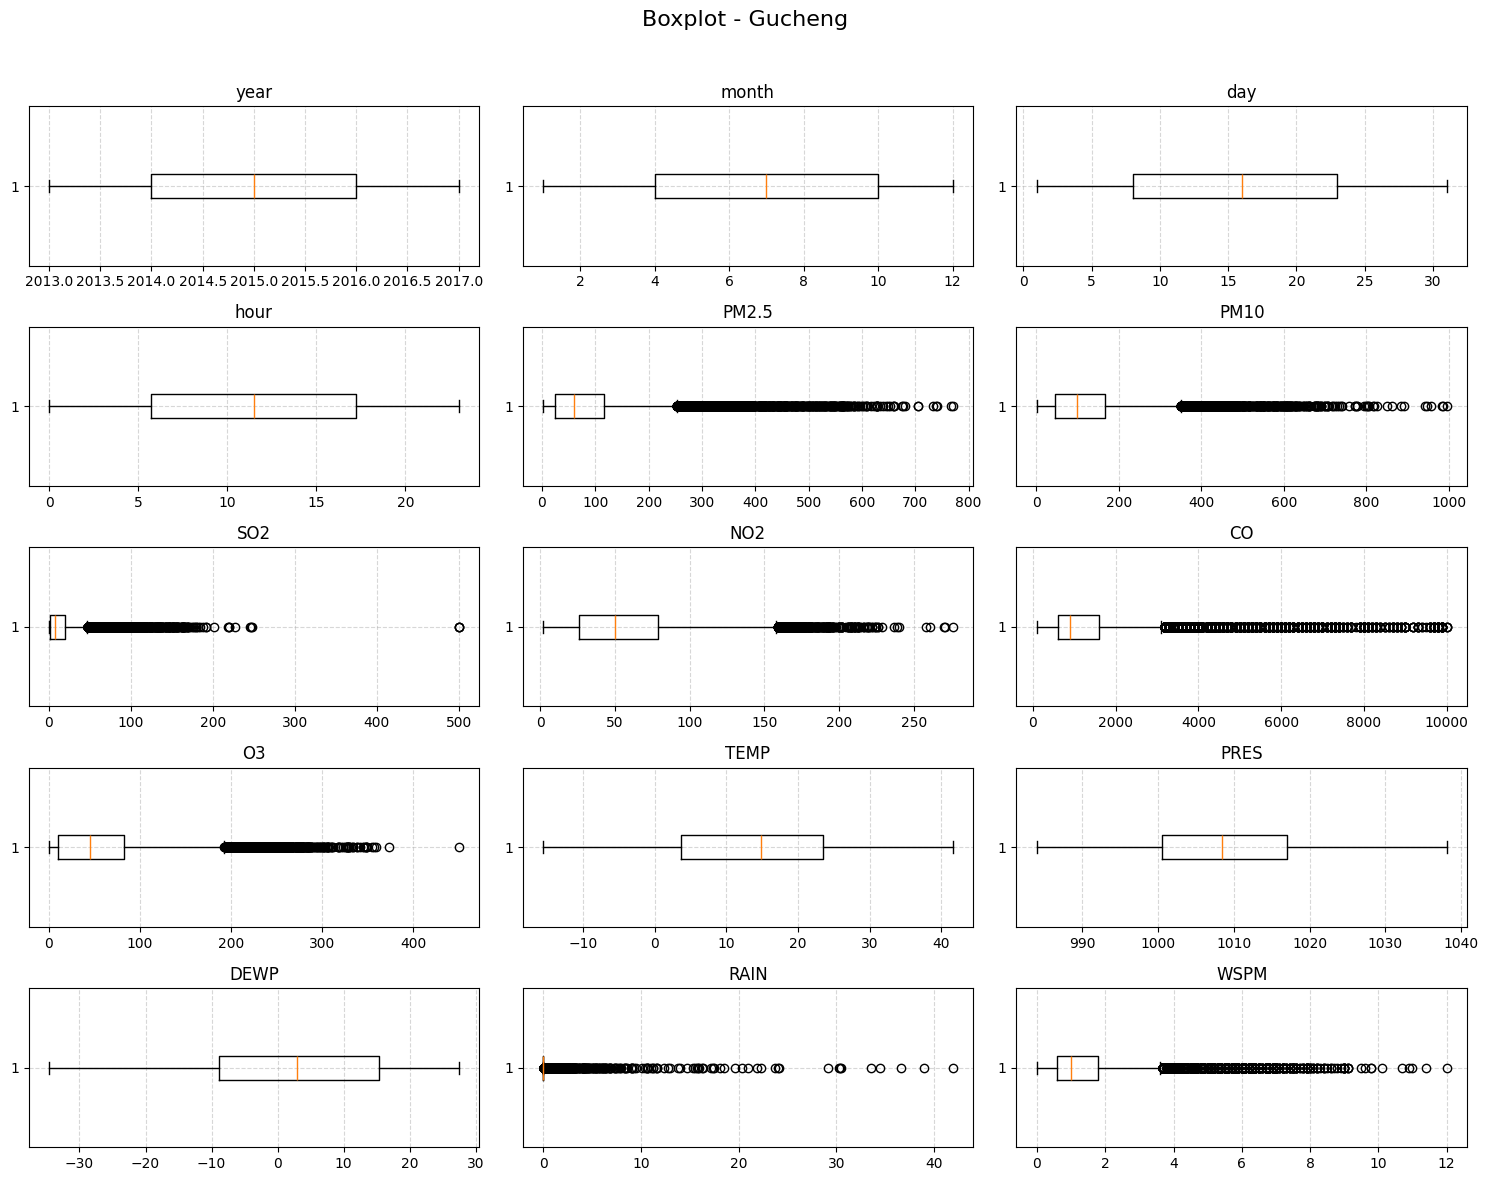

In [43]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        gucheng_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Gucheng", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **huairou_df**

In [44]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [45]:
huairou_na = huairou_df.isna().sum().to_frame('Jumlah N/A')
huairou_na['Persentase N/A'] = ((huairou_df.isna().sum()) / len(huairou_df) * 100).round(2)
huairou_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           953            2.72
PM10            777            2.22
SO2             980            2.79
NO2            1639            4.67
CO             1422            4.06
O3             1151            3.28
TEMP             51            0.15
PRES             53            0.15
DEWP             53            0.15
RAIN             55            0.16
wd              302            0.86
WSPM             49            0.14
station           0            0.00

In [46]:
print("Jumlah duplikasi : ", huairou_df.duplicated().sum())

Jumlah duplikasi :  0


In [47]:
huairou_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

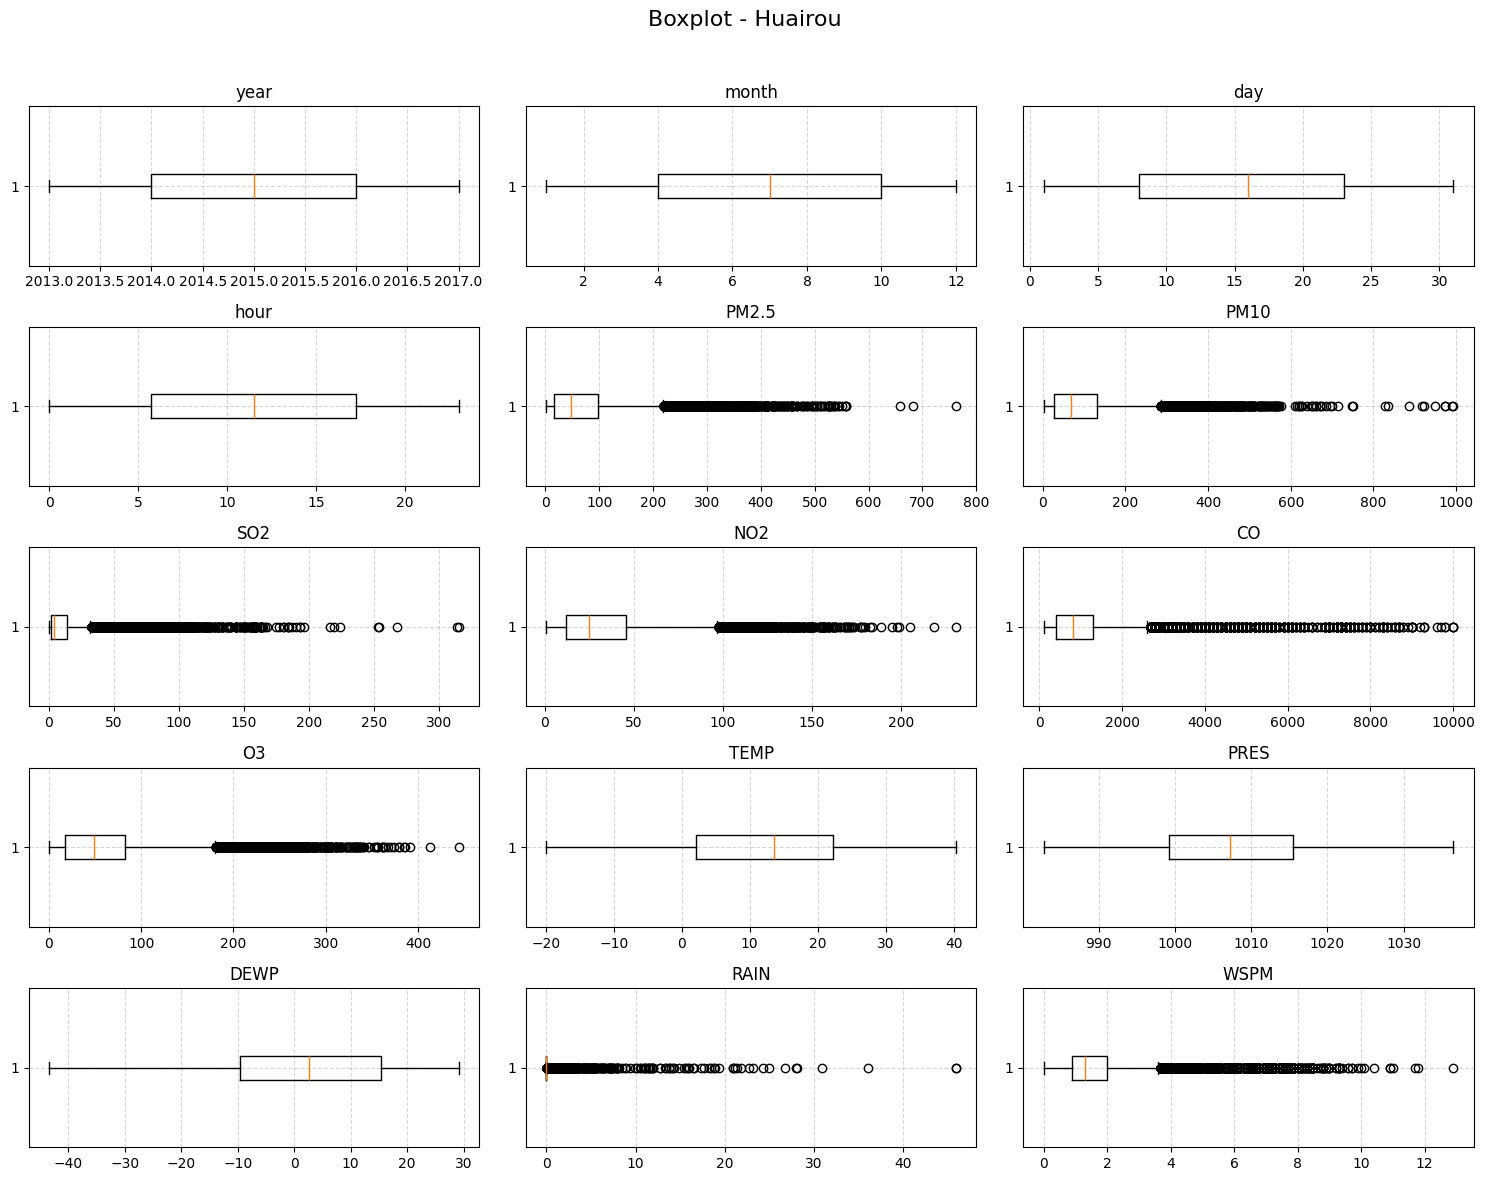

In [48]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        huairou_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Huairou", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **nongzhanguan_df**

In [49]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [50]:
nongzhanguan_na = nongzhanguan_df.isna().sum().to_frame('Jumlah N/A')
nongzhanguan_na['Persentase N/A'] = ((nongzhanguan_df.isna().sum()) / len(nongzhanguan_df) * 100).round(2)
nongzhanguan_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           628            1.79
PM10            440            1.25
SO2             446            1.27
NO2             692            1.97
CO             1206            3.44
O3              506            1.44
TEMP             20            0.06
PRES             20            0.06
DEWP             20            0.06
RAIN             20            0.06
wd               78            0.22
WSPM             14            0.04
station           0            0.00

In [51]:
print("Jumlah duplikasi : ", nongzhanguan_df.duplicated().sum())

Jumlah duplikasi :  0


In [52]:
nongzhanguan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

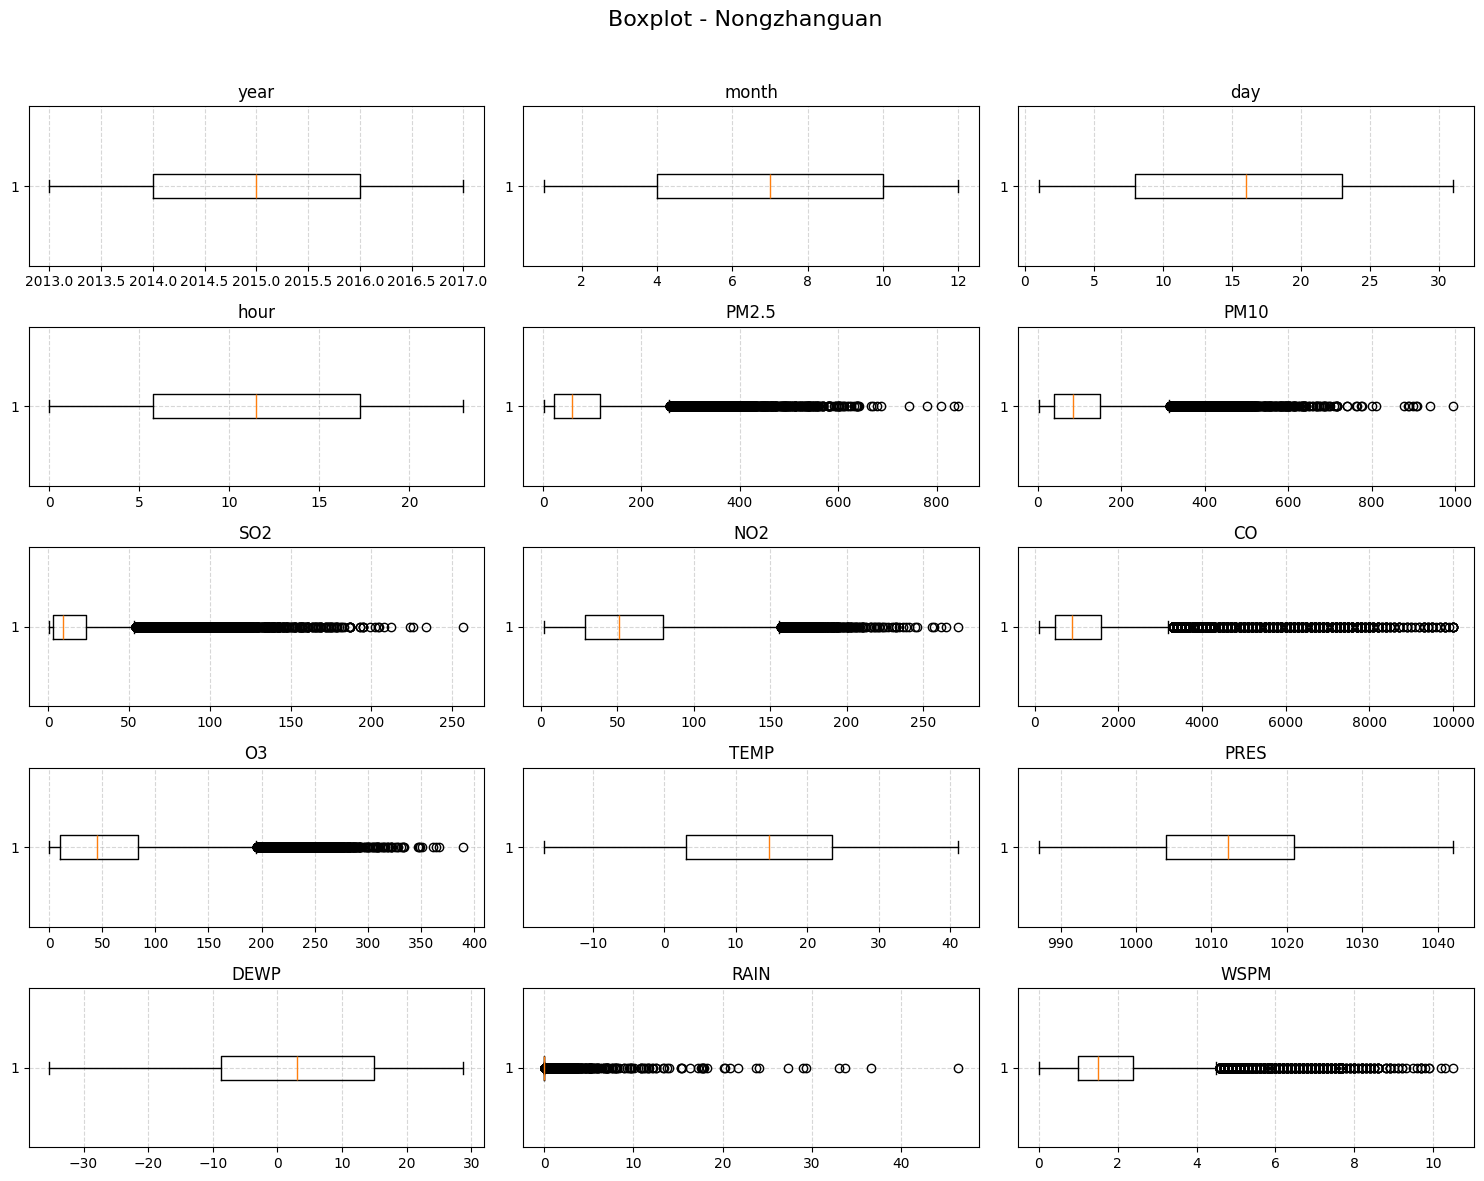

In [53]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        nongzhanguan_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Nongzhanguan", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **shunyi_df**

In [54]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [55]:
shunyi_na = shunyi_df.isna().sum().to_frame('Jumlah N/A')
shunyi_na['Persentase N/A'] = ((shunyi_df.isna().sum()) / len(shunyi_df) * 100).round(2)
shunyi_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           913            2.60
PM10            548            1.56
SO2            1296            3.70
NO2            1365            3.89
CO             2178            6.21
O3             1489            4.25
TEMP             51            0.15
PRES             51            0.15
DEWP             54            0.15
RAIN             51            0.15
wd              483            1.38
WSPM             44            0.13
station           0            0.00

In [56]:
print("Jumlah duplikasi : ", shunyi_df.duplicated().sum())

Jumlah duplikasi :  0


In [57]:
shunyi_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

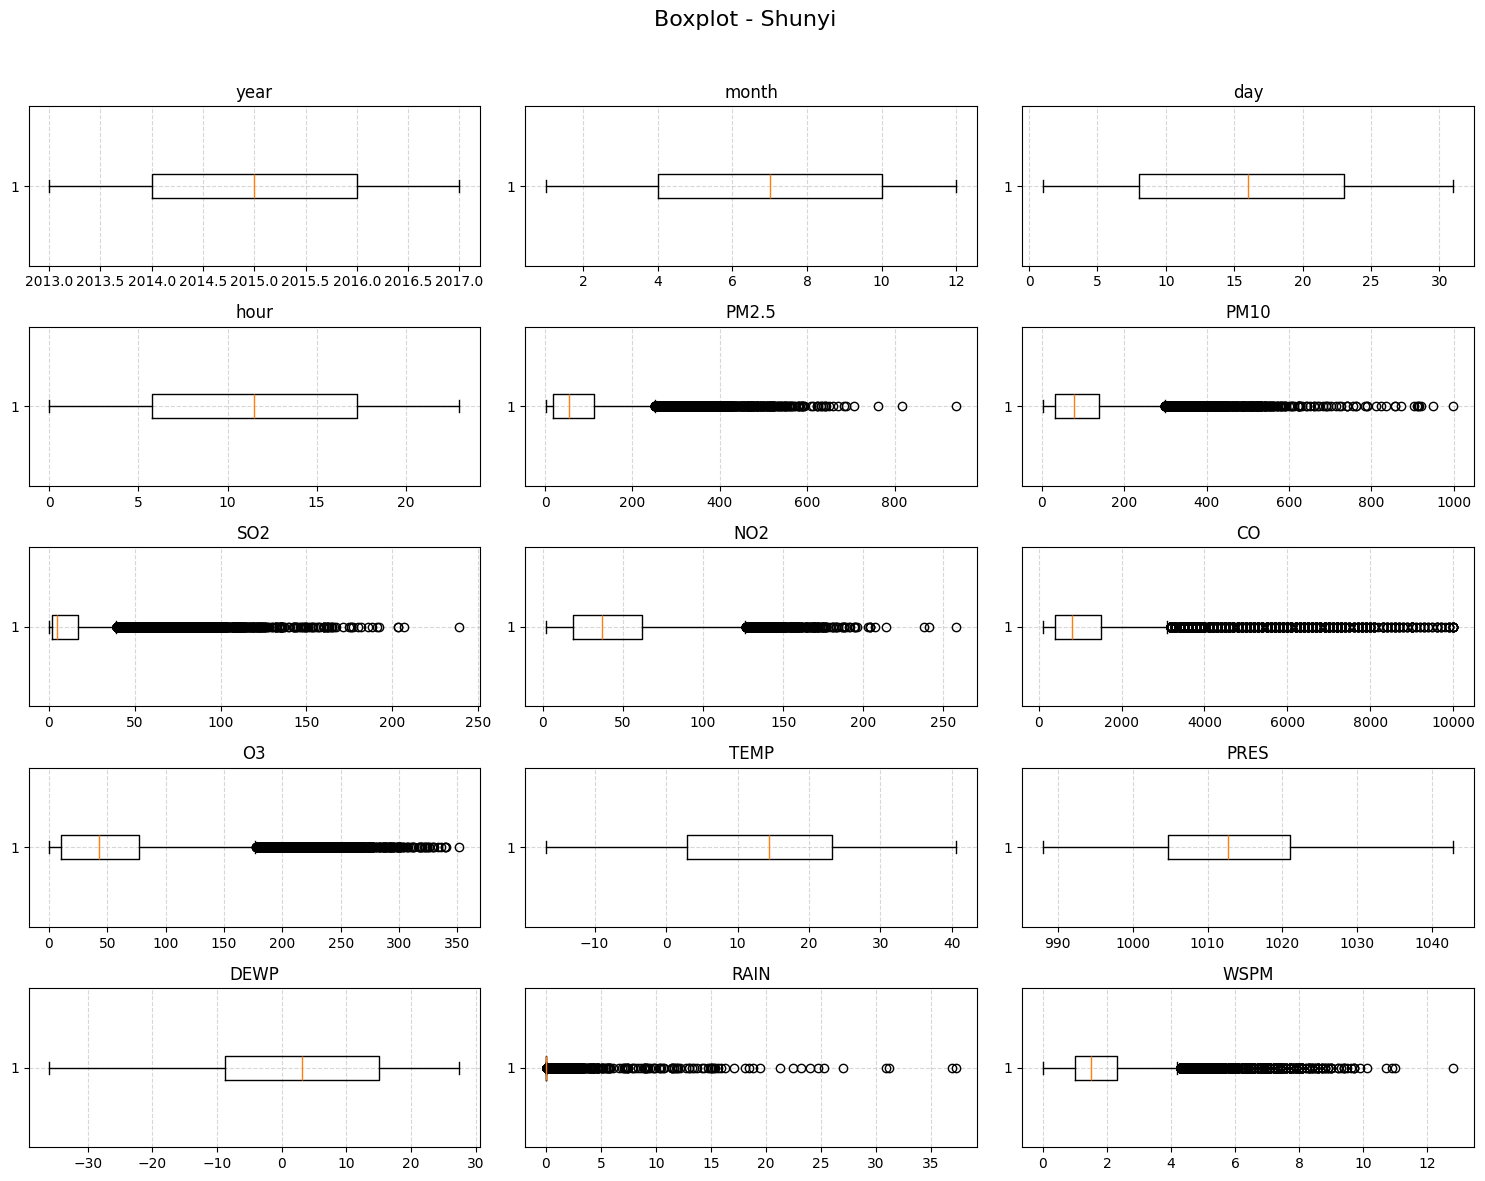

In [58]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        shunyi_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Shunyi", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **tiantan_df**

In [59]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [60]:
tiantan_na = tiantan_df.isna().sum().to_frame('Jumlah N/A')
tiantan_na['Persentase N/A'] = ((tiantan_df.isna().sum()) / len(tiantan_df) * 100).round(2)
tiantan_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           677            1.93
PM10            597            1.70
SO2            1118            3.19
NO2             744            2.12
CO             1126            3.21
O3              843            2.40
TEMP             20            0.06
PRES             20            0.06
DEWP             20            0.06
RAIN             20            0.06
wd               78            0.22
WSPM             14            0.04
station           0            0.00

In [61]:
print("Jumlah duplikasi : ", tiantan_df.duplicated().sum())

Jumlah duplikasi :  0


In [62]:
tiantan_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

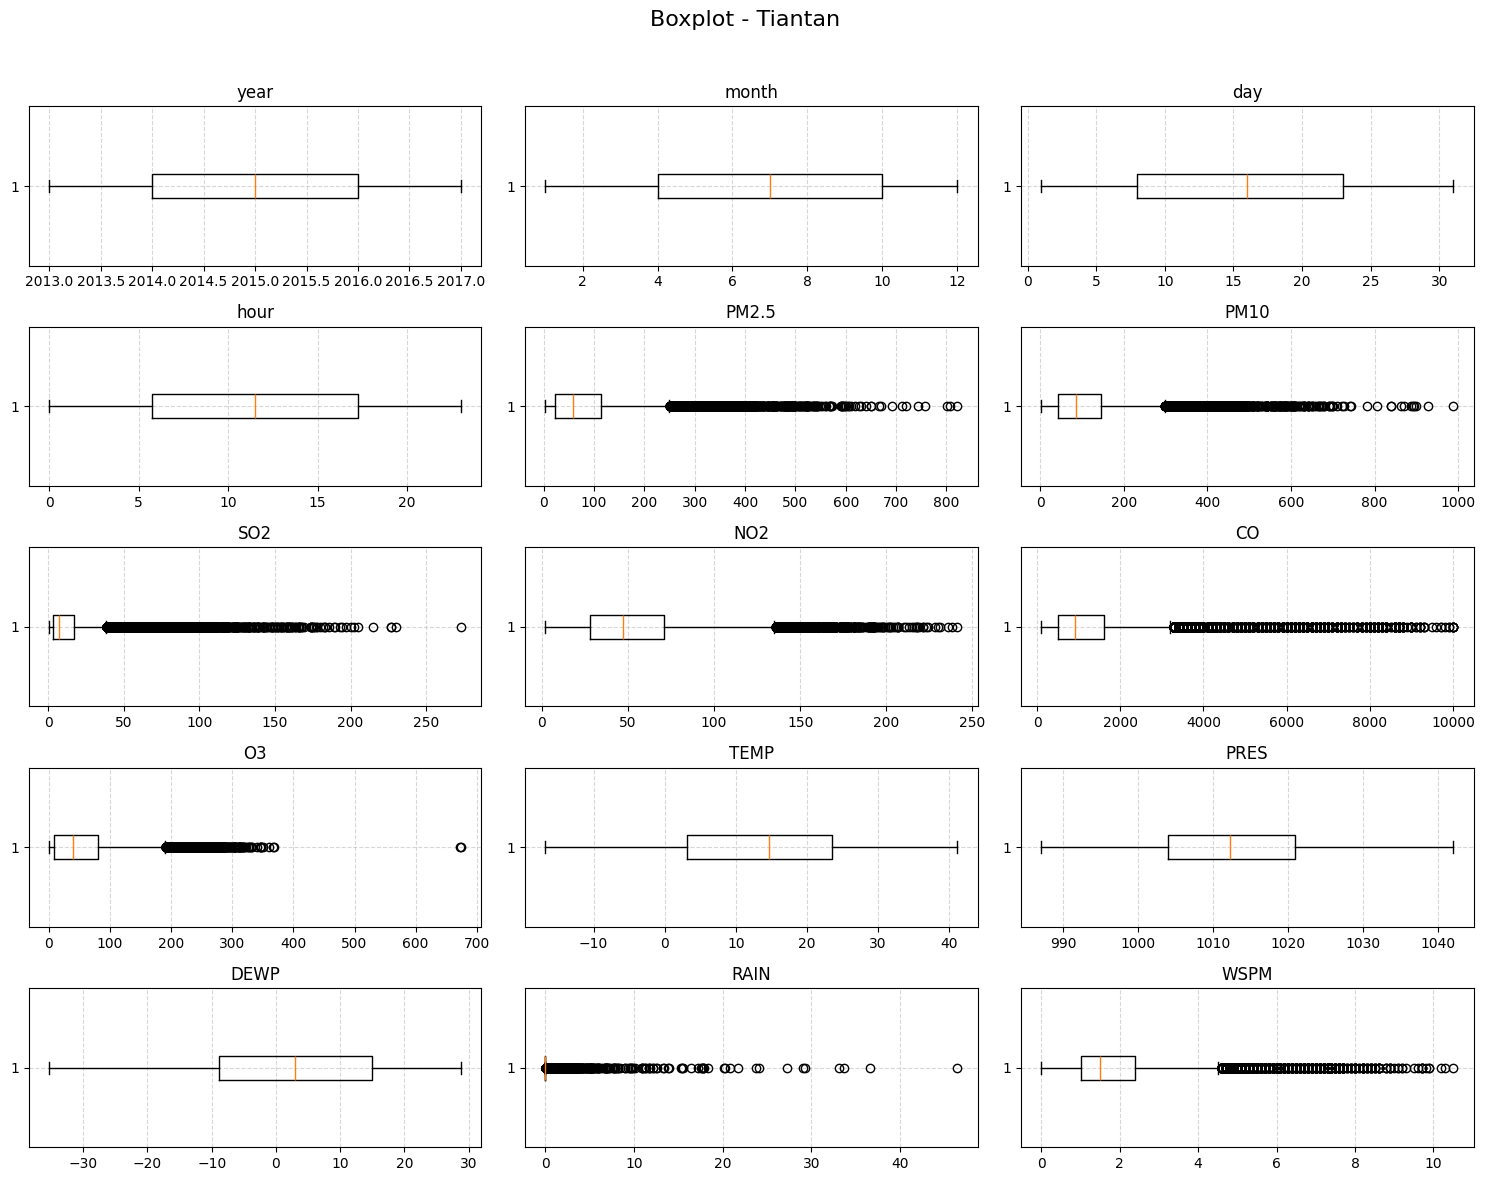

In [63]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        tiantan_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Tiantan", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **wanliu_df**

In [64]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [65]:
wanliu_na = wanliu_df.isna().sum().to_frame('Jumlah N/A')
wanliu_na['Persentase N/A'] = ((wanliu_df.isna().sum()) / len(wanliu_df) * 100).round(2)
wanliu_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           382            1.09
PM10            284            0.81
SO2             575            1.64
NO2            1070            3.05
CO             1812            5.17
O3             2107            6.01
TEMP             20            0.06
PRES             20            0.06
DEWP             20            0.06
RAIN             20            0.06
wd              123            0.35
WSPM             14            0.04
station           0            0.00

In [66]:
print("Jumlah duplikasi : ", wanliu_df.duplicated().sum())

Jumlah duplikasi :  0


In [67]:
wanliu_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

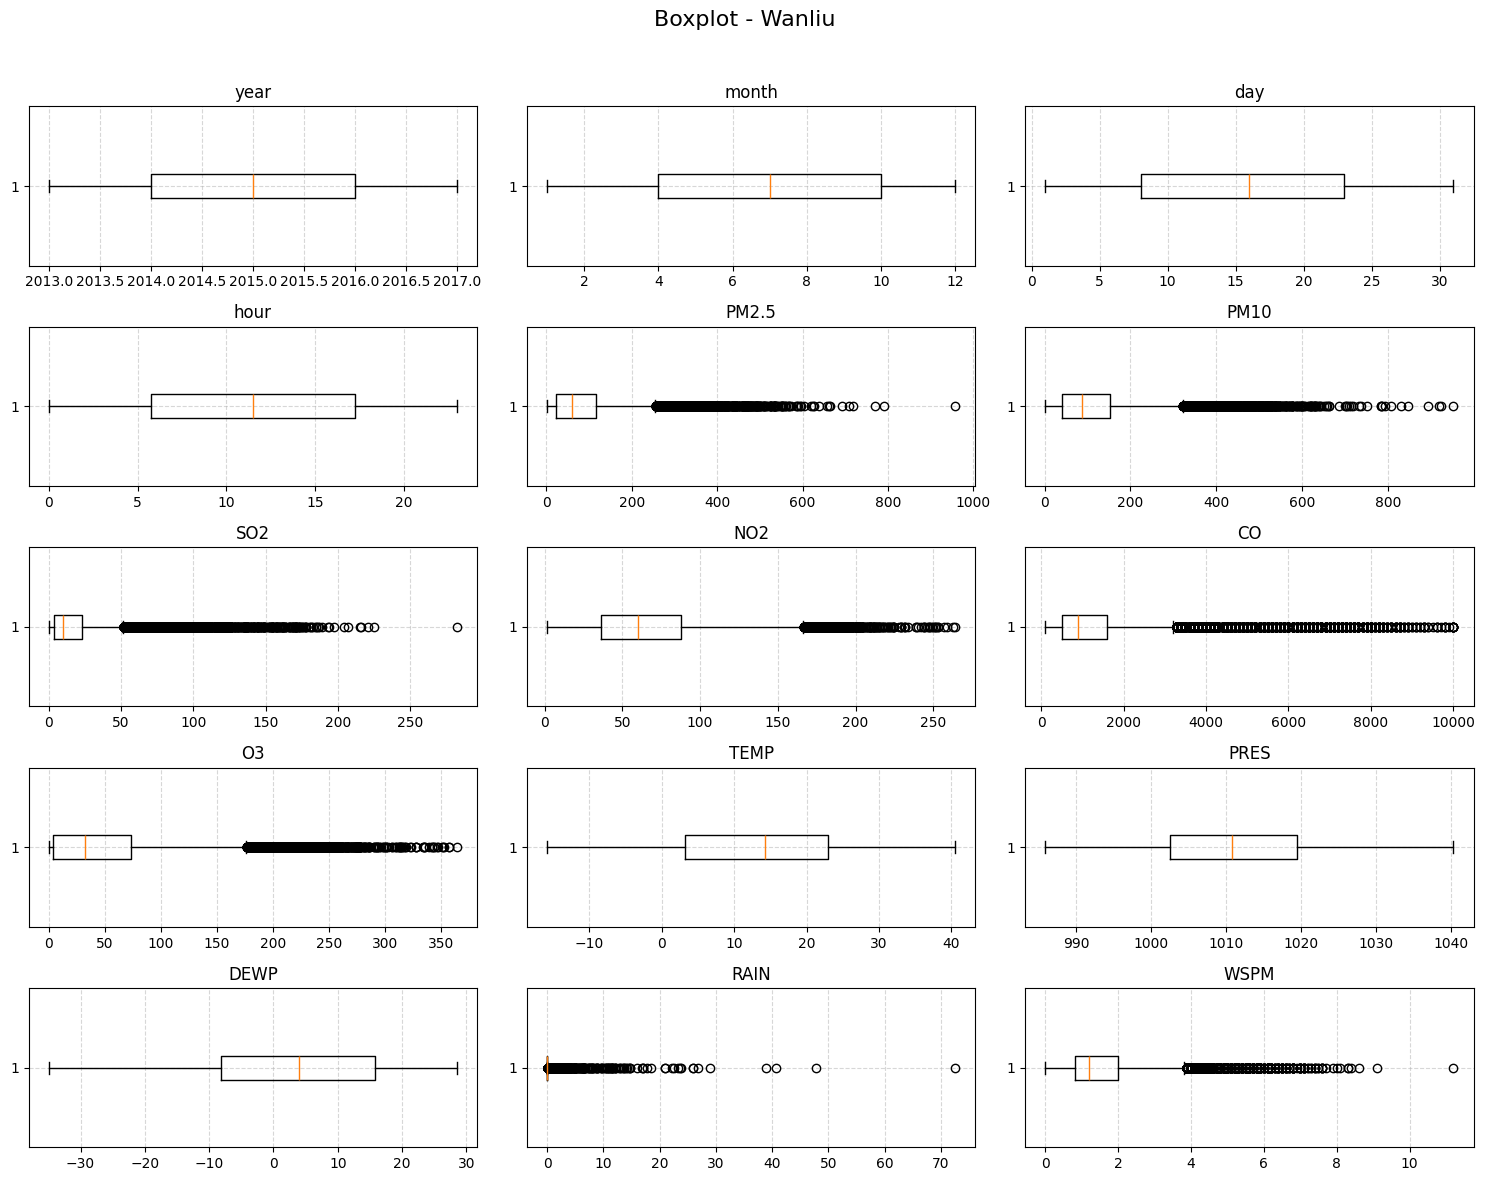

In [68]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        wanliu_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Wanliu", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Menilai Tabel **wanshouxigong_df**

In [69]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [70]:
wanshouxigong_na = wanshouxigong_df.isna().sum().to_frame('Jumlah N/A')
wanshouxigong_na['Persentase N/A'] = ((wanshouxigong_df.isna().sum()) / len(wanshouxigong_df) * 100).round(2)
wanshouxigong_na

Jumlah N/A  Persentase N/A
No                0            0.00
year              0            0.00
month             0            0.00
day               0            0.00
hour              0            0.00
PM2.5           696            1.98
PM10            484            1.38
SO2             669            1.91
NO2             754            2.15
CO             1297            3.70
O3             1078            3.07
TEMP             19            0.05
PRES             19            0.05
DEWP             19            0.05
RAIN             19            0.05
wd               79            0.23
WSPM             13            0.04
station           0            0.00

In [71]:
print("Jumlah duplikasi : ", wanshouxigong_df.duplicated().sum())

Jumlah duplikasi :  0


In [72]:
wanshouxigong_df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

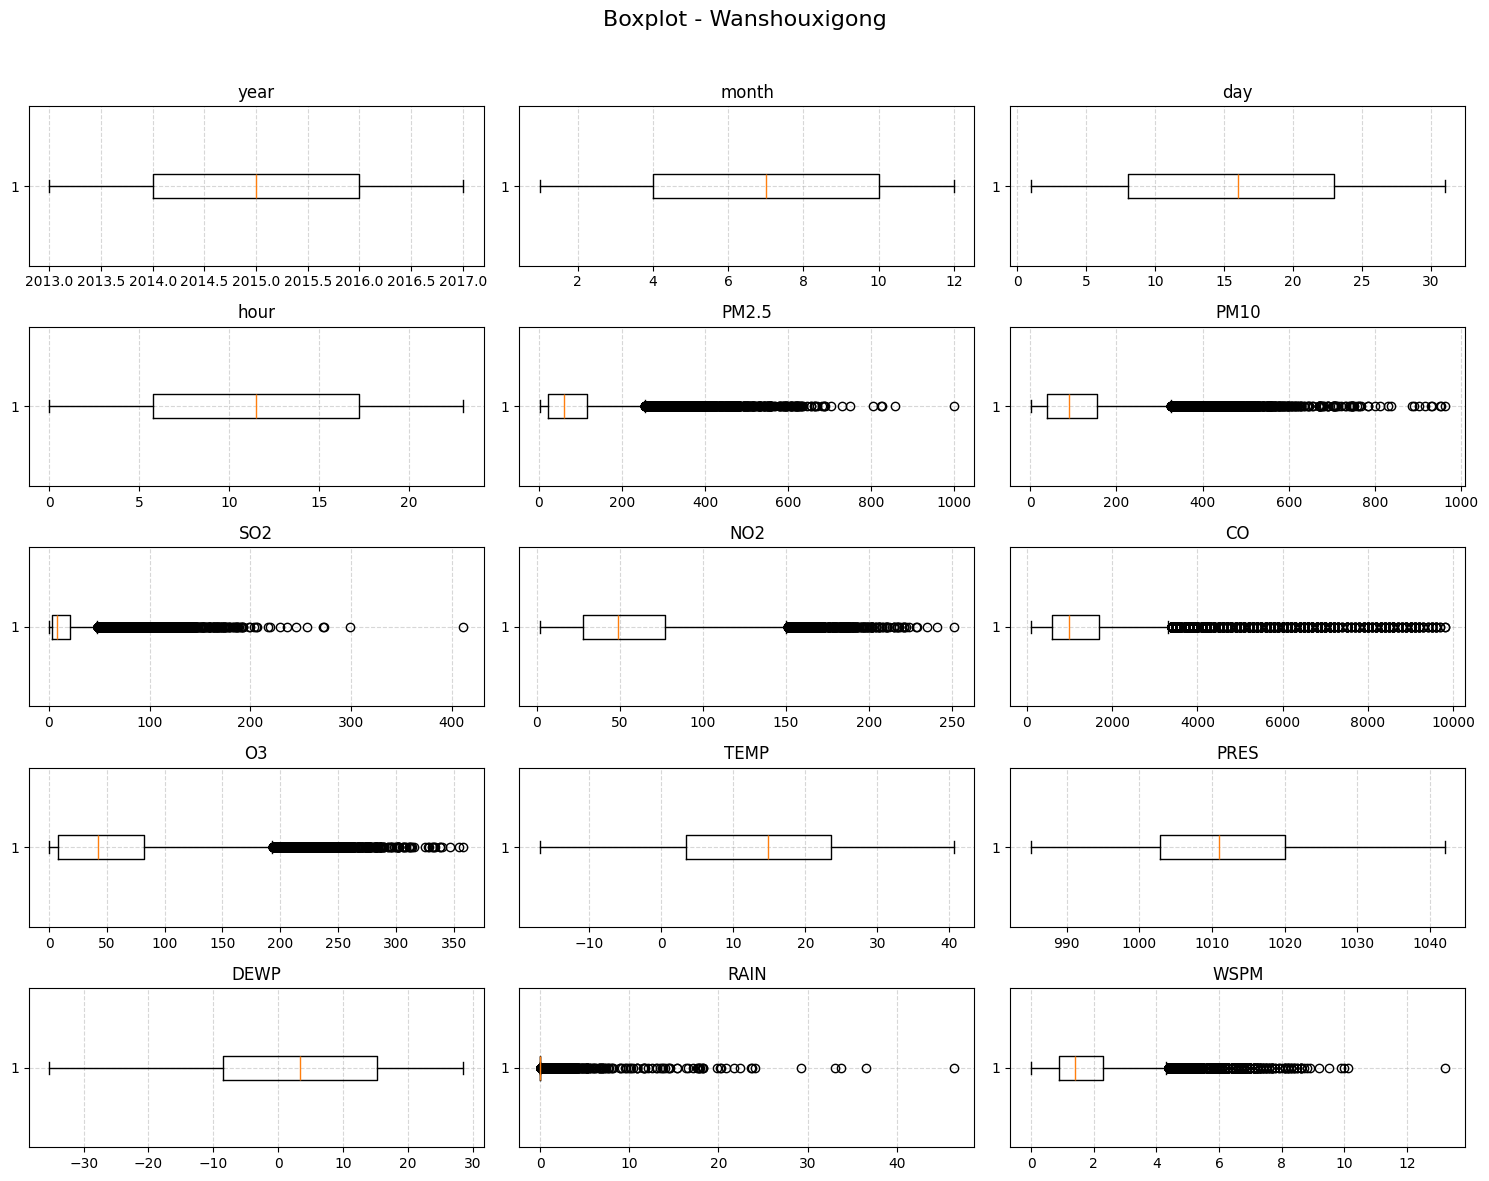

In [73]:
cols = [
    "year","month","day","hour",
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = int(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(
        wanshouxigong_df[col].dropna(),
        vert=False
    )
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplot - Wanshouxigong", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### **Insight:**
- Pada pengecekan duplikasi data, tidak ada tabel yang memiliki data duplikat
- Pada pengecekan missing values, 12 tabel di atas memiliki missing values di atribut yang sama dengan persentase berbeda-beda, berikut rinciannya:
  1. Pada kategori waktu (year, month, day, hour) **tidak terdapat missing values**
  2. Pada kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3), persentase missing values berada **di bawah 10%**
  3. Pada kategori cuaca (TEMP, PRES, DEWP, RAIN, wd, WSPM), persentase missing values berada **di bawah 1,5%**
- Pada pengecekan outlier menggunakan boxplot, 12 tabel di atas memiliki outlier di atribut yang sama dengan jumlah yang berbeda. Secara statistik nilai tersebut memang teridentifikasi sebagai outlier berdasarkan metode IQR, tetapi secara domain knowledge nilai tersebut dapat merepresentasikan kejadian polusi ekstrem yang valid karena frekuensi kejadian yang tinggi sehingga nilai outlier tidak dihapus dari data

### Cleaning Data

#### Membersihkan Tabel **aotizhongxin_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

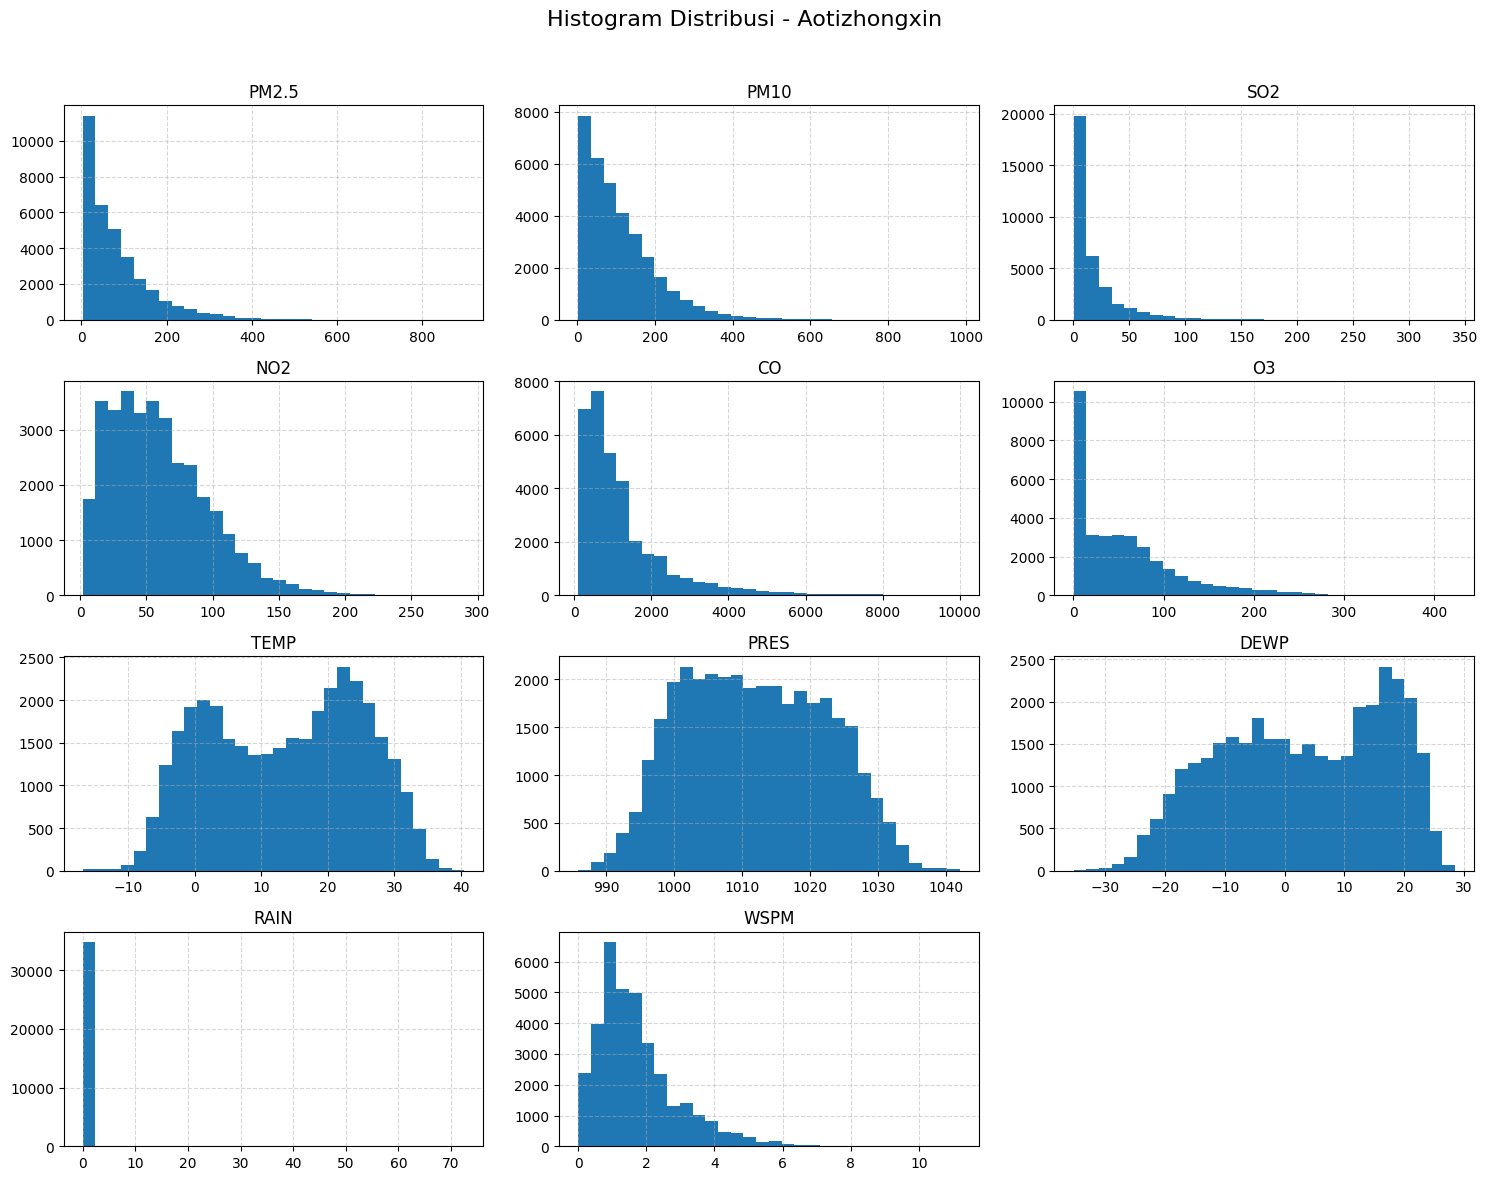

In [74]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = aotizhongxin_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Aotizhongxin", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [75]:
pollutant_aotizhongxin = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_aotizhongxin = ["TEMP", "WSPM"]
pres_dewp_aotizhongxin = ["PRES", "DEWP"]
rain_wd_aotizhongxin = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    aotizhongxin_df[col] = (aotizhongxin_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    aotizhongxin_df[col] = (aotizhongxin_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    aotizhongxin_df[col] = (aotizhongxin_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    aotizhongxin_df[col] = aotizhongxin_df[col].fillna(aotizhongxin_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [76]:
aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [77]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **changping_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

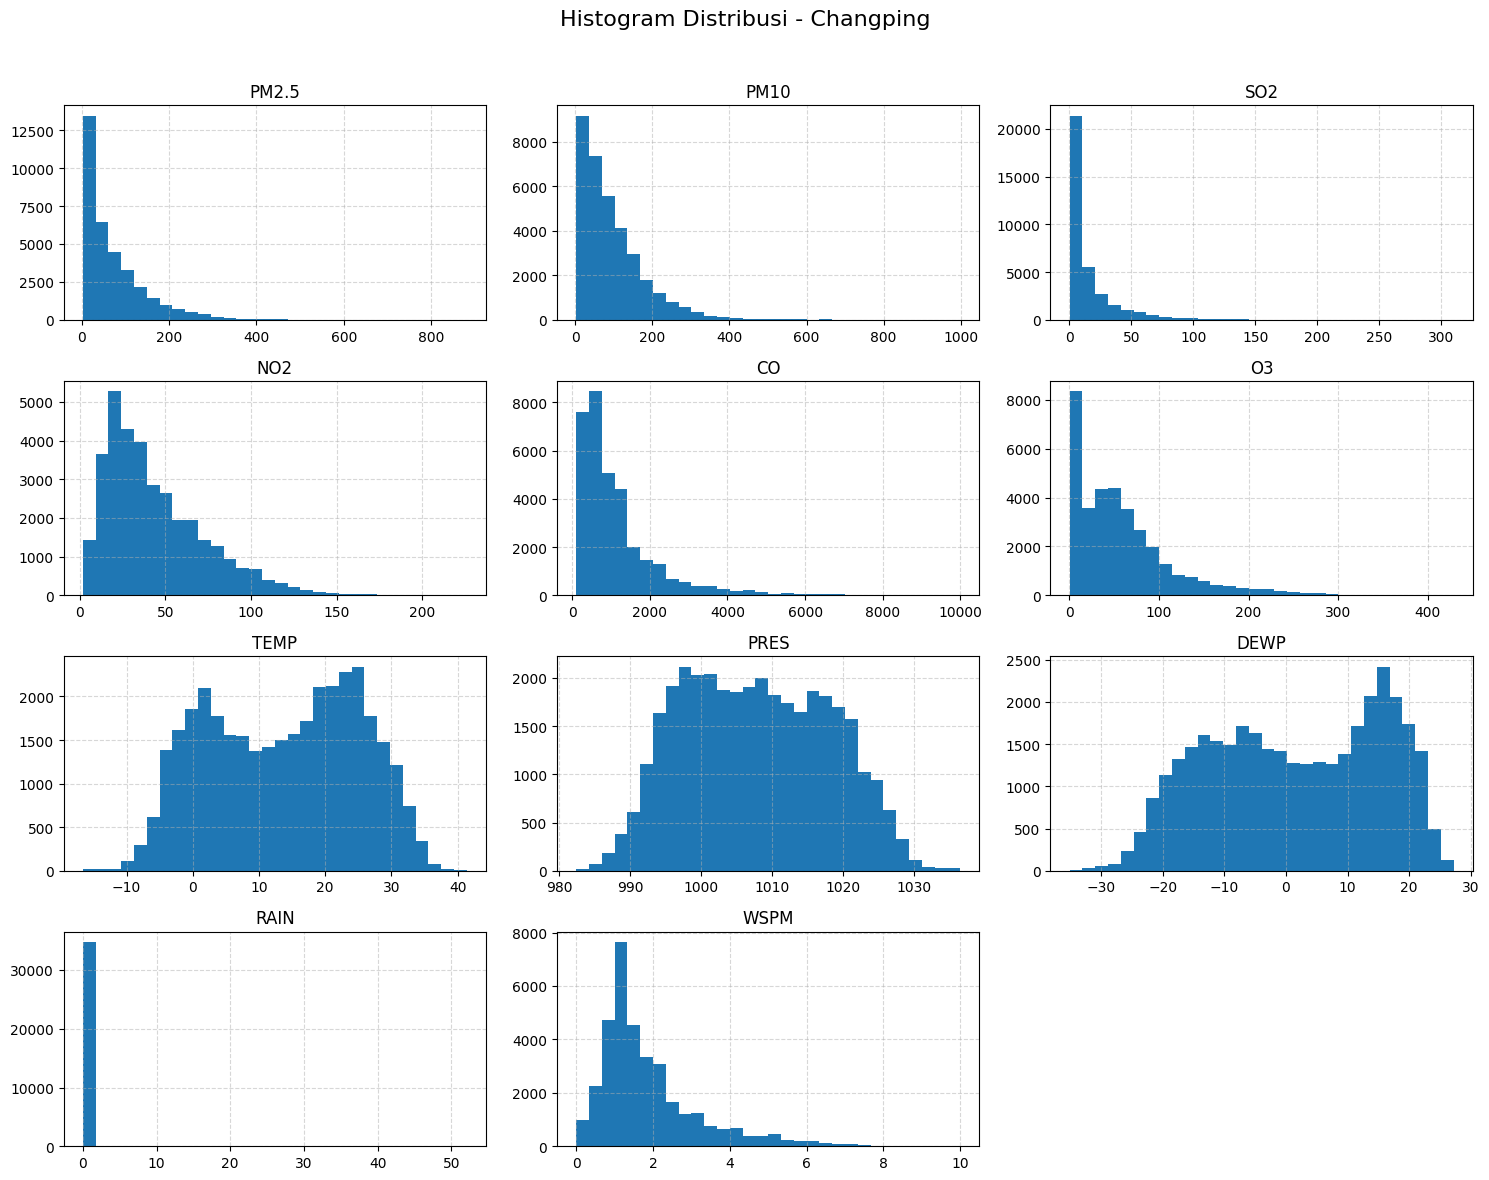

In [78]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = changping_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Changping", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [79]:
pollutant_changping = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_changping = ["TEMP", "WSPM"]
pres_dewp_changping = ["PRES", "DEWP"]
rain_wd_changping = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    changping_df[col] = (changping_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    changping_df[col] = (changping_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    changping_df[col] = (changping_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    changping_df[col] = changping_df[col].fillna(changping_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [80]:
changping_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [81]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **dingling_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

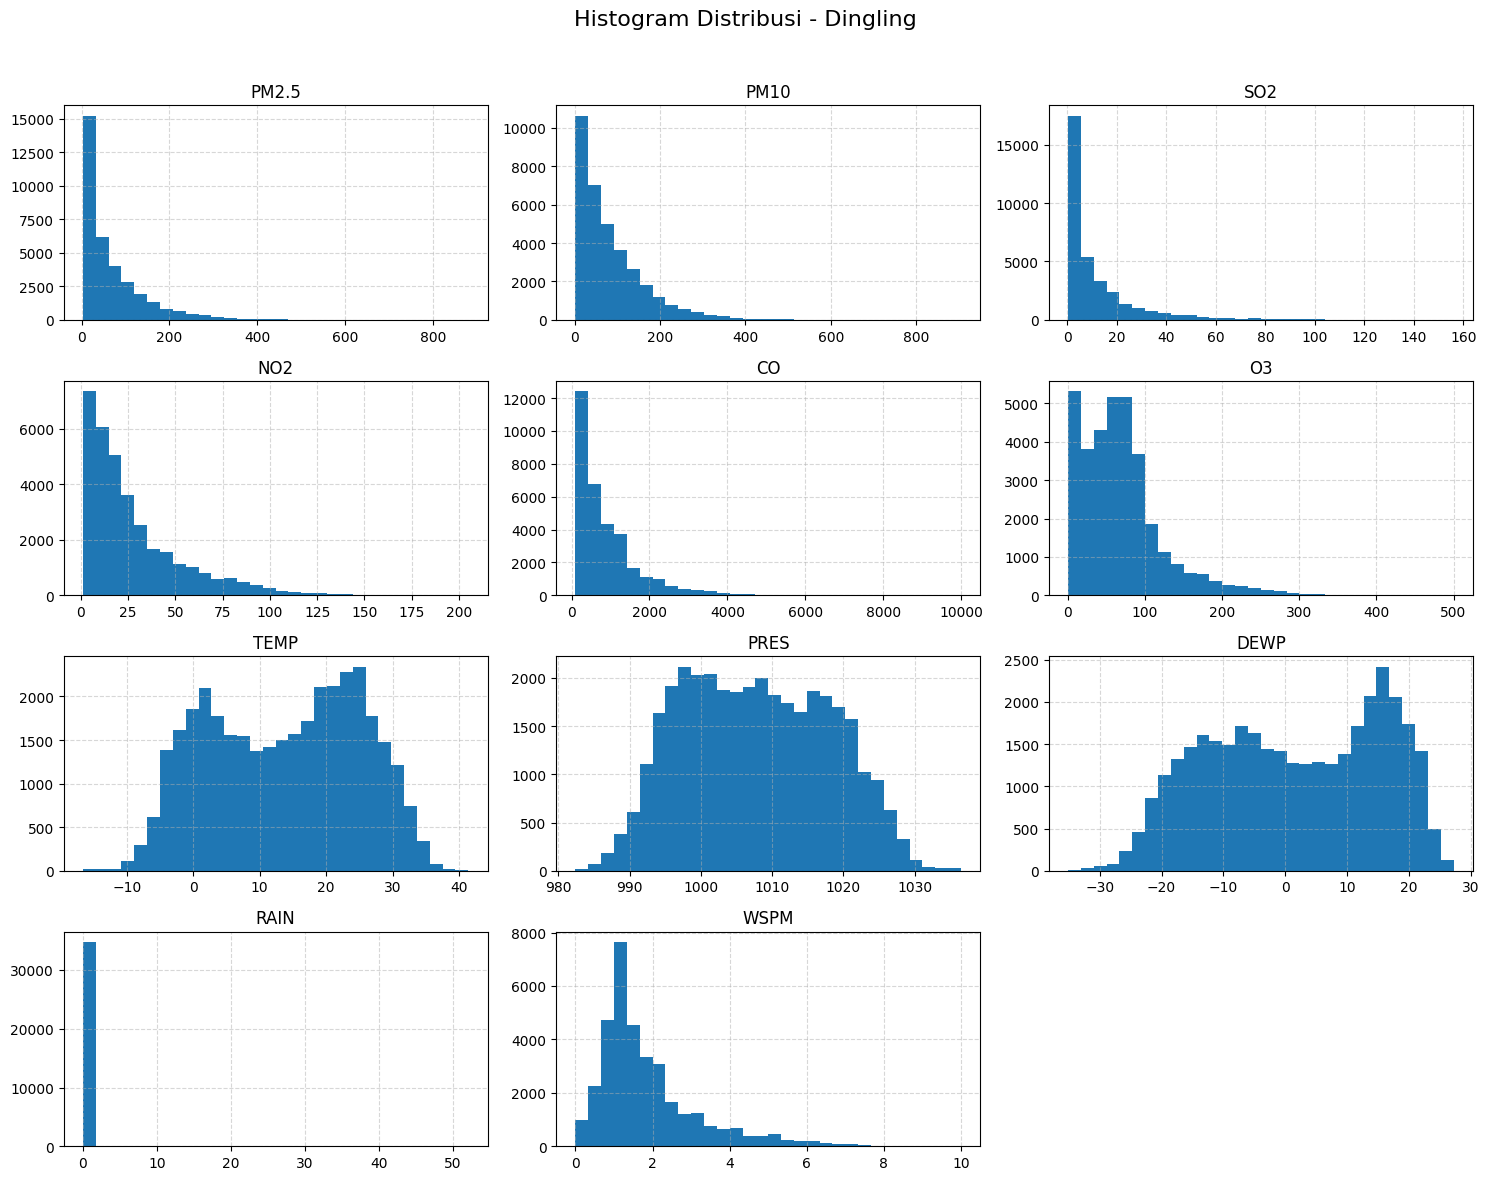

In [82]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = dingling_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Dingling", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [83]:
pollutant_dingling = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_dingling = ["TEMP", "WSPM"]
pres_dewp_dingling = ["PRES", "DEWP"]
rain_wd_dingling = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    dingling_df[col] = (dingling_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    dingling_df[col] = (dingling_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    dingling_df[col] = (dingling_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    dingling_df[col] = dingling_df[col].fillna(dingling_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [84]:
dingling_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [85]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **dongsi_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

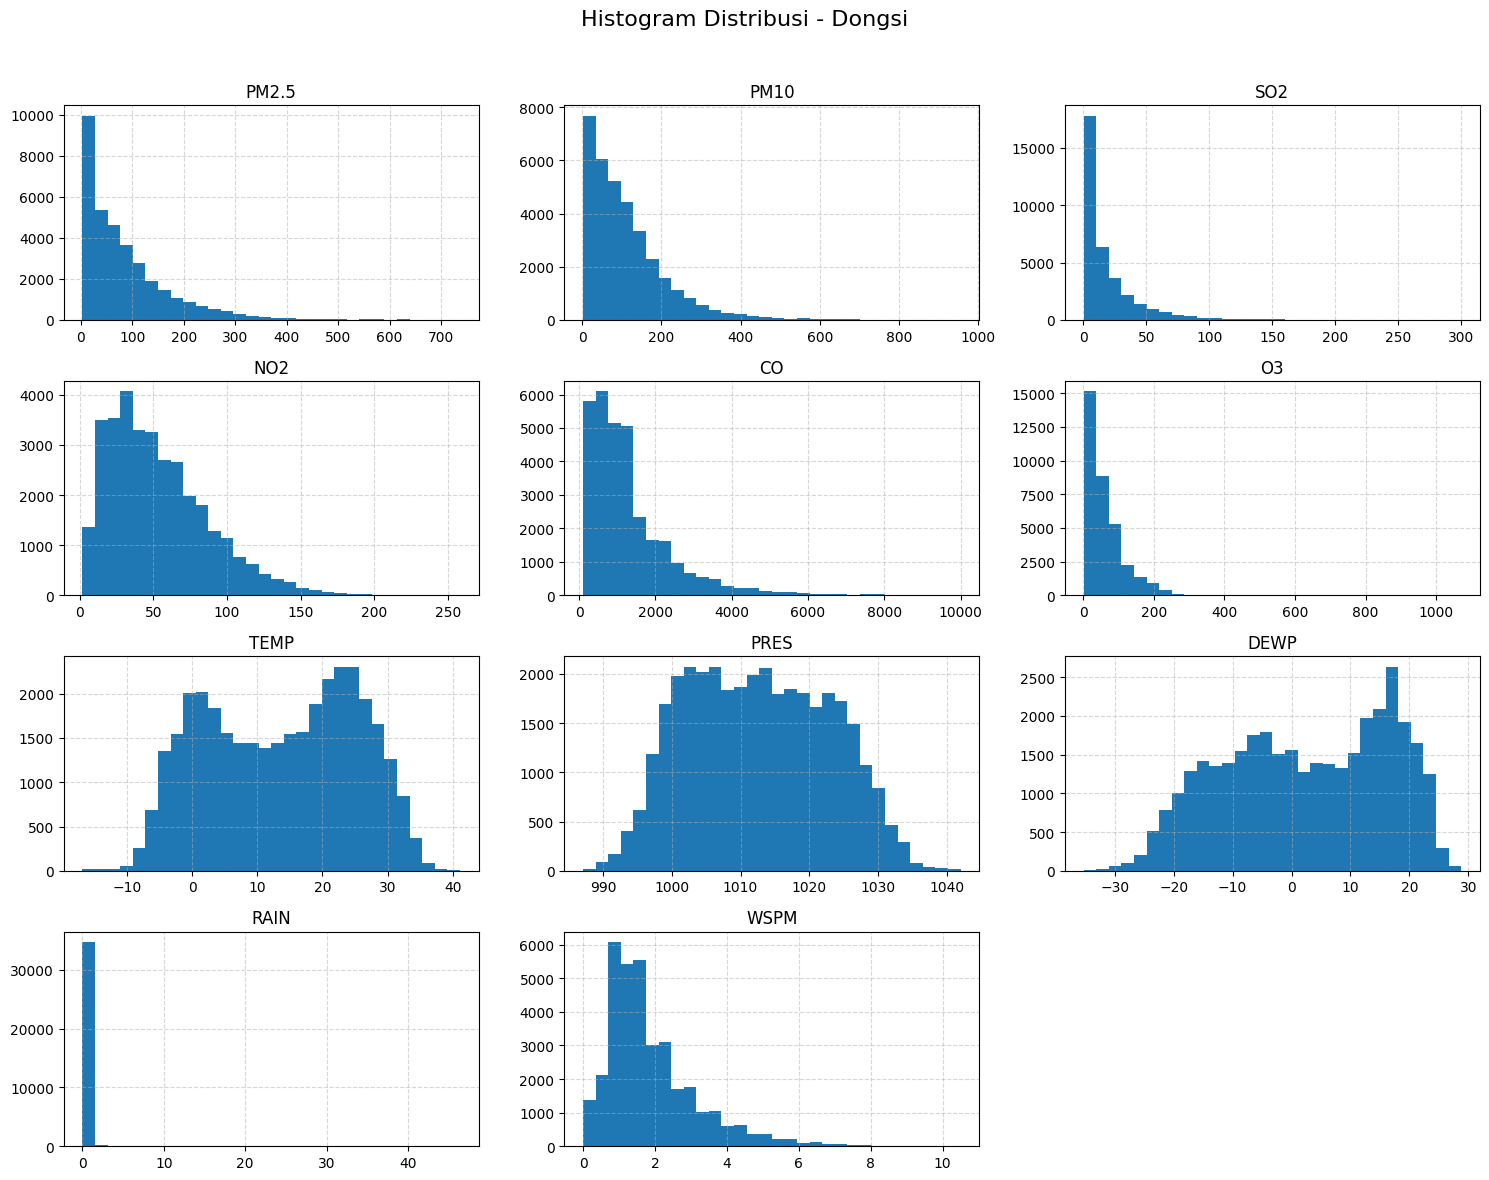

In [86]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = dongsi_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Dongsi", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [87]:
pollutant_dongsi = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_dongsi = ["TEMP", "WSPM"]
pres_dewp_dongsi = ["PRES", "DEWP"]
rain_wd_dongsi = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    dongsi_df[col] = (dongsi_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    dongsi_df[col] = (dongsi_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    dongsi_df[col] = (dongsi_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    dongsi_df[col] = dongsi_df[col].fillna(dongsi_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [88]:
dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [89]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **guanyuan_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

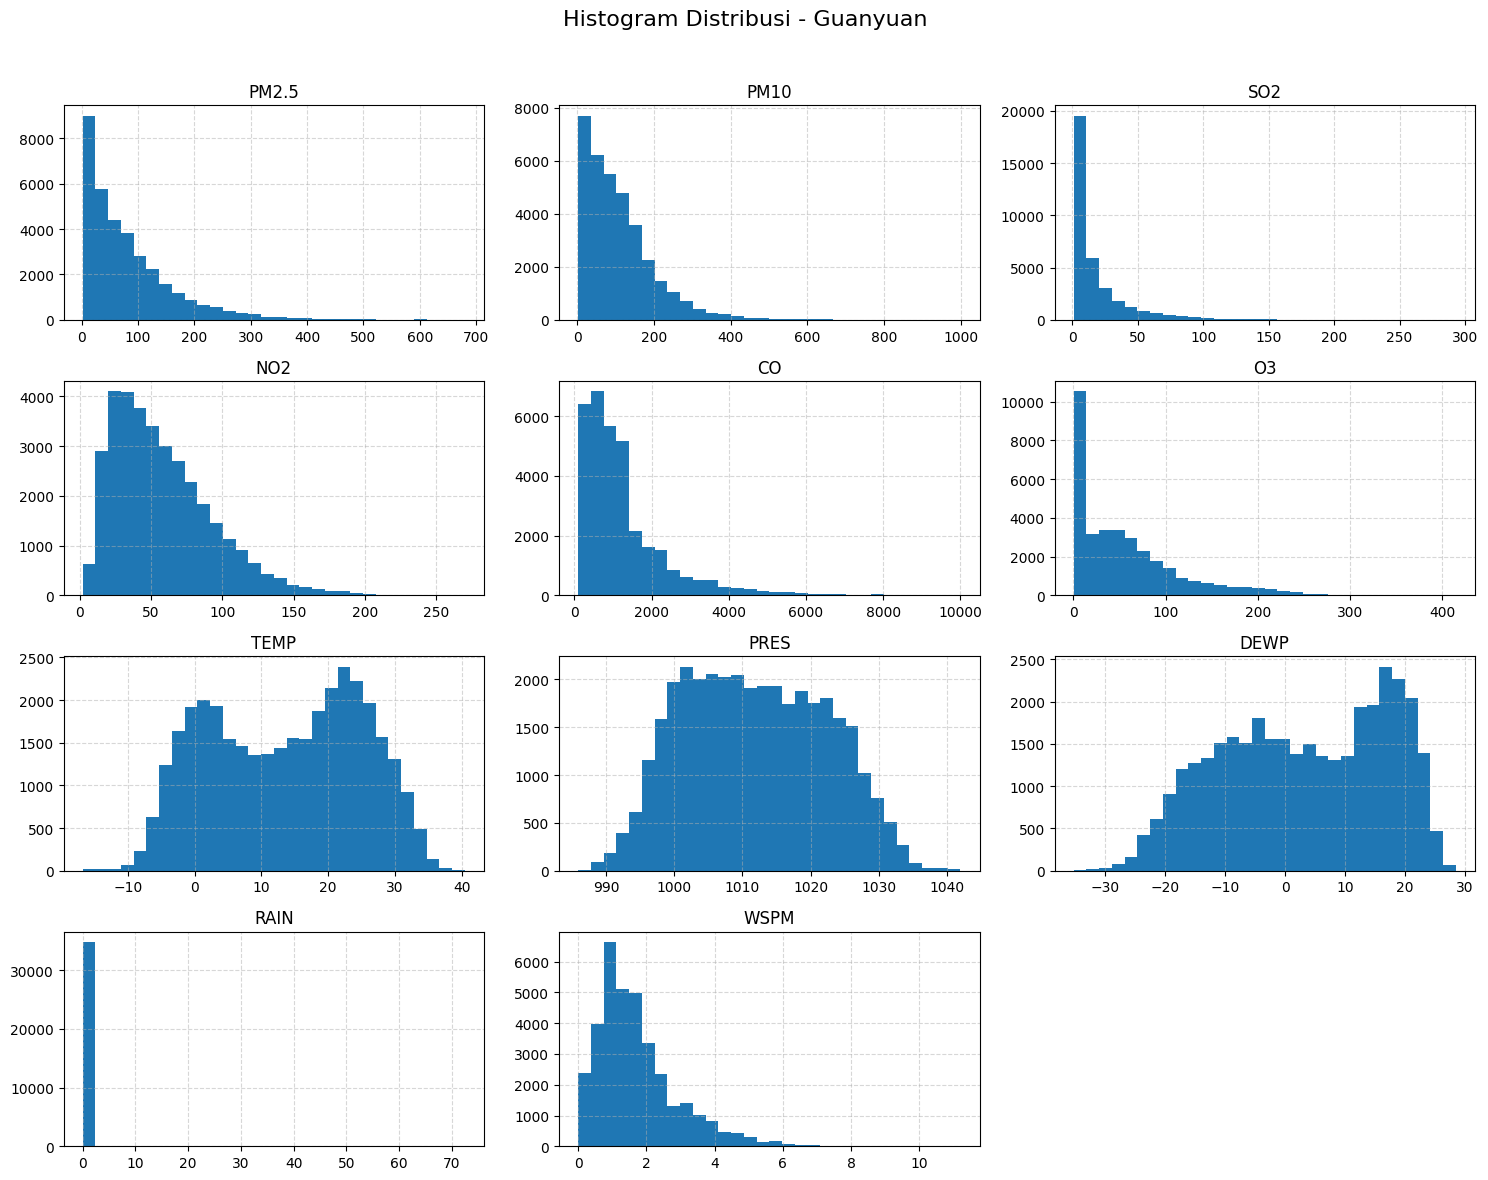

In [90]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = guanyuan_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Guanyuan", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [91]:
pollutant_guanyuan = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_guanyuan = ["TEMP", "WSPM"]
pres_dewp_guanyuan = ["PRES", "DEWP"]
rain_wd_guanyuan = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    guanyuan_df[col] = (guanyuan_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    guanyuan_df[col] = (guanyuan_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    guanyuan_df[col] = (guanyuan_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    guanyuan_df[col] = guanyuan_df[col].fillna(guanyuan_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [92]:
guanyuan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [93]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **gucheng_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

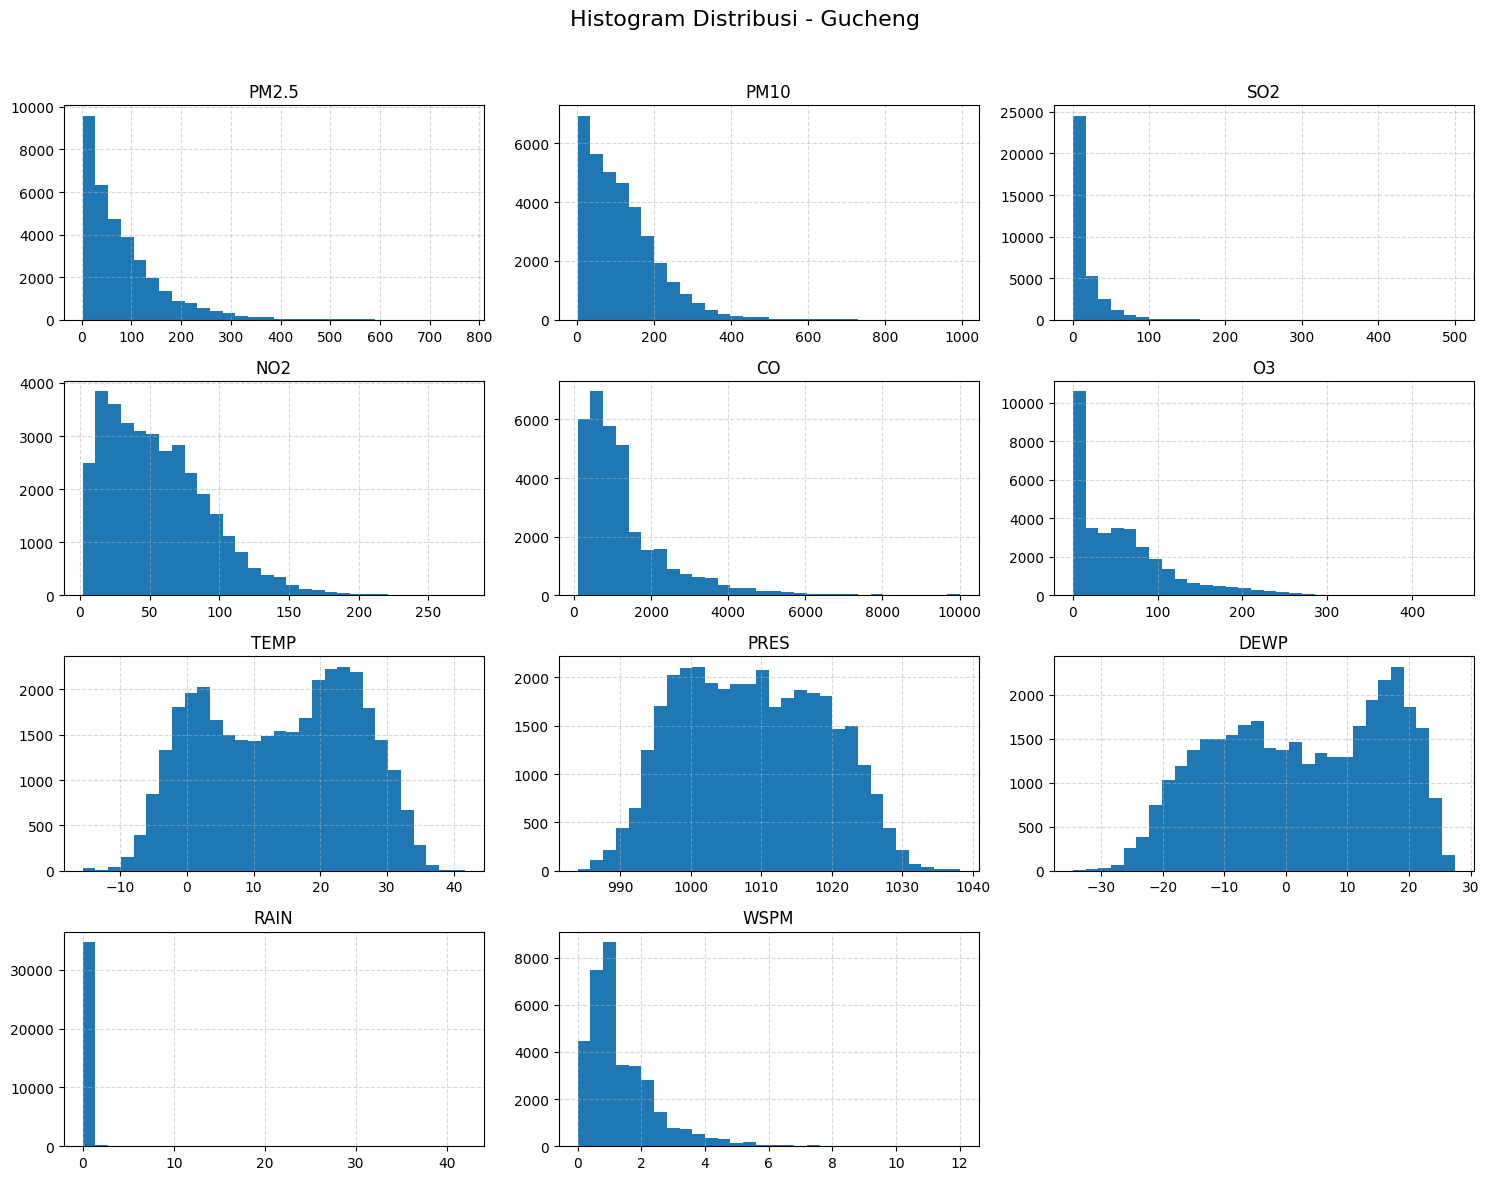

In [94]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = gucheng_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Gucheng", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [95]:
pollutant_gucheng = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_gucheng = ["TEMP", "WSPM"]
pres_dewp_gucheng = ["PRES", "DEWP"]
rain_wd_gucheng = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    gucheng_df[col] = (gucheng_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    gucheng_df[col] = (gucheng_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    gucheng_df[col] = (gucheng_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    gucheng_df[col] = gucheng_df[col].fillna(gucheng_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [96]:
gucheng_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [97]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **huairou_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

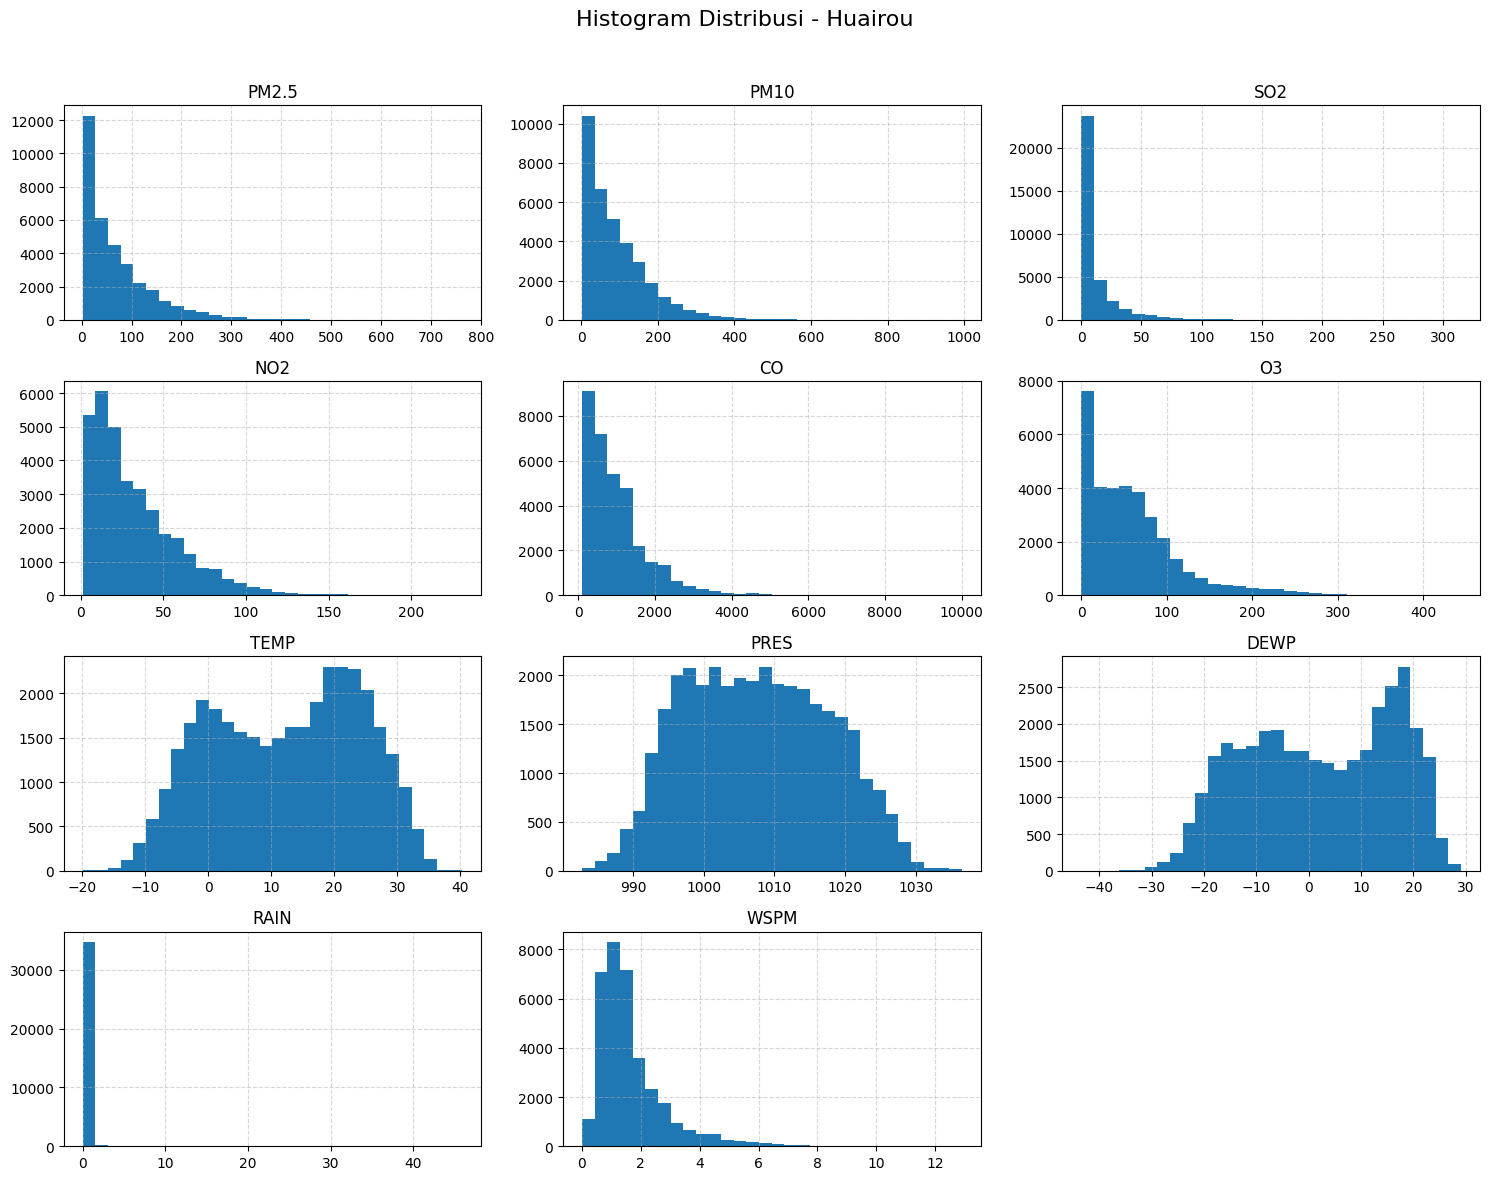

In [98]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = huairou_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Huairou", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [99]:
pollutant_huairou = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_huairou = ["TEMP", "WSPM"]
pres_dewp_huairou = ["PRES", "DEWP"]
rain_wd_huairou = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    huairou_df[col] = (huairou_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    huairou_df[col] = (huairou_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    huairou_df[col] = (huairou_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    huairou_df[col] = huairou_df[col].fillna(huairou_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [100]:
huairou_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [101]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **nongzhanguan_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

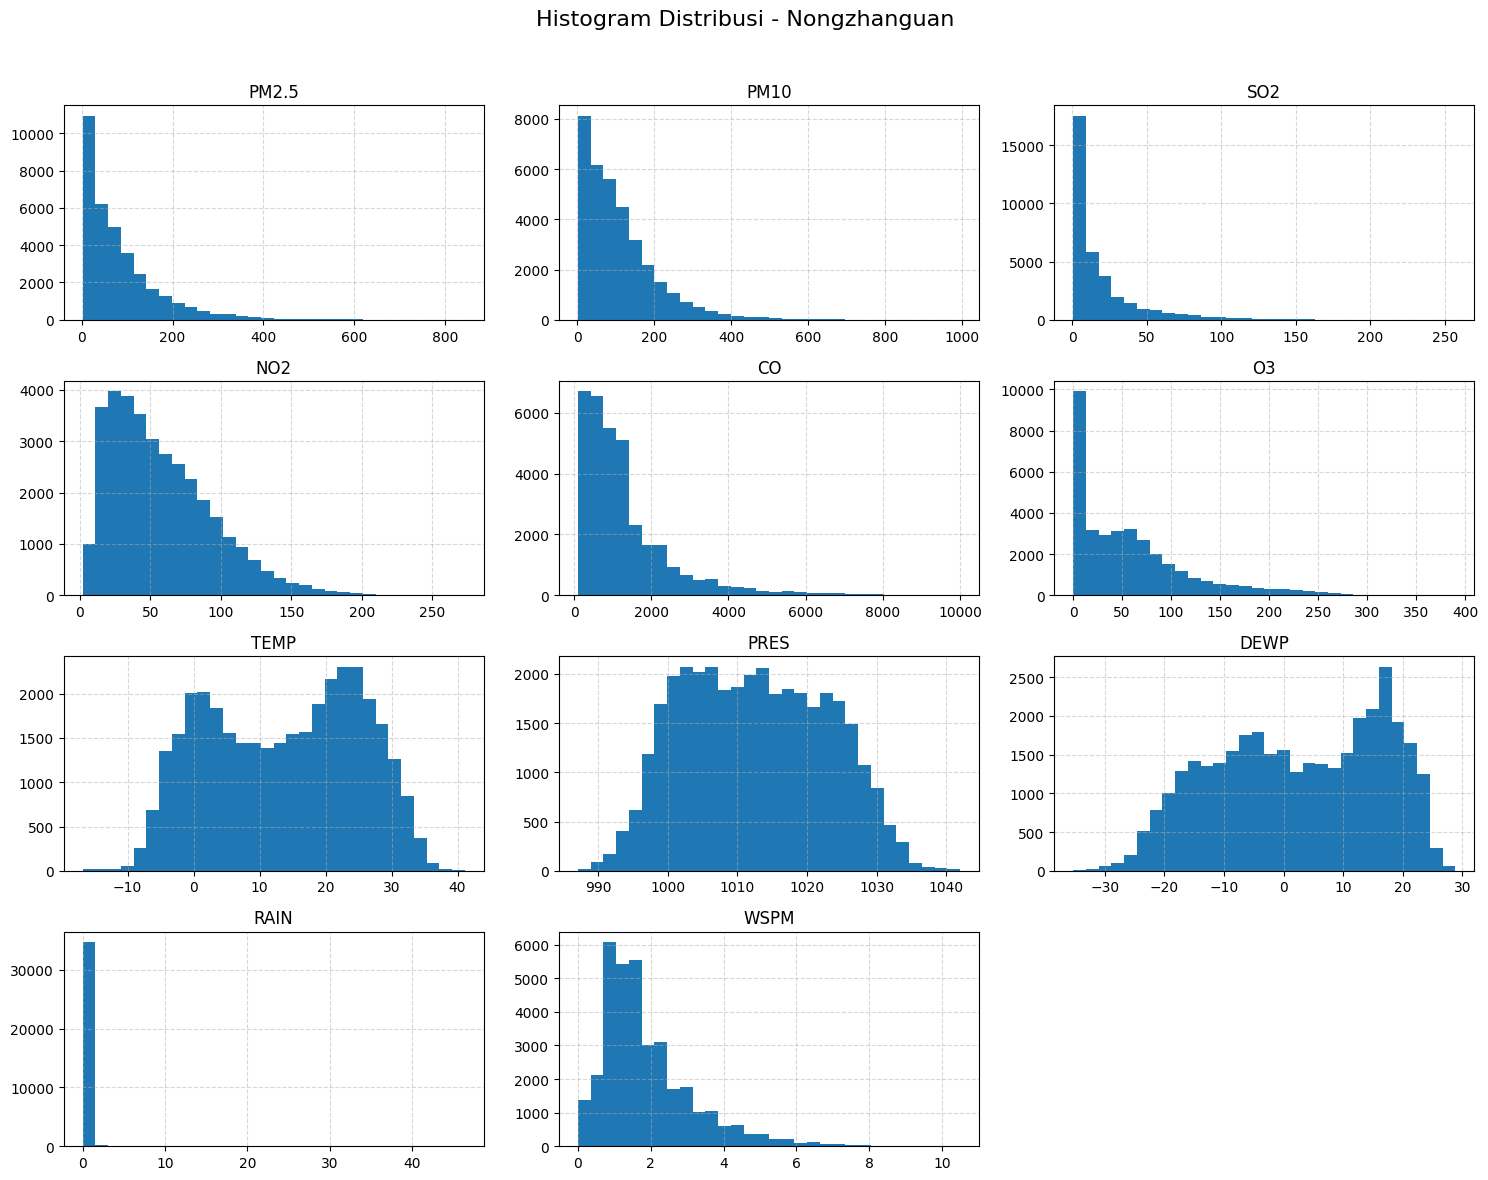

In [102]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = nongzhanguan_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Nongzhanguan", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [103]:
pollutant_nongzhanguan = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_nongzhanguan = ["TEMP", "WSPM"]
pres_dewp_nongzhanguan = ["PRES", "DEWP"]
rain_wd_nongzhanguan = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    nongzhanguan_df[col] = (nongzhanguan_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    nongzhanguan_df[col] = (nongzhanguan_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    nongzhanguan_df[col] = (nongzhanguan_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    nongzhanguan_df[col] = nongzhanguan_df[col].fillna(nongzhanguan_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [104]:
nongzhanguan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [105]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **shunyi_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

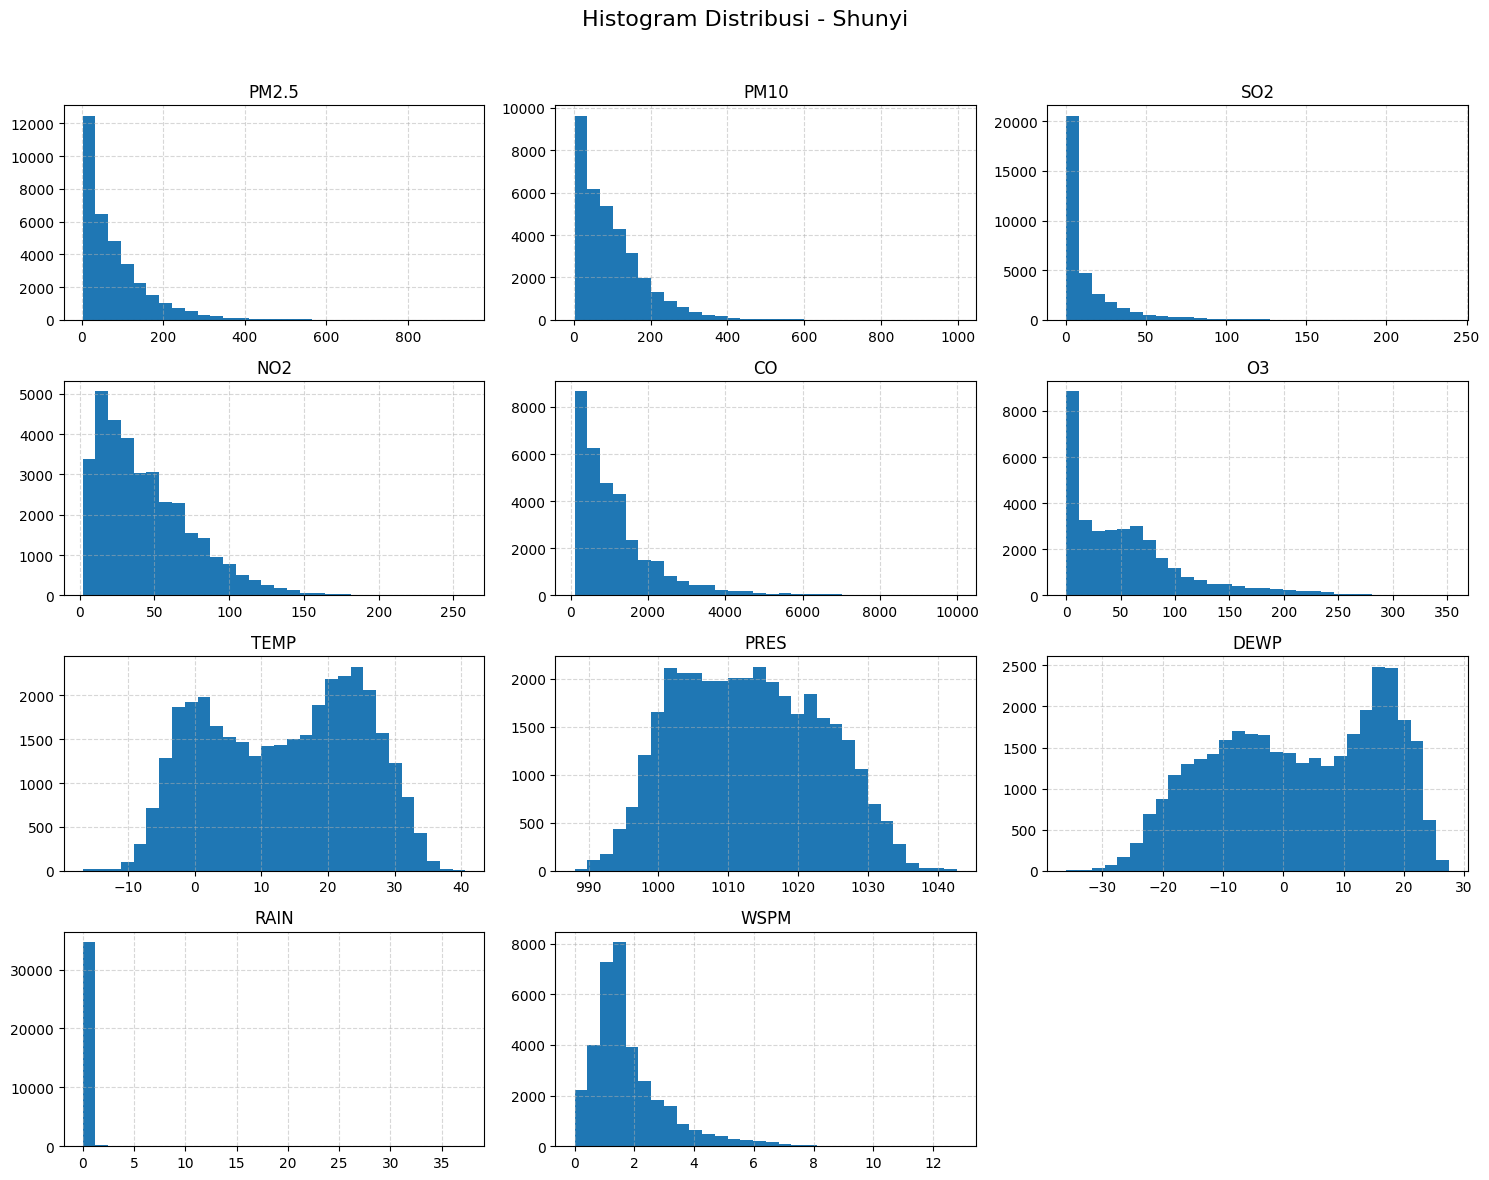

In [106]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = shunyi_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Shunyi", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [107]:
pollutant_shunyi = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_shunyi = ["TEMP", "WSPM"]
pres_dewp_shunyi = ["PRES", "DEWP"]
rain_wd_shunyi = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    shunyi_df[col] = (shunyi_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    shunyi_df[col] = (shunyi_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    shunyi_df[col] = (shunyi_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    shunyi_df[col] = shunyi_df[col].fillna(shunyi_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [108]:
shunyi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [109]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **tiantan_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

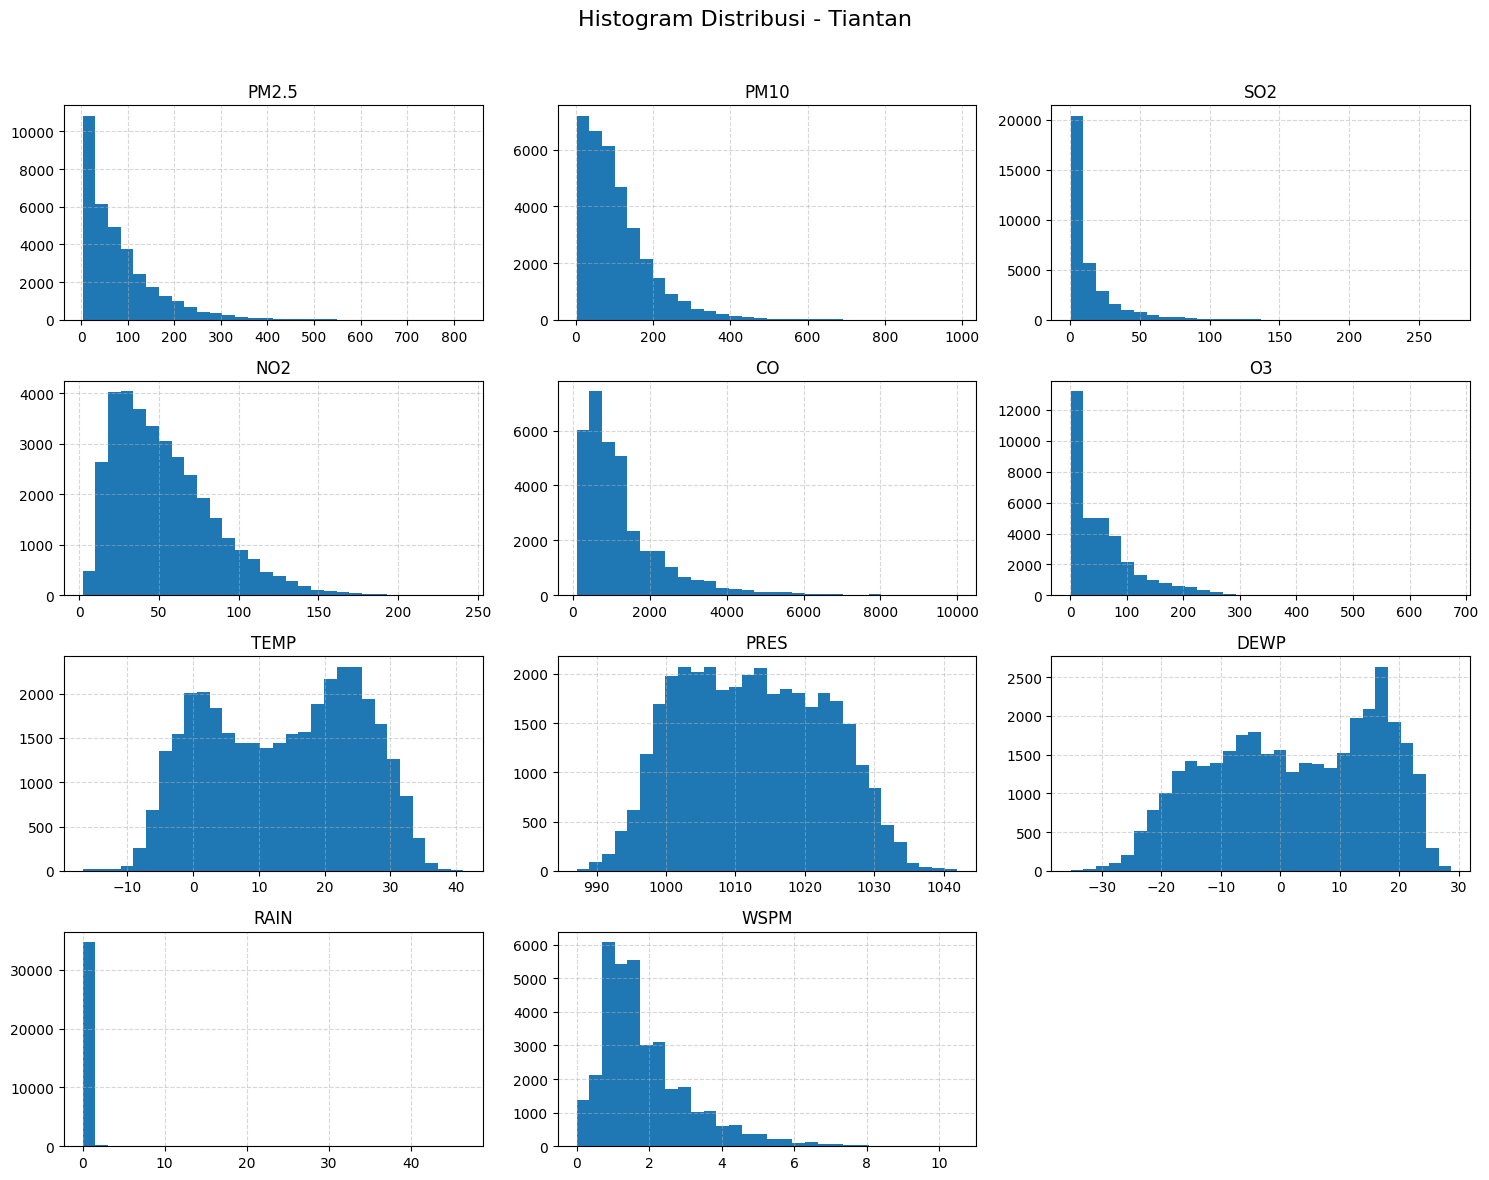

In [110]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = tiantan_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Tiantan", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [111]:
pollutant_tiantan = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_tiantan = ["TEMP", "WSPM"]
pres_dewp_tiantan = ["PRES", "DEWP"]
rain_wd_tiantan = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    tiantan_df[col] = (tiantan_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    tiantan_df[col] = (tiantan_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    tiantan_df[col] = (tiantan_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    tiantan_df[col] = tiantan_df[col].fillna(tiantan_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [112]:
tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [113]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **wanliu_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

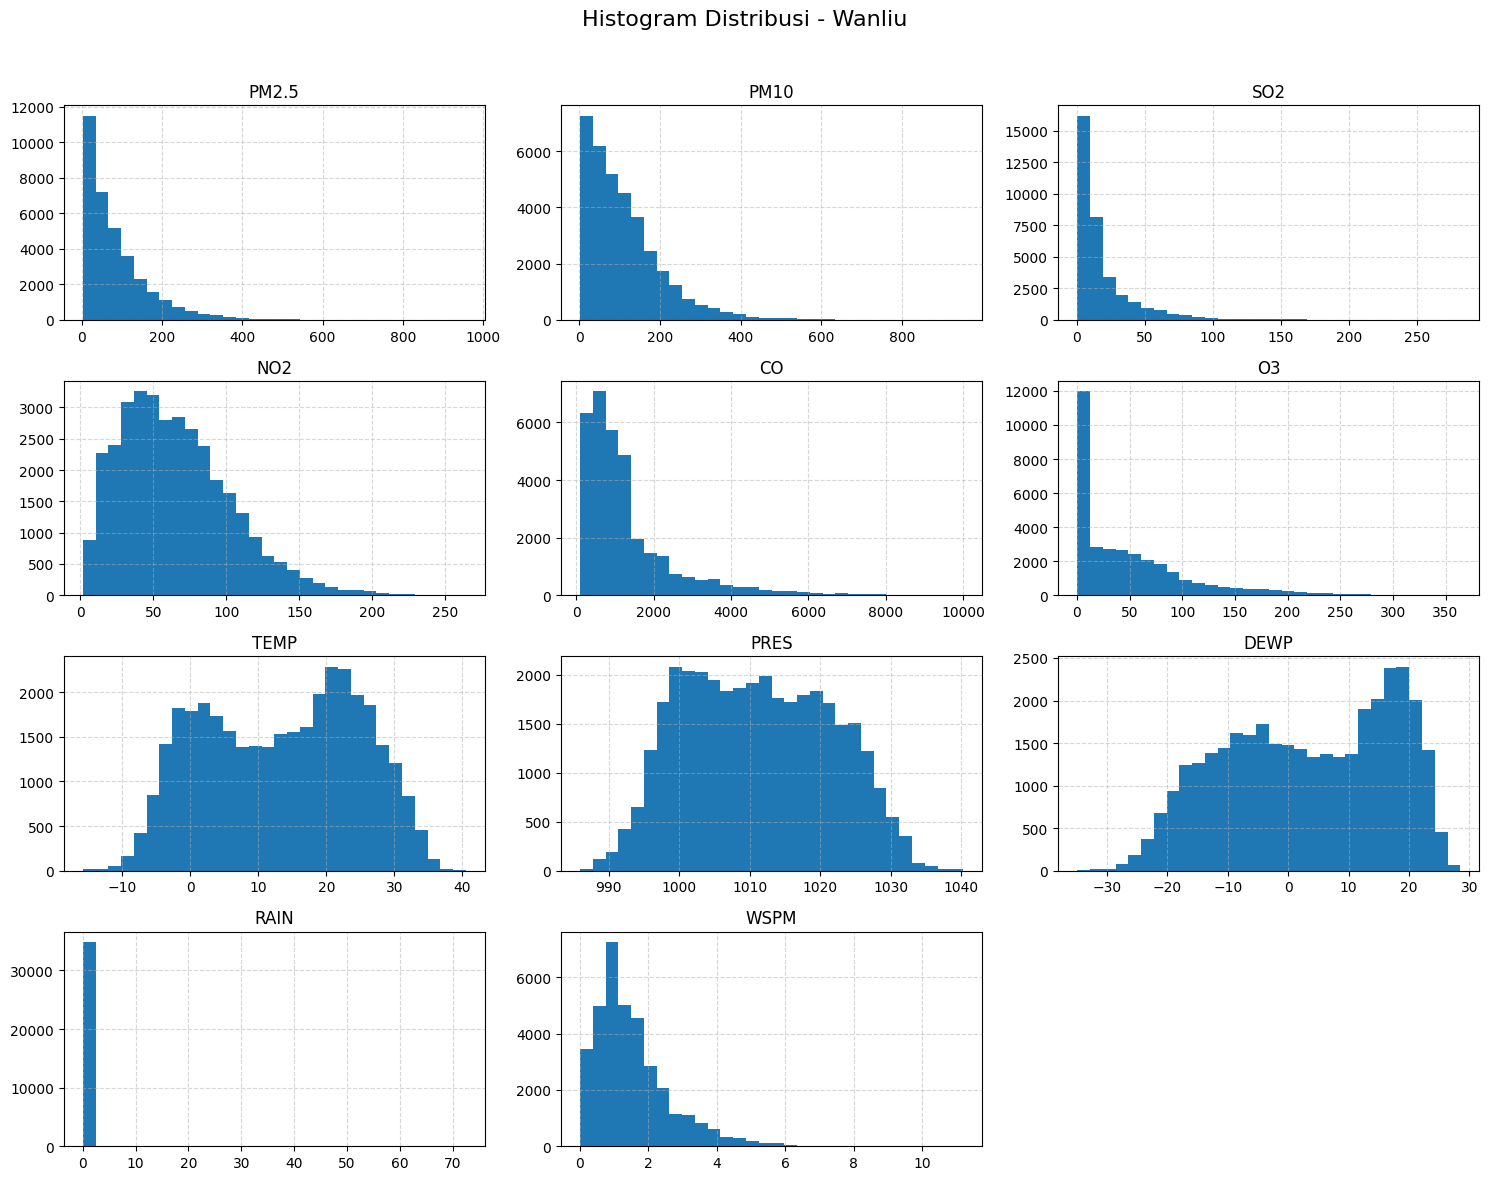

In [114]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = wanliu_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Wanliu", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [115]:
pollutant_wanliu = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_wanliu = ["TEMP", "WSPM"]
pres_dewp_wanliu = ["PRES", "DEWP"]
rain_wd_wanliu = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    wanliu_df[col] = (wanliu_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    wanliu_df[col] = (wanliu_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    wanliu_df[col] = (wanliu_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    wanliu_df[col] = wanliu_df[col].fillna(wanliu_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [116]:
wanliu_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [117]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Membersihkan Tabel **wanshouxigong_df**

**Missing Values**

1. Mengecek Distribusi Data Setiap Atribut

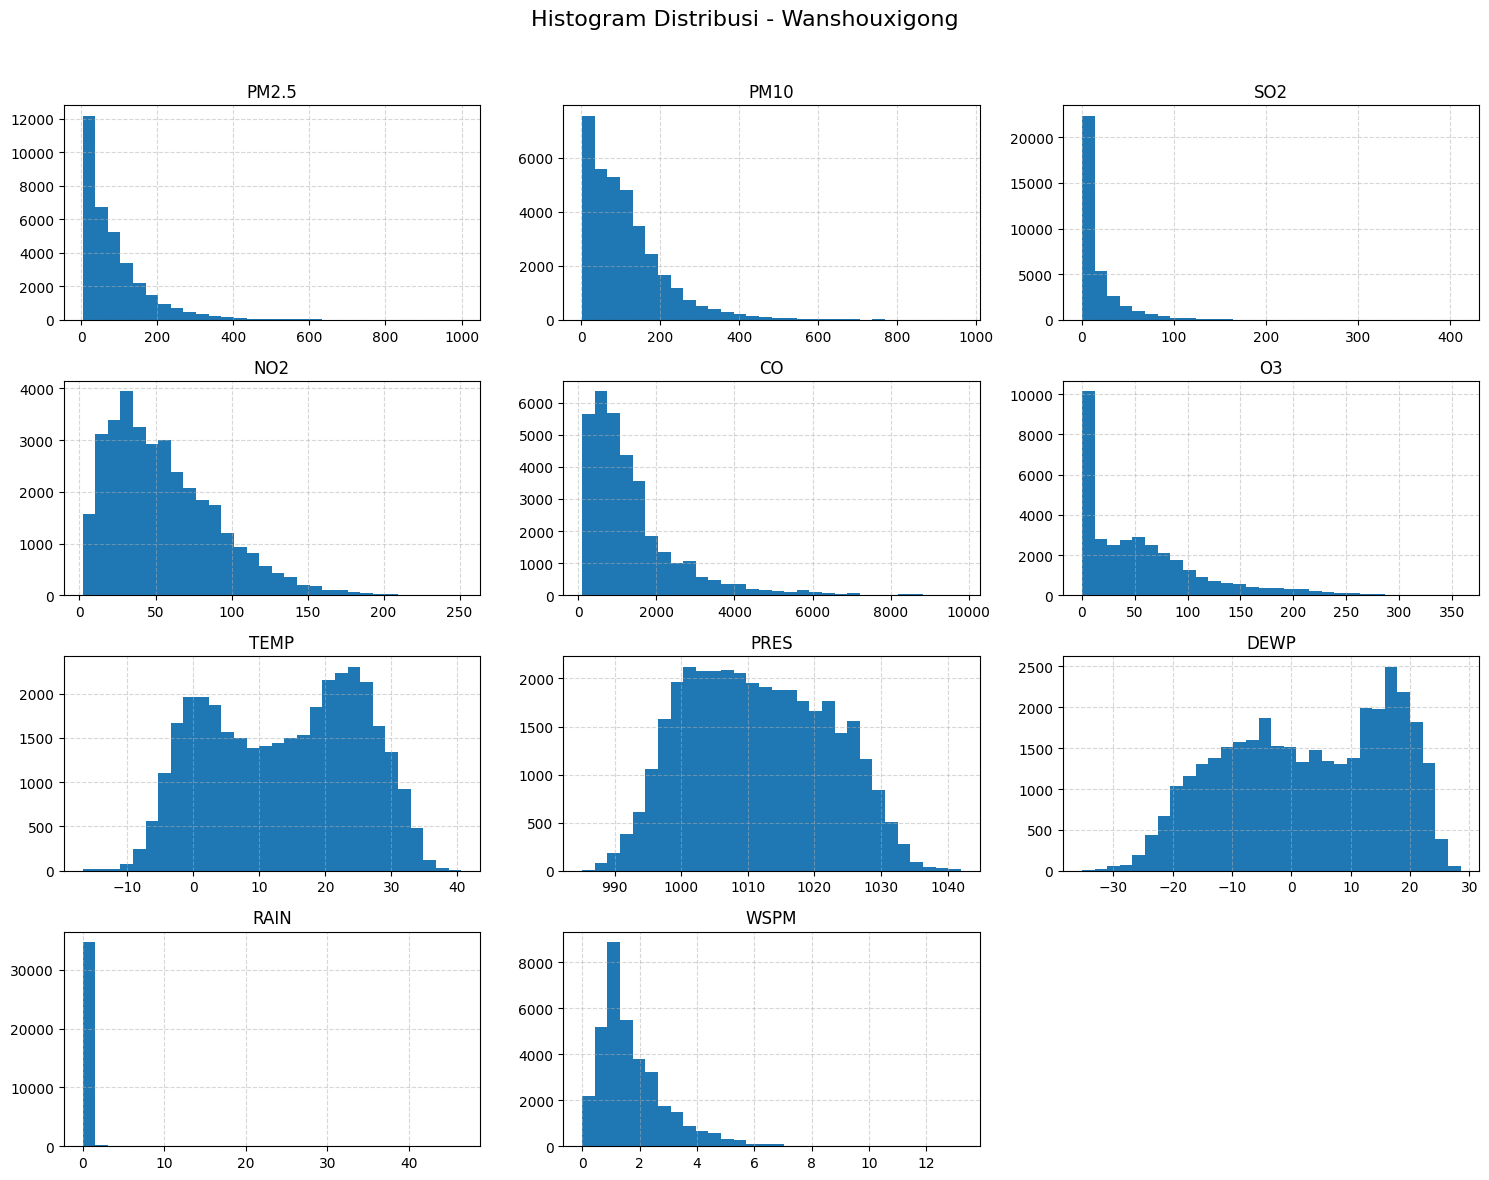

In [118]:
cols = [
    "PM2.5","PM10","SO2","NO2","CO","O3",
    "TEMP","PRES","DEWP","RAIN","WSPM"
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    data = wanshouxigong_df[col].dropna()

    axes[i].hist(data, bins=30)
    axes[i].set_title(col)
    axes[i].grid(True, linestyle='--', alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogram Distribusi - Wanshouxigong", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


2. Imputasi Missing Values
    - Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
    - Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
    - Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
    - Imputasi RAIN dan wd menggunakan nilai modus

In [119]:
pollutant_wanshouxigong = ["PM2.5","PM10","SO2","NO2","CO","O3"]
temp_wspm_wanshouxigong = ["TEMP", "WSPM"]
pres_dewp_wanshouxigong = ["PRES", "DEWP"]
rain_wd_wanshouxigong = ["RAIN", "wd"]

for col in pollutant_aotizhongxin:
    wanshouxigong_df[col] = (wanshouxigong_df.groupby("hour")[col].transform(lambda x: x.fillna(x.median())))

for col in temp_wspm_aotizhongxin:
    wanshouxigong_df[col] = (wanshouxigong_df.groupby(["month", "hour"])[col].transform(lambda x: x.fillna(x.median())))

for col in pres_dewp_aotizhongxin:
    wanshouxigong_df[col] = (wanshouxigong_df.groupby(["month"])[col].transform(lambda x: x.fillna(x.median())))

for col in rain_wd_aotizhongxin:
    wanshouxigong_df[col] = wanshouxigong_df[col].fillna(wanshouxigong_df[col].mode()[0])

3. Cek Hasil Penanganan Missing Values

In [120]:
wanshouxigong_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [121]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### **Insight:**
- Tahapan cleaning data yang dilakukan hanya imputasi missing values karena tidak terdapat data duplikat dan nilai outlier dibiarkan
- Imputasi missing values di 12 tabel dilakukan dengan tahapan yang sama karena distribusi data setiap atribut serupa. Berikut tahapan yang dilakukan:
  1. Imputasi pada atribut kategori polutan (PM2.5, PM10, SO2, NO2, CO, O3) dengan median berdasarkan atribut *hour* karena polutan seringkali terpengaruh oleh jam kegiatan masyarakat dan distribusi data menunjukkan right-skewed
  2. Imputasi pada atribut TEMP dan WSPM dengan median berdasarkan atribut *month* dan *hour* karena temperatur dan kecepatan angin terpengaruh oleh musim dan waktu
  3. Imputasi PRES dan DEWP dengan median berdasarkan atribut *month* karena tekanan udara dan titik embun terpengaruh oleh musim
  4. Imputasi RAIN dan wd menggunakan nilai modus

## Exploratory Data Analysis (EDA)

### Explore **aotizhongxin_df**

In [122]:
aotizhongxin_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.098771    109.543512     17.149074     59.112476   1241.752738   
std        81.153858     94.323379     22.559177     36.644968   1193.811873   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     39.000000      3.000000     31.000000    500.000000   
50%        58.000000     86.000000      9.000000     54.000000    900.000000   
75%       112.000000    153.000000     21.000000     81.000000   1500.000000   
max       898.000000    984.000000    341.000000    290.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.333312     13.580180   1011.850769      3.118974      0.067383   
std        56.981157     11.400536     10.403550     13.690350      0.909798   
min         0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%         9.000000      3.100000   1003.300000     -8.100000      0.000000   
50%        41.000000     14.500000   1011.400000      3.800000      0.000000   
75%        81.000000     23.300000   1020.100000     15.600000      0.000000   
max       423.000000     40.500000   1042.000000     28.500000     72.500000   

           wd          WSPM       station  
count   35064  35064.000000         35064  
unique     16           NaN             1  
top        NE           NaN  Aotizhongxin  
freq     5221           NaN         35064  
mean      NaN      1.708339           NaN  
std       NaN      1.203878           NaN  
min       NaN      0.000000           NaN  
25%       NaN      0.900000           NaN  
50%       NaN      1.400000           NaN  
75%       NaN      2.200000           NaN  
max       NaN     11.200000           NaN

In [123]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
aotizhongxin_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     91.700890  124.160164  17.978497  71.708535  1416.553730   38.376656
1     91.476386  123.205749  18.049962  70.571272  1442.839151   34.285664
23    91.279124  125.238535  17.721741  72.315797  1396.090349   43.273226
2     91.124504  119.836756  16.976321  67.117501  1420.451061   30.875619
22    90.281314  127.262765  16.923378  72.333476  1376.722793   48.936882
21    88.731896  126.702396  16.244598  70.235389  1332.503080   57.656045
3     88.145243  114.033744  16.233244  65.081581  1322.441478   28.060197
20    85.706023  124.035455  15.856872  66.879916  1273.571526   67.783057
4     84.854209  108.607529  15.333330  64.278885  1285.548255   21.377764
19    81.668104  118.033470  15.741868  61.175489  1174.465435   79.326447
5     81.278645  102.998494  14.616955  61.950467  1270.903491   24.551401
6     79.349076  100.095825  14.550817  61.366639  1277.611225   23.509030
11    78.790212  100.910335  20.285744  51.842647  1223.061602   57.806886
10    78.561944  102.707050  19.984541  55.287730  1286.714579   44.202679
12    78.125257   97.844627  19.784439  48.688356  1150.026010   72.393159
9     77.956879  103.163587  18.705591  58.930002  1313.679671   32.522847
18    77.496235  112.661191  15.986173  54.116798  1076.104038   90.061284
8     77.273785  100.865161  16.428989  61.609730  1320.182752   24.945724
13    77.184805   95.271732  19.124819  44.900861  1094.379192   86.354896
7     77.073648   98.319302  14.880459  61.434011  1298.963723   22.697249
14    76.290897   97.085558  18.248032  42.904165  1031.616701   96.502965
17    75.586585  106.471595  16.905112  47.620331  1021.691992   98.411509
15    75.522245   98.389049  17.842437  42.907728  1014.500342  101.802342
16    74.912594  101.144216  17.173861  43.442121   981.443532  102.285949

In [124]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
aotizhongxin_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     104.700773  127.547379  24.849012  72.286456  2094.959677  23.020166   
3       99.232762  149.614785  31.455151  63.181973  1355.976478  47.309328   
11      98.072083  123.672674  15.840347  72.602882  1826.180556  19.757310   
10      95.923387  118.963542  10.575456  74.054867  1169.959677  27.456090   
1       92.500202  113.660988  34.724630  65.848925  1938.978495  27.195733   
2       85.350848  103.775258  30.794617  53.594948  1430.125369  43.344948   
4       75.278993  129.766389  16.191488  52.876142   850.576389  64.051228   
7       74.976142   85.120800   5.821308  48.060620   830.340054  94.816905   
6       71.539410   86.821181   8.415766  49.415465   915.353819  93.168521   
5       67.241465  115.402923  16.007292  48.926344   787.286626  87.404506   
9       64.369201   87.140903   7.148946  59.213413   911.040278  51.156532   
8       55.671203   72.176109   4.497957  48.722673   792.002688  84.474354   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.133031  1022.891868 -11.002117  0.000706  1.758333  
3       8.403951  1014.972116  -7.177352  0.009073  2.028125  
11      4.683438  1020.321215  -3.703611  0.015139  1.513160  
10     13.510233  1015.940409   6.278864  0.039516  1.364852  
1      -1.638564  1023.248774 -14.335013  0.000336  1.877621  
2       1.298027  1021.382682 -12.689971  0.010841  1.973857  
4      15.309271  1009.360347   1.170903  0.023542  2.173958  
7      27.195262   999.078730  20.390759  0.267238  1.470397  
6      24.561424  1000.316250  16.130382  0.157326  1.543021  
5      21.419657  1003.427655   7.710517  0.047413  2.043548  
9      20.907201  1009.668090  14.396250  0.117326  1.348229  
8      26.715121  1002.197077  19.356250  0.116532  1.420296

In [125]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
aotizhongxin_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  82.350831  112.898557  23.372391  63.377501  1138.932190  48.373970
2014  88.891610  120.049121  20.533733  63.308322  1166.552511  49.154201
2015  81.482511  111.710833  14.309566  60.765023  1387.500000  62.994406
2016  73.757001   94.502561  10.833106  48.595059  1190.209472  60.943534
2017  94.327684  107.047316  20.680085  66.055085  1658.333333  47.456921

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 00.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.133031°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 94.327684 µg/m³

### Explore **changping_df**

In [126]:
changping_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       70.550941     94.289049     14.812054     44.012405   1135.852841   
std        71.620389     82.803568     20.816781     29.274405   1081.771320   
min         2.000000      2.000000      0.285600      1.847700    100.000000   
25%        18.000000     34.000000      2.000000     22.000000    500.000000   
50%        46.000000     72.000000      7.000000     36.000000    800.000000   
75%        98.000000    129.000000     18.000000     60.000000   1400.000000   
max       882.000000    999.000000    310.000000    226.000000  10000.000000   

                  O3         TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.00000  35064.000000  35064.000000  35064.000000   
unique           NaN          NaN           NaN           NaN           NaN   
top              NaN          NaN           NaN           NaN           NaN   
freq             NaN          NaN           NaN           NaN           NaN   
mean       57.808122     13.67099   1007.772663      1.486596      0.060278   
std        53.908131     11.36718     10.225032     13.825695      0.752355   
min         0.214200    -16.60000    982.400000    -35.100000      0.000000   
25%        16.000000      3.40000    999.300000    -10.300000      0.000000   
50%        46.000000     14.60000   1007.400000      1.700000      0.000000   
75%        79.000000     23.30000   1016.000000     14.200000      0.000000   
max       429.000000     41.40000   1036.500000     27.200000     52.100000   

           wd          WSPM    station  
count   35064  35064.000000      35064  
unique     16           NaN          1  
top       NNW           NaN  Changping  
freq     4916           NaN      35064  
mean      NaN      1.853817        NaN  
std       NaN      1.309160        NaN  
min       NaN      0.000000        NaN  
25%       NaN      1.000000        NaN  
50%       NaN      1.500000        NaN  
75%       NaN      2.300000        NaN  
max       NaN     10.000000        NaN

In [127]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
changping_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3
hour                                                                     
20    77.608487  111.405886  15.154156  52.214791  1202.249144  66.648535
21    77.604038  107.170089  14.551265  50.727207  1212.934292  58.802036
10    75.277207  103.821355  19.825470  47.428352  1319.843943  45.203331
19    75.229295  108.709172  15.116797  51.671031  1143.796030  75.647577
11    75.149144  101.036961  19.698579  44.340191  1207.997947  57.737520
22    74.888433  100.383984  13.686197  48.327573  1191.299795  54.019385
12    74.189596   97.110883  18.634628  40.773850  1105.466119  70.431229
23    73.113895   95.355784  13.053130  45.828887  1183.154689  50.702279
0     72.020534   92.986311  12.369790  44.030908  1177.748802  48.072261
18    71.520192  102.688569  14.822969  46.005402  1055.092402  86.911462
9     71.484600   99.572895  18.033985  49.034173  1333.804928  35.217110
13    71.279261   92.245038  17.901360  37.936354  1013.204654  82.193971
1     71.168036   89.111567  12.054896  41.814277  1201.911704  43.410000
2     69.527173   85.977687  14.099875  40.341278  1094.720739  38.376283
14    68.937714   91.129363  16.589739  36.506383   961.593429  91.353199
15    68.600274   93.947296  16.161234  36.530990   947.427789  96.561612
17    68.586585   97.233402  14.857858  40.619448   968.779603  94.967388
3     67.516359   83.286105  11.192505  40.337302  1087.674880  37.003493
16    67.366667   93.751814  15.226316  37.457341   932.574264  98.170090
8     67.069815   92.540041  15.061566  49.593370  1296.979466  28.894872
4     65.125941   79.878166  11.155453  40.979206  1081.238877  34.598582
7     63.898152   85.682409  12.893137  47.315546  1233.529774  28.259716
5     63.340452   78.223135  11.437791  42.596804  1113.818617  32.609429
6     62.720739   79.689254  11.910608  43.887062  1193.626283  31.603569

In [128]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
changping_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                        
12     87.090390  110.338374  25.437468  60.920575  1953.965054  20.665186   
3      83.815692  129.302688  25.617139  54.882908  1238.571909  50.489494   
1      83.616398  104.409409  31.949261  57.400202  1843.783602  27.680679   
10     80.822581   99.458165   6.844609  52.595672  1018.245968  31.543287   
2      79.237094   96.604720  28.836652  47.876239  1374.815634  37.724373   
11     78.391285  104.694792  15.056462  56.310118  1560.104167  19.720358   
4      68.775694  107.793576  11.340366  40.976404   776.236111  70.276318   
7      63.015457   74.961526   4.846529  27.220433   820.059812  97.724345   
5      60.086895   95.846102  11.956488  34.332027   701.397849  91.787249   
6      59.537847   76.560069   7.038362  29.925304   780.917014  94.382799   
9      55.630035   67.731944   4.971472  38.025009   837.012153  58.643073   
8      46.721539   63.315356   4.421653  27.677932   727.318548  91.659005   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12      0.100067  1018.955914 -12.869523  0.001042  2.084543  
3       8.398986  1010.819484  -9.207359  0.008871  1.969590  
1      -1.540977  1018.865132 -15.769422  0.000202  2.112030  
10     13.575558  1011.847295   4.687198  0.039651  1.566431  
2       1.251457  1017.125037 -13.620391  0.005236  2.225166  
11      5.097917  1016.049271  -5.680799  0.026736  1.769132  
4      15.437361  1005.186493  -1.125104  0.019132  2.165764  
7      27.247513   995.227083  19.092036  0.257796  1.603864  
5      21.616465   999.347749   5.655074  0.048085  2.131620  
6      24.705313   996.384097  14.697951  0.108854  1.663333  
9      20.737932  1005.707604  13.152188  0.122049  1.408160  
8      26.686895   998.336022  17.974194  0.081956  1.565927

In [129]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
changping_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  72.523148   91.223039  19.152869  41.113745  1004.758170  61.162403
2014  78.359395  105.842580  20.750228  45.331139  1184.589041  62.849658
2015  68.728756   93.467660  11.666918  42.602380  1153.641553  57.834053
2016  61.450250   86.177482   8.153916  45.427521  1117.509107  53.895264
2017  79.743644   94.116172  16.322740  50.832393  1518.008475  33.334746

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 20.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata 0.100067°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 79.743644	 µg/m³

### Explore **dingling_df**

In [130]:
dingling_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       65.438068     83.317146     11.629584     27.288140    888.966604   
std        71.555610     78.861221     15.383009     25.964979    879.444507   
min         3.000000      2.000000      0.285600      1.026500    100.000000   
25%        14.000000     26.000000      2.000000      9.000000    300.000000   
50%        41.000000     61.000000      5.000000     19.000000    600.000000   
75%        91.000000    116.000000     14.000000     37.000000   1100.000000   
max       881.000000    905.000000    156.000000    205.000000  10000.000000   

                  O3         TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.00000  35064.000000  35064.000000  35064.000000   
unique           NaN          NaN           NaN           NaN           NaN   
top              NaN          NaN           NaN           NaN           NaN   
freq             NaN          NaN           NaN           NaN           NaN   
mean       68.349557     13.67099   1007.772663      1.486596      0.060278   
std        52.918790     11.36718     10.225032     13.825695      0.752355   
min         0.214200    -16.60000    982.400000    -35.100000      0.000000   
25%        32.000000      3.40000    999.300000    -10.300000      0.000000   
50%        61.000000     14.60000   1007.400000      1.700000      0.000000   
75%        89.000000     23.30000   1016.000000     14.200000      0.000000   
max       500.000000     41.40000   1036.500000     27.200000     52.100000   

           wd          WSPM   station  
count   35064  35064.000000     35064  
unique     16           NaN         1  
top       NNW           NaN  Dingling  
freq     4916           NaN     35064  
mean      NaN      1.853817       NaN  
std       NaN      1.309160       NaN  
min       NaN      0.000000       NaN  
25%       NaN      1.000000       NaN  
50%       NaN      1.500000       NaN  
75%       NaN      2.300000       NaN  
max       NaN     10.000000       NaN

In [131]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
dingling_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5       PM10        SO2        NO2          CO          O3
hour                                                                    
18    70.724162  96.969884  12.301599  31.792130  902.047912   96.900126
19    70.690623  97.604791  11.024535  31.860240  921.418207   86.132466
17    69.566051  93.887406  13.620385  30.261816  870.626283  104.133029
20    69.267762  93.804723  10.641770  30.629286  941.878850   77.064176
15    68.673238  88.956194  15.014680  27.832070  866.283368  103.982718
21    68.664339  88.987406  10.397862  29.228604  945.578371   69.903893
16    68.599521  91.149213  14.194738  28.485142  856.802875  106.406092
13    68.579055  87.732649  16.051346  27.781304  902.255305   89.532786
12    68.246817  88.834908  16.603310  28.543754  924.911704   78.417465
14    68.184120  87.669062  15.363076  27.378630  864.914442   98.777487
22    67.130732  84.444901   9.858503  27.754956  918.819302   65.319772
11    67.004586  86.010746  16.437186  28.424201  919.843943   67.834086
23    66.800205  82.808898   9.483509  26.859820  918.135524   61.213549
10    66.151951  84.022177  15.410334  27.711794  914.780972   58.913039
0     65.901369  80.593703   9.110692  26.280689  911.221081   57.532707
1     65.734702  78.062765   8.813543  25.451297  905.846680   54.267788
2     64.030938  76.045448   8.260801  24.523557  893.150582   51.689177
9     63.429158  81.650650  12.982635  27.187684  906.427105   49.483793
3     61.163450  72.798768   8.217392  24.299266  826.967146   48.800703
8     59.801506  77.114990  10.830201  26.385898  866.423682   42.655913
4     59.730253  70.699452   8.285915  23.776795  834.631759   45.034670
5     58.153730  69.094182   8.289537  23.710034  838.666667   43.542409
7     57.235387  71.933470   9.362736  24.984366  845.446270   40.656177
6     57.049966  68.735113   8.553722  23.772029  838.120465   42.195341

In [132]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
dingling_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3  \
month                                                                         
3      83.817977  119.153864  18.505747  33.953761   991.613239   67.417011   
12     78.224294   90.963374  20.087440  43.497648  1435.954301   31.923661   
10     77.767809   90.498320   7.181748  30.383136   832.258065   45.135710   
2      77.209624   88.160767  19.770121  27.649336  1084.144543   54.254794   
1      72.513071   88.484845  22.949317  38.375605  1329.603495   40.129368   
11     69.721111   87.742326  14.111439  42.427892  1149.722222   28.977115   
4      64.214167  100.447639   9.536176  25.603646   627.600347   85.722603   
7      59.413844   67.713105   4.195405  16.114910   673.487567   95.036815   
6      56.216250   65.629896   5.520136  17.618792   689.975000  103.440337   
5      53.356754   87.386761   9.213445  20.039504   554.795699  104.470895   
9      49.663576   58.112014   4.420631  17.951857   653.956944   67.885680   
8      43.474933   55.254234   4.368448  13.694590   647.782258   94.957689   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
3       8.398986  1010.819484  -9.207359  0.008871  1.969590  
12      0.100067  1018.955914 -12.869523  0.001042  2.084543  
10     13.575558  1011.847295   4.687198  0.039651  1.566431  
2       1.251457  1017.125037 -13.620391  0.005236  2.225166  
1      -1.540977  1018.865132 -15.769422  0.000202  2.112030  
11      5.097917  1016.049271  -5.680799  0.026736  1.769132  
4      15.437361  1005.186493  -1.125104  0.019132  2.165764  
7      27.247513   995.227083  19.092036  0.257796  1.603864  
6      24.705313   996.384097  14.697951  0.108854  1.663333  
5      21.616465   999.347749   5.655074  0.048085  2.131620  
9      20.737932  1005.707604  13.152188  0.122049  1.408160  
8      26.686895   998.336022  17.974194  0.081956  1.565927

In [133]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
dingling_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5       PM10        SO2        NO2           CO         O3
year                                                                    
2013  64.317402  78.261574  13.865692  29.253478   801.024646  64.830127
2014  73.321929  89.807363  14.314987  27.011906   870.068493  72.345479
2015  64.316301  85.109692  11.292768  26.769692   962.465753  70.893836
2016  59.186817  80.054417   7.164519  25.308629   866.199909  67.082366
2017  68.195975  78.536723  13.201271  34.290960  1148.516949  54.003178

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 18.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 3 dengan suhu rata-rata 8.398986°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 68.195975 µg/m³

### Explore **dongsi_df**

In [134]:
dongsi_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       85.604583    109.925231     18.368515     53.353526   1298.132358   
std        85.742888     97.507035     22.718666     33.308555   1140.788313   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     38.000000      4.000000     28.000000    600.000000   
50%        60.000000     86.000000     10.000000     47.917450   1000.000000   
75%       117.000000    150.000000     24.000000     72.000000   1600.000000   
max       737.000000    955.000000    300.000000    258.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       57.045000     13.667044   1012.551345      2.443632      0.063983   
std        57.597705     11.459939     10.265668     13.811951      0.786059   
min         0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%        13.000000      3.100000   1004.000000     -8.800000      0.000000   
50%        44.000000     14.600000   1012.200000      3.000000      0.000000   
75%        81.000000     23.500000   1020.900000     15.000000      0.000000   
max      1071.000000     41.100000   1042.000000     28.800000     46.400000   

           wd          WSPM station  
count   35064  35064.000000   35064  
unique     16           NaN       1  
top       ENE           NaN  Dongsi  
freq     3939           NaN   35064  
mean      NaN      1.860588     NaN  
std       NaN      1.280163     NaN  
min       NaN      0.000000     NaN  
25%       NaN      1.000000     NaN  
50%       NaN      1.500000     NaN  
75%       NaN      2.400000     NaN  
max       NaN     10.500000     NaN

In [135]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
dongsi_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
22    97.071184  128.993840  18.486053  64.271512  1449.412047   51.647426
23    97.059343  126.880424  18.826789  64.132971  1472.063655   47.530882
21    96.995140  130.574196  18.207837  62.509852  1410.327173   59.375787
0     96.697262  124.362081  18.886464  63.355283  1459.402464   43.385212
1     96.178919  121.516085  19.252301  62.402176  1465.631759   38.893338
2     94.601643  118.731280  18.660770  61.469326  1467.409309   32.692325
20    92.983573  127.742642  17.568381  58.575805  1341.057495   69.131728
3     92.187885  113.941205  18.841992  60.850098  1297.869952   27.797459
4     88.750513  108.479124  18.284737  59.619435  1234.423682   30.515301
19    86.725257  120.433744  17.174376  52.620545  1240.102669   80.539838
5     84.791307  103.377823  17.450138  57.356502  1361.524298   27.809631
6     81.947981  101.978782  16.949163  57.352186  1381.442163   26.484548
18    80.906913  111.906913  16.668125  45.668472  1137.774812   90.492677
7     79.937851  101.169131  17.225988  58.247219  1407.451745   25.541542
13    79.775496   96.906913  19.757406  40.877135  1152.426420   84.940885
8     79.562149  102.368857  17.996932  58.654430  1419.771389   27.727109
12    79.406502   97.660096  20.312285  44.954894  1226.548255   72.297668
11    79.385352  100.263929  20.599049  48.427509  1285.137577   58.618686
9     79.145106  102.088980  19.095677  55.640852  1376.104723   35.227885
10    79.109719  101.441684  20.092279  52.266183  1322.167693   45.729530
14    78.587269   96.313142  18.475971  37.655371  1084.861739   94.593380
17    78.252088  103.475702  16.871719  39.996151  1067.344969   97.513756
15    77.275838   97.494182  17.826622  36.567854  1060.772074   99.578798
16    77.175702  100.104791  17.333298  37.012867  1034.148528  101.014606

In [136]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
dongsi_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     112.507762  138.467204  28.921426  66.726927  2066.868280  20.477176   
1      100.143851  118.284005  33.288071  58.857335  1806.754032  27.799411   
3       99.934913  142.529099  30.362135  61.523186  1391.998320  51.644579   
11      99.631458  126.697292  19.294410  64.117917  1677.361111  18.951430   
10      97.638273  122.526210  12.231950  68.196700  1272.983871  29.600687   
2       93.116150  108.963680  30.430678  45.810862  1405.862832  42.034862   
7       79.144489   85.913474   7.341291  41.568633  1007.963710  89.087173   
4       76.796181  121.072569  16.501370  47.237124   915.950694  71.714678   
6       72.690451   87.341528  10.824005  45.421043  1046.721875  93.113377   
5       69.751815  108.178024  17.506989  45.107669   930.656250  91.740440   
9       67.080174   84.606562   8.186070  53.623323  1084.304167  55.905731   
8       58.640020   73.793212   6.001612  41.285236   964.616935  91.510044   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.138710  1023.122816 -11.938172  0.000706  1.916431  
1      -1.783784  1024.074647 -14.620901  0.000336  1.916902  
3       8.439468  1015.861229  -7.993952  0.007661  2.076613  
11      4.763090  1020.440972  -4.671667  0.015174  1.727361  
10     13.553009  1016.744072   5.685148  0.046808  1.523589  
2       1.210564  1022.173353 -13.087094  0.011873  2.095262  
7      27.438340   999.877050  19.801411  0.262466  1.644086  
4      15.439931  1010.158681   0.164028  0.025625  2.346667  
6      24.700243  1001.104132  15.532882  0.129028  1.721632  
5      21.709039  1004.202688   6.716499  0.045094  2.283132  
9      21.014414  1010.476007  13.939028  0.132014  1.512014  
8      26.916801  1002.975168  18.908636  0.087870  1.579839

In [137]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
dongsi_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                      
2013   86.412582  104.760485  23.704793  57.527073  1209.369962  63.126982
2014   87.153733  116.711176  23.703014  54.725138  1363.436073  57.089406
2015   86.900217  111.586005  15.147968  50.255198  1332.351598  55.812420
2016   79.373805  102.396858  11.488843  50.875622  1229.940801  55.938124
2017  102.466808  131.158192  20.291667  57.761299  1565.819209  39.718113

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 22.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.138710°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 102.466808 µg/m³

### Explore **guanyuan_df**

In [138]:
guanyuan_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       82.485364    108.736585     17.469503     57.736710   1253.039784   
std        80.292706     91.054349     23.463794     34.872331   1138.393437   
min         2.000000      2.000000      1.000000      2.000000    100.000000   
25%        24.000000     41.000000      3.000000     31.000000    600.000000   
50%        59.000000     89.000000      8.000000     51.000000    900.000000   
75%       113.000000    148.000000     21.000000     78.000000   1500.000000   
max       680.000000    999.000000    293.000000    270.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.225523     13.580180   1011.850769      3.118974      0.067383   
std        56.714131     11.400536     10.403550     13.690350      0.909798   
min         0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%         8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%        40.000000     14.500000   1011.400000      3.800000      0.000000   
75%        80.000000     23.300000   1020.100000     15.600000      0.000000   
max       415.000000     40.500000   1042.000000     28.500000     72.500000   

           wd          WSPM   station  
count   35064  35064.000000     35064  
unique     16           NaN         1  
top        NE           NaN  Guanyuan  
freq     5221           NaN     35064  
mean      NaN      1.708339       NaN  
std       NaN      1.203878       NaN  
min       NaN      0.000000       NaN  
25%       NaN      0.900000       NaN  
50%       NaN      1.400000       NaN  
75%       NaN      2.200000       NaN  
max       NaN     11.200000       NaN

In [139]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
guanyuan_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
23    91.336140  123.029979  17.866768  67.427264  1375.488706   44.948184
22    90.907598  124.229637  17.324518  67.183942  1342.015743   50.462781
0     90.844627  119.971937  17.933481  65.878068  1381.033539   41.057441
21    90.757495  125.658795  16.819189  66.354911  1319.299110   57.890072
1     90.062081  116.694730  18.961060  64.466841  1397.592745   36.717919
20    89.006776  124.183025  16.456226  64.039479  1262.620123   67.676651
2     87.961739  113.009719  18.909448  62.929601  1333.942505   32.700611
3     86.257974  108.429090  17.487727  61.566668  1310.255989   30.947000
19    84.812526  118.234634  16.105390  59.933268  1211.081451   78.132120
4     83.869952  104.614648  16.600425  61.051990  1309.023272   27.682949
5     80.797810  101.143053  15.734043  59.385614  1279.116359   25.591720
18    79.678987  111.353867  15.818700  53.288718  1125.251198   89.005799
6     79.223819  100.390144  15.545963  60.232925  1293.969199   23.987487
9     78.639151  104.797536  19.323000  61.103543  1375.006845   30.255061
13    78.540726   98.187543  18.558119  46.443561  1116.553730   84.334001
11    78.451745  103.912731  20.132968  53.781930  1254.264887   55.310682
12    78.188912  100.201916  19.446844  50.451698  1190.476386   70.143670
8     78.183436  104.005476  17.457590  63.636421  1391.431896   23.386395
10    78.092402  104.108830  20.256429  57.157760  1311.761123   41.650058
7     77.989049  101.363244  16.060159  62.768870  1342.428474   21.737626
14    77.780972   97.838467  17.273870  43.707211  1058.032170   95.077391
17    76.552361  104.506502  16.070185  46.980252  1051.531828   96.765403
15    76.295688   98.954620  16.860661  42.661040  1029.490760   99.906341
16    75.416769  100.857906  16.265319  43.249472  1011.286790  100.045197

In [140]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
guanyuan_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     109.969254  130.443380  29.286216  76.113295  2067.540323  18.559979   
11      98.836701  124.592292  17.037257  69.599097  1689.895833  17.773564   
10      96.674731  118.098454   8.763384  67.574051  1177.923387  28.936872   
3       94.095027  135.318112  31.250787  67.235545  1331.047379  48.089648   
1       93.032325  115.806418  34.640927  69.880175  1805.208333  25.353682   
2       86.704093  102.439897  30.970870  57.860619  1371.128319  36.545050   
7       74.829469   89.244792   6.921875  40.878422   963.134745  91.041453   
4       73.869965  120.010243  15.450341  53.671017   866.161458  69.971897   
6       73.599479   92.044618   8.476389  43.573400  1076.734375  92.546290   
9       65.405799   83.553715   6.656134  53.502967   969.406944  54.410111   
5       64.086122  115.996169  15.676170  48.427213   857.314852  89.650872   
8       58.507594   76.256687   4.983395  44.193769   858.232527  88.614877   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.133031  1022.891868 -11.002117  0.000706  1.758333  
11      4.683438  1020.321215  -3.703611  0.015139  1.513160  
10     13.510233  1015.940409   6.278864  0.039516  1.364852  
3       8.403951  1014.972116  -7.177352  0.009073  2.028125  
1      -1.638564  1023.248774 -14.335013  0.000336  1.877621  
2       1.298027  1021.382682 -12.689971  0.010841  1.973857  
7      27.195262   999.078730  20.390759  0.267238  1.470397  
4      15.309271  1009.360347   1.170903  0.023542  2.173958  
6      24.561424  1000.316250  16.130382  0.157326  1.543021  
9      20.907201  1009.668090  14.396250  0.117326  1.348229  
5      21.419657  1003.427655   7.710517  0.047413  2.043548  
8      26.715121  1002.197077  19.356250  0.116532  1.420296

In [141]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
guanyuan_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  81.803785  107.500953  21.762822  58.114108  1138.410539  55.996049
2014  87.670525  115.465297  22.717614  63.475537  1340.559361  54.855228
2015  82.054167  106.102751  14.048539  54.806884  1311.495434  56.788269
2016  76.811020  104.440517  11.478142  53.481899  1167.270036  54.932529
2017  91.810381  116.462571  21.065678  64.795904  1476.553672  45.669772

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 23.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.133031	°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 91.810381 µg/m³

### Explore **gucheng_df**

In [142]:
gucheng_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       83.372815    118.621022     15.240972     55.723377   1308.306269   
std        82.110529     96.264038     21.076347     36.185602   1187.305081   
min         2.000000      2.000000      0.285600      2.000000    100.000000   
25%        25.000000     46.000000      2.000000     26.000000    600.000000   
50%        59.000000     99.000000      7.000000     50.000000    900.000000   
75%       114.000000    166.000000     19.000000     78.000000   1600.000000   
max       770.000000    994.000000    500.000000    276.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       57.491021     13.854820   1008.838353      2.599261      0.064374   
std        56.582622     11.293634     10.102765     13.786497      0.838142   
min         0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%        10.000000      3.600000   1000.500000     -9.000000      0.000000   
50%        45.000000     14.800000   1008.600000      3.000000      0.000000   
75%        83.000000     23.500000   1017.000000     15.300000      0.000000   
max       450.000000     41.600000   1038.100000     27.400000     41.900000   

           wd          WSPM  station  
count   35064  35064.000000    35064  
unique     16           NaN        1  
top         N           NaN  Gucheng  
freq     4108           NaN    35064  
mean      NaN      1.343359      NaN  
std       NaN      1.150604      NaN  
min       NaN      0.000000      NaN  
25%       NaN      0.600000      NaN  
50%       NaN      1.000000      NaN  
75%       NaN      1.800000      NaN  
max       NaN     12.000000      NaN

In [143]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
gucheng_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                       
21    101.140110  154.788501  16.299006  69.855631  1483.290897   54.808718
22     99.568104  151.352498  15.736383  71.108674  1507.650924   46.021911
20     98.728884  151.188022  16.435247  65.851741  1405.055441   67.712521
23     96.798152  146.499863  15.242913  69.946590  1524.833676   40.366358
0      93.447639  137.284052  14.761883  66.406809  1515.734428   38.156692
19     92.847775  142.217659  16.104574  58.887710  1316.623546   81.844168
1      89.098700  126.816290  14.998762  62.272703  1449.749487   35.432565
18     84.852841  130.853525  15.759851  51.538813  1209.571526   93.234516
2      84.111225  118.213073  13.461091  59.639840  1403.140315   30.426617
3      80.744285  112.307529  12.651138  59.500937  1283.704997   27.654143
17     79.885352  118.423682  15.730322  44.876506  1096.842574  101.330481
10     78.958248  107.017112  17.197386  53.626583  1335.855578   48.907036
11     78.481862  104.375770  17.911502  49.990791  1260.290897   61.891910
4      78.348049  106.067762  12.406638  57.597679  1216.830938   29.209372
13     78.235455  101.484600  17.849447  42.884639  1115.871321   89.724163
14     78.113621  102.230664  16.902904  40.576899  1068.576318   98.899633
12     77.878166  101.722793  18.130193  46.634511  1186.167009   75.761951
9      77.777550  110.071869  15.478422  56.347954  1405.874743   37.458760
16     77.447433  109.822040  16.298426  40.904017  1032.500342  104.691625
15     77.288843  105.006160  16.605161  40.390648  1058.855578  103.995291
8      75.739904  108.889117  13.490068  59.249037  1463.160164   28.852773
5      75.261807  100.807734  12.034525  55.889448  1334.828884   28.456600
6      73.314716   97.766461  11.957436  55.771836  1350.160164   28.119956
7      72.878850  101.697741  12.340054  57.611052  1374.180698   26.826747

In [144]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
gucheng_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     109.614214  135.211358  27.746299  70.966724  2265.591398  21.054723   
1      100.105914  121.744523  33.370598  65.005276  2156.250000  28.147278   
11      99.507882  128.034063  15.807882  66.193958  1764.687500  20.275393   
3       98.178394  151.554099  27.465202  63.201385  1451.299395  52.261990   
10      97.550067  126.429772   6.744945  66.750734  1189.852151  28.799762   
2       89.264712  107.154314  28.629794  51.308075  1547.271386  39.100111   
4       75.355243  135.618750  12.860702  54.233150   881.092708  67.828554   
6       72.224444  104.042708   5.827777  47.789591  1037.362153  95.488411   
7       71.464247   99.898858   3.793872  41.950209   847.913642  98.670792   
5       66.954267  129.598085  13.379500  49.839920   809.761761  91.013459   
9       65.472882   95.937222   4.574302  50.919387   919.962500  53.879982   
8       54.628999   86.861257   3.172278  40.009229   829.502688  91.982550   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12      0.291297  1019.334073 -11.834476  0.001344  1.428730  
1      -1.286920  1019.802307 -14.566163  0.000000  1.779133  
11      5.257257  1016.688507  -4.705660  0.021528  1.209792  
3       8.806168  1012.100007  -7.738710  0.005410  1.670968  
10     13.739449  1012.988211   5.521405  0.044657  0.953327  
2       1.493386  1018.473894 -12.885546  0.010103  1.825535  
4      15.680205  1006.481313   0.298403  0.021042  1.731597  
6      24.796458   997.583646  15.590035  0.102743  1.133056  
7      27.300470   996.411962  20.309812  0.280880  1.059274  
5      21.776848  1000.611694   7.077285  0.040289  1.453394  
9      20.875472  1006.668902  13.984965  0.146250  0.915000  
8      26.792137   999.514651  19.242608  0.094523  0.990894

In [145]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
gucheng_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                      
2013   81.530692  112.440700  17.502866  61.234177  1247.651280  55.902446
2014   88.635925  133.347352  19.550148  61.891416  1413.447489  58.245605
2015   83.137409  115.959726  13.271587  49.707979  1319.691781  60.642363
2016   77.101639  110.549066  10.176343  49.918716  1168.226321  59.464139
2017  100.725847  126.108757  20.452684  62.206215  1770.974576  29.326271

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 21.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata 0.291297°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 100.725847	 µg/m³

### Explore **huairou_df**

In [146]:
huairou_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       68.965634     90.976443     11.909365     32.083664   1011.609628   
std        70.368451     82.455646     18.675260     25.959415    882.178280   
min         2.000000      2.000000      0.285600      1.026500    100.000000   
25%        18.000000     29.000000      2.000000     13.000000    400.000000   
50%        46.000000     68.000000      4.000000     25.000000    800.000000   
75%        96.000000    128.000000     13.000000     45.000000   1300.000000   
max       762.000000    993.000000    315.000000    231.000000  10000.000000   

                  O3          TEMP          PRES         DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.00000  35064.000000   
unique           NaN           NaN           NaN          NaN           NaN   
top              NaN           NaN           NaN          NaN           NaN   
freq             NaN           NaN           NaN          NaN           NaN   
mean       59.492771     12.429997   1007.612291      2.21955      0.067833   
std        53.857893     11.753575     10.022150     14.05617      0.848384   
min         0.214200    -19.900000    982.800000    -43.40000      0.000000   
25%        19.000000      2.100000    999.400000     -9.70000      0.000000   
50%        49.000000     13.500000   1007.300000      2.70000      0.000000   
75%        82.000000     22.300000   1015.600000     15.30000      0.000000   
max       444.000000     40.300000   1036.500000     29.10000     45.900000   

           wd          WSPM  station  
count   35064  35064.000000    35064  
unique     16           NaN        1  
top        NW           NaN  Huairou  
freq     5245           NaN    35064  
mean      NaN      1.651744      NaN  
std       NaN      1.198413      NaN  
min       NaN      0.000000      NaN  
25%       NaN      0.900000      NaN  
50%       NaN      1.300000      NaN  
75%       NaN      2.000000      NaN  
max       NaN     12.900000      NaN

In [147]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
huairou_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
20    81.294661  118.763244  12.369187  44.100704  1198.419576   66.698352
21    80.633128  114.614853  11.465501  42.014951  1208.069131   58.143975
22    78.310062  105.626831  10.801207  39.169140  1177.883641   52.613657
19    77.779398  116.263655  12.798666  44.560431  1144.958932   78.056119
23    76.171595  100.300479  10.333518  35.633702  1144.071869   49.190889
0     73.880698   94.060370   9.448216  32.876744  1101.157426   46.496931
1     72.532512   89.318960   8.639377  30.020417  1082.060917   43.648602
18    71.843943  106.436003  13.515790  40.054934  1001.019849   89.915262
2     69.210746   82.140315   8.109933  27.020151   971.042437   41.057744
17    68.565366   97.926762  15.140384  33.007158   901.564682   99.143436
10    67.780972   90.308008  15.002384  32.216922  1013.683778   48.616400
3     66.713073   79.069199   7.567385  26.415054   953.930869   38.639253
11    66.645517   87.104791  16.650041  28.703986   960.293634   62.472170
16    66.622861   91.426420  16.079270  29.121418   864.540041  102.374457
9     66.152635   89.381930  12.296557  35.460925  1071.245722   35.781953
15    65.826831   87.771595  16.883535  26.584668   865.292266   99.688441
12    65.088364   83.964339  16.809090  26.324046   921.624914   75.214360
14    64.732375   84.106092  17.008648  24.938721   856.600958   94.206871
13    64.731896   83.350650  17.106833  24.740161   866.390828   85.939817
4     64.188912   75.654346   7.274859  25.902276   946.811773   37.414668
8     63.029432   83.158795   8.789769  36.042075  1077.679671   27.957503
5     62.541547   74.258042   7.242044  25.351644   972.479124   34.557062
7     60.513347   76.027858   7.331425  31.921359  1009.780972   28.128680
6     60.385352   72.401095   7.161141  27.826342   968.028063   31.869910

In [148]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
huairou_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                        
3      88.812399  120.757493  22.139907  40.920157  1086.128360  56.232163   
12     80.546909   95.332728  17.852940  45.960205  1586.357527  29.381387   
2      79.672972   91.120243  21.485903  35.894838  1171.755162  43.700943   
10     78.823253   96.077621   6.783937  34.469553   940.826613  36.740202   
1      78.346774   93.605074  22.409226  44.708905  1424.126344  28.180406   
11     76.540868   96.662917  11.601983  45.722986  1255.069444  26.443248   
7      66.714483   82.852923   4.302361  18.368599   848.653226  94.032464   
4      66.674479  107.420035  11.813307  31.526020   751.342708  76.035053   
6      55.675000   80.056597   6.114171  21.029162   861.712500  89.859592   
9      54.349826   68.578993   5.032188  22.441869   794.929514  58.889277   
5      54.117171   94.031452  10.376337  26.618302   717.397177  92.779773   
8      47.533569   64.873118   3.427851  17.435825   702.856183  80.665475   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
3       7.268349  1010.897991  -8.542070  0.006015  1.976613  
12     -1.810853  1017.868112 -12.645397  0.004133  1.661962  
2      -0.230064  1017.106932 -13.323414  0.010140  1.811449  
10     12.527442  1011.866948   5.218011  0.039012  1.448286  
1      -3.493127  1018.848597 -15.140961  0.001109  1.536156  
11      3.896701  1014.660799  -5.125347  0.021736  1.423993  
7      26.331048   995.312870  20.141263  0.301445  1.392070  
4      14.466528  1005.294306  -0.594132  0.023090  2.288542  
6      23.676944   996.469826  15.665174  0.159479  1.587535  
9      19.653269  1005.768359  14.286250  0.100243  1.250347  
5      20.574866   999.445665   6.584308  0.042238  2.061458  
8      25.562030   998.383031  19.227386  0.101310  1.394859

In [149]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
huairou_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5       PM10        SO2        NO2           CO         O3
year                                                                    
2013  67.771786  93.918301  16.425039  35.233046   981.397059  60.420084
2014  76.102009  99.104406  17.091768  36.818607  1050.856164  66.670211
2015  70.166826  89.187032   8.615448  28.303322  1037.420091  59.841560
2016  60.850524  82.070128   6.605012  27.420537   924.328324  53.276283
2017  73.918785  91.754944   9.711056  38.771186  1307.274011  46.686056

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 20.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 3 dengan suhu rata-rata 7.268349	°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 yakni 73.918785 µg/m³ tetapi masih lebih rendah dibandingkan tahun 2014 yang mencapai 76.102009 µg/m³

### Explore **nongzhanguan_df**

In [150]:
nongzhanguan_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       84.340834    108.671934     18.573243     57.893224   1310.843001   
std        85.533043     94.787921     24.147885     36.017529   1225.839988   
min         2.000000      2.000000      0.571200      2.000000    100.000000   
25%        23.000000     38.000000      3.000000     30.000000    500.000000   
50%        59.000000     85.000000      9.000000     51.000000   1000.000000   
75%       114.000000    148.000000     23.000000     79.000000   1600.000000   
max       844.000000    995.000000    257.000000    273.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       58.411070     13.667044   1012.551345      2.443632      0.063983   
std        58.090488     11.459939     10.265668     13.811951      0.786059   
min         0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%        10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%        45.000000     14.600000   1012.200000      3.000000      0.000000   
75%        84.000000     23.500000   1020.900000     15.000000      0.000000   
max       390.000000     41.100000   1042.000000     28.800000     46.400000   

           wd          WSPM       station  
count   35064  35064.000000         35064  
unique     16           NaN             1  
top       ENE           NaN  Nongzhanguan  
freq     3939           NaN         35064  
mean      NaN      1.860588           NaN  
std       NaN      1.280163           NaN  
min       NaN      0.000000           NaN  
25%       NaN      1.000000           NaN  
50%       NaN      1.500000           NaN  
75%       NaN      2.400000           NaN  
max       NaN     10.500000           NaN

In [151]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
nongzhanguan_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
1     94.945448  121.136893  19.040133  67.971632  1515.052704   38.307628
0     93.786448  121.088980  18.959200  69.242962  1476.169062   42.316285
2     93.775907  118.571526  18.115524  66.929394  1487.121150   34.346619
23    93.260233  123.078029  19.057349  70.270210  1449.749487   46.276915
22    92.400411  123.240931  18.684653  70.265219  1415.662560   51.717038
3     92.120397  114.914511  18.179676  66.329113  1454.678303   30.635869
21    90.648802  122.631348  18.072246  68.619266  1369.799452   59.730050
4     89.810404  110.180698  17.469604  64.769291  1452.216975   28.175230
20    87.223819  118.606160  17.457300  65.148136  1281.748802   70.227167
5     85.945927  104.522587  16.629633  62.121078  1430.106092   26.591918
6     83.190965  101.052019  16.214793  61.547710  1421.481177   24.822435
19    82.169268  111.904175  16.980510  58.391707  1202.251882   82.422657
9     80.973990  105.279261  20.481558  59.553729  1420.451745   33.685238
7     80.749487   99.521766  16.507219  61.575320  1402.726899   23.236014
8     80.116359  102.248939  18.199853  62.164618  1428.187543   25.146534
11    79.926762  104.287885  21.739837  50.893385  1293.761807   61.075150
10    79.835729  105.268720  21.590462  55.346464  1353.582478   46.263146
12    79.357974  101.208761  21.573229  47.152351  1211.147159   76.356846
13    78.652293   97.913826  20.667152  43.313625  1117.922656   90.674341
14    78.203970   98.093292  19.389549  40.960162  1061.796715  101.227891
18    78.076660  105.839562  16.880707  50.805276  1104.165640   93.826606
15    76.672827   97.442094  18.585501  40.251612  1040.512663  106.004726
17    76.372690  101.699521  17.342231  44.710515  1047.289528  102.284397
16    75.963244   98.394935  17.939904  41.104602  1022.649555  106.514972

In [152]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
nongzhanguan_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     116.618952  139.369960  30.346912  76.541971  2246.219758  22.771528   
11     104.660590  129.951458  17.971372  68.355857  1723.593750  20.112678   
1      101.493313  122.162634  36.673118  67.669086  1899.630376  27.903153   
10      99.787298  120.604167  10.943973  66.349683  1236.038306  28.749013   
3       98.115827  133.777151  32.400417  68.706795  1366.983199  51.232539   
2       91.752765  107.143068  32.343289  53.861726  1397.953540  40.950940   
4       72.569271  114.336076  16.369137  54.781989   882.773958  70.152770   
6       72.267014   88.223715   9.987843  46.237236  1107.814583  98.382152   
7       71.200034   83.020262   6.698718  41.540836  1018.911962  98.604065   
9       64.748056   83.006563   8.396815  55.665603  1031.733681  56.182281   
5       63.788474  110.090054  16.255444  51.385282   874.894825  92.773295   
8       55.000168   71.624093   5.017675  43.054276   935.248656  91.930365   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.138710  1023.122816 -11.938172  0.000706  1.916431  
11      4.763090  1020.440972  -4.671667  0.015174  1.727361  
1      -1.783784  1024.074647 -14.620901  0.000336  1.916902  
10     13.553009  1016.744072   5.685148  0.046808  1.523589  
3       8.439468  1015.861229  -7.993952  0.007661  2.076613  
2       1.210564  1022.173353 -13.087094  0.011873  2.095262  
4      15.439931  1010.158681   0.164028  0.025625  2.346667  
6      24.700243  1001.104132  15.532882  0.129028  1.721632  
7      27.438340   999.877050  19.801411  0.262466  1.644086  
9      21.014414  1010.476007  13.939028  0.132014  1.512014  
5      21.709039  1004.202688   6.716499  0.045094  2.283132  
8      26.916801  1002.975168  18.908636  0.087870  1.579839

In [153]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
nongzhanguan_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                      
2013   84.199755  103.792756  23.221375  59.552017  1276.974265  56.029187
2014   89.591861  124.622626  24.243619  61.693185  1326.044521  59.380966
2015   85.130799  107.032934  15.771153  58.290377  1369.834475  61.180961
2016   75.766109   96.781648  11.513775  52.271403  1204.604964  60.166147
2017  100.892655  119.199153  20.514124  58.199153  1686.546610  36.741160

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 01.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.138710°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 100.892655 µg/m³

### Explore **shunyi_df**

In [154]:
shunyi_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       78.801740     98.353730     13.262195     43.636276   1165.596794   
std        80.289053     88.514481     19.273756     30.472913   1123.340296   
min         2.000000      2.000000      0.285600      2.000000    100.000000   
25%        20.000000     32.000000      2.000000     20.000000    500.000000   
50%        54.000000     77.000000      5.000000     37.000000    800.000000   
75%       109.000000    137.000000     16.000000     61.000000   1500.000000   
max       941.000000    999.000000    239.000000    258.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       54.476981     13.374815   1013.074759      2.449800      0.061006   
std        54.031236     11.484580     10.177556     13.729525      0.761118   
min         0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%        11.000000      3.000000   1004.700000     -8.900000      0.000000   
50%        43.000000     14.400000   1012.800000      3.100000      0.000000   
75%        77.000000     23.200000   1021.000000     15.100000      0.000000   
max       351.716400     40.600000   1042.800000     27.500000     37.300000   

           wd          WSPM station  
count   35064  35064.000000   35064  
unique     16           NaN       1  
top       NNE           NaN  Shunyi  
freq     5023           NaN   35064  
mean      NaN      1.807302     NaN  
std       NaN      1.287115     NaN  
min       NaN      0.000000     NaN  
25%       NaN      1.000000     NaN  
50%       NaN      1.500000     NaN  
75%       NaN      2.300000     NaN  
max       NaN     12.800000     NaN

In [155]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
shunyi_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3
hour                                                                     
23    96.473785  123.771253  14.442503  57.149020  1449.273101  41.991583
22    94.900068  124.030116  14.657350  59.032808  1410.396304  47.100233
0     93.321766  117.295072  13.520043  54.214057  1413.887748  38.330962
21    91.711020  122.913484  14.540978  60.186017  1360.633128  53.724841
1     90.444559  110.507871  12.154228  47.851710  1456.798768  33.013442
2     86.583094  102.867351  13.014824  39.812053  1176.789870  27.173955
20    86.034908  117.411157  14.379642  59.303155  1273.572211  62.283294
3     82.335318   97.329843   9.680402  38.333317  1152.492129  26.029719
19    79.520602  108.710951  13.761291  54.095737  1167.754278  73.577660
4     78.633812   91.372348   8.897598  40.125458  1054.680356  25.817775
5     75.516427   87.296372   8.545382  42.243661  1082.541410  24.974808
18    74.403149   99.834565  13.758638  45.793979  1052.079398  85.833861
11    74.041752   89.594182  15.868721  34.908816  1112.514031  61.153806
10    73.973785   91.956400  15.294028  37.787279  1176.784394  47.828605
12    73.909651   87.506845  15.933181  33.311510  1054.678303  73.815744
17    72.064339   92.812047  14.163980  38.104605   983.496235  95.717960
13    72.058727   85.304449  15.734574  31.804505   981.237509  85.504937
9     71.832991   91.294319  13.647867  41.317867  1218.744695  35.720563
6     71.674333   83.551814   9.424538  42.930151  1177.745380  26.391172
8     71.046543   88.869952  11.284419  45.079371  1219.082136  26.640151
14    70.662628   85.338056  15.689410  31.584216   945.509925  93.662044
15    70.349076   88.539220  15.365377  33.062650   951.667351  97.810599
7     70.144490   83.701300   9.845425  44.852383  1179.112252  24.569747
16    69.604928   88.680561  14.688278  34.386287   922.852156  98.780093

In [156]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
shunyi_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                        
3      96.612399  127.507292  24.039708  55.234406  1211.429772  46.764004   
12     95.954335  111.660114  21.480971  57.001573  1979.838710  23.314323   
1      94.804536  107.311089  26.934207  54.378763  1727.284946  30.493477   
2      89.941003   98.355457  24.049041  44.289116  1307.817109  41.480817   
11     89.467083  112.315069  13.203264  55.449108  1538.368056  20.842346   
10     87.247144  106.001848   6.794542  51.651934  1068.850806  27.059298   
4      73.042014  110.862222  13.330540  44.678992   861.576736  63.422689   
7      72.230544   81.627755   4.605508  28.290215   855.540995  93.263778   
6      70.558264   82.984826   4.648857  32.389588   966.808333  90.927627   
5      62.965591   97.910383  11.939079  38.384531   790.570228  84.474423   
9      59.812326   75.099479   4.949003  33.931905   878.505208  48.864467   
8      53.253562   68.217339   3.582802  27.751943   799.731183  81.862005   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
3       8.100470  1016.604816  -7.706552  0.005511  1.996001  
12     -0.542876  1022.704940 -12.104839  0.000773  1.842003  
1      -2.079545  1024.802061 -14.672077  0.000504  1.841902  
2       0.869285  1023.011615 -12.813754  0.009476  2.024982  
11      4.629479  1019.913542  -4.725347  0.015729  1.676146  
10     13.288052  1017.443694   5.564348  0.032426  1.434879  
4      15.279410  1010.878917  -0.031319  0.022812  2.242917  
7      27.196270  1000.583367  19.693582  0.249059  1.671976  
6      24.498090  1001.815556  15.851215  0.143785  1.702083  
5      21.432829  1004.892876   6.814147  0.042944  2.214449  
9      20.611834  1011.186271  13.873819  0.125833  1.453056  
8      26.476714  1003.666599  18.789684  0.080712  1.601546

In [157]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
shunyi_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  76.365945   94.447985  15.051512  41.564882  1177.476307  56.041101
2014  83.898128  110.536210  17.227260  45.034179  1156.438356  57.943864
2015  80.850753   99.386416  10.351541  43.058348  1168.276256  51.743737
2016  71.080829   87.079918   9.460952  42.656873  1069.341985  54.430515
2017  95.126059  106.791667  21.039548  55.382317  1741.172316  42.114407

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 23.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 3 dengan suhu rata-rata 8.100470	°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 95.126059 µg/m³

### Explore **tiantan_df**

In [158]:
tiantan_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       81.674917    105.972670     14.138985     52.981006   1286.647787   
std        80.216267     88.987269     19.865258     31.665284   1153.630153   
min         3.000000      2.000000      0.571200      2.000000    100.000000   
25%        23.000000     41.000000      3.000000     29.000000    600.000000   
50%        58.000000     85.000000      7.000000     47.000000    900.000000   
75%       112.000000    143.000000     16.000000     70.000000   1600.000000   
max       821.000000    988.000000    273.000000    241.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.686633     13.667044   1012.551345      2.443632      0.063983   
std        58.575714     11.459939     10.265668     13.811951      0.786059   
min         0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%         8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%        40.000000     14.600000   1012.200000      3.000000      0.000000   
75%        80.000000     23.500000   1020.900000     15.000000      0.000000   
max       674.000000     41.100000   1042.000000     28.800000     46.400000   

           wd          WSPM  station  
count   35064  35064.000000    35064  
unique     16           NaN        1  
top       ENE           NaN  Tiantan  
freq     3939           NaN    35064  
mean      NaN      1.860588      NaN  
std       NaN      1.280163      NaN  
min       NaN      0.000000      NaN  
25%       NaN      1.000000      NaN  
50%       NaN      1.500000      NaN  
75%       NaN      2.400000      NaN  
max       NaN     10.500000      NaN

In [159]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
tiantan_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
0     88.776865  114.807324  11.568973  58.647082  1419.495551   37.211247
23    88.636482  116.128611  11.734807  59.715558  1403.210130   40.124652
1     88.371595  112.684463  11.678662  57.357532  1409.845311   33.993834
22    87.746064  117.621355  11.985518  60.339155  1370.349076   44.833988
2     87.738604  108.303491  10.413609  55.230341  1393.557837   31.089348
21    86.646133  118.017796  12.159668  59.379879  1337.637235   53.815686
3     86.586379  104.810267  10.476828  53.937902  1341.675565   28.280981
4     84.206023  101.309582  10.214585  52.586241  1362.685147   26.681624
20    83.921287  115.451540  12.357862  55.863023  1259.061602   66.320263
5     81.318207   96.827652   9.648241  50.677957  1343.862423   24.157133
19    80.836413  112.109377  13.255752  51.631097  1190.679671   78.946722
11    80.265572  104.349829  20.057273  56.545228  1313.744695   57.604312
10    79.927447  104.726557  18.948018  60.154787  1390.613279   42.916537
9     79.514031  104.564613  16.193286  62.173769  1425.858316   30.310431
6     79.042437   96.182272   9.848310  51.371012  1345.782341   22.601907
12    79.017796  101.142779  20.096789  51.294660  1227.776865   73.541875
8     78.775838  101.914511  12.455938  60.160084  1424.901437   23.083198
13    78.354552  100.315469  19.862804  46.355912  1151.668036   88.978596
14    77.864476   99.643258  18.772736  42.505307  1091.707734  101.285803
18    77.796030  108.978097  14.544440  46.698066  1118.811773   93.216895
7     77.499863   96.870568  10.440863  55.028464  1373.979466   21.132445
17    76.236140  105.455852  16.484600  42.548572  1072.130732  103.651674
15    75.864476   99.573580  18.292148  40.669057  1067.677618  105.798485
16    75.255305  101.555236  17.843926  40.673460  1042.835044  106.901566

In [160]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
tiantan_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     113.199026  137.488878  18.392465  72.033435  2173.017473  19.190285   
1       98.054200  119.219422  27.121658  67.907762  1890.490591  26.040255   
11      97.279861  121.359062  10.934324  62.034618  1691.909722  18.123012   
3       94.059341  126.958804  26.333725  60.241554  1339.407258  52.319685   
10      90.013105  110.275202   8.230813  61.556301  1211.525538  27.271081   
2       86.577065  104.447640  23.352373  52.976401  1347.345133  42.158923   
7       74.263273   87.990927   5.969800  38.519458   990.081989  91.088513   
6       73.897917   94.455625   9.102925  41.831965  1102.670139  90.979208   
4       70.584028  109.214340  14.326230  46.685735   889.042014  71.879510   
9       63.423264   80.470660   6.991391  50.864842  1031.871875  51.947732   
5       61.813004  107.343548  14.110734  41.540054   865.032258  91.754939   
8       56.675773   71.719388   5.128339  39.240608   898.857527  84.614900   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.138710  1023.122816 -11.938172  0.000706  1.916431  
1      -1.783784  1024.074647 -14.620901  0.000336  1.916902  
11      4.763090  1020.440972  -4.671667  0.015174  1.727361  
3       8.439468  1015.861229  -7.993952  0.007661  2.076613  
10     13.553009  1016.744072   5.685148  0.046808  1.523589  
2       1.210564  1022.173353 -13.087094  0.011873  2.095262  
7      27.438340   999.877050  19.801411  0.262466  1.644086  
6      24.700243  1001.104132  15.532882  0.129028  1.721632  
4      15.439931  1010.158681   0.164028  0.025625  2.346667  
9      21.014414  1010.476007  13.939028  0.132014  1.512014  
5      21.709039  1004.202688   6.716499  0.045094  2.283132  
8      26.916801  1002.975168  18.908636  0.087870  1.579839

In [161]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
tiantan_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  83.132489  108.185321  18.159132  53.246296  1294.705610  53.937611
2014  85.430582  113.373836  18.368609  55.239897  1296.392694  56.310616
2015  82.134692  102.741826  11.792210  51.791747  1294.657534  60.000548
2016  73.652550   96.942680   8.937719  49.975524  1195.446266  55.413878
2017  97.802613  124.713983  13.906073  63.632062  1700.776836  35.901836

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 00.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.138710	°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 97.802613 µg/m³

### Explore **wanliu_df**

In [162]:
wanliu_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       83.086211    110.262560     18.245046     65.065360   1297.508641   
std        81.506439     92.453116     22.447787     37.479856   1238.723017   
min         2.000000      2.000000      0.285600      1.642400    100.000000   
25%        24.000000     40.000000      4.000000     37.000000    600.000000   
50%        58.000000     88.000000     10.000000     60.000000    900.000000   
75%       115.000000    152.000000     22.276800     87.000000   1500.000000   
max       957.000000    951.000000    282.000000    264.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       47.260845     13.424546   1011.101487      3.262477      0.068224   
std        54.109873     11.348256     10.354825     13.679531      0.896471   
min         0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%         4.000000      3.100000   1002.500000     -8.100000      0.000000   
50%        30.000000     14.300000   1010.800000      4.000000      0.000000   
75%        71.000000     22.900000   1019.400000     15.800000      0.000000   
max       364.000000     40.500000   1040.300000     28.500000     72.500000   

           wd          WSPM station  
count   35064  35064.000000   35064  
unique     16           NaN       1  
top        NE           NaN  Wanliu  
freq     6826           NaN   35064  
mean      NaN      1.501075     NaN  
std       NaN      1.104300     NaN  
min       NaN      0.000000     NaN  
25%       NaN      0.800000     NaN  
50%       NaN      1.200000     NaN  
75%       NaN      2.000000     NaN  
max       NaN     11.200000     NaN

In [163]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
wanliu_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3
hour                                                                     
23    92.927858  128.823682  18.162436  78.409945  1453.720739  34.247503
22    92.388775  129.288159  17.814496  78.877862  1411.148528  39.534443
0     92.071184  124.557837  17.657363  75.375215  1460.016427  31.277318
21    91.468309  129.859754  17.660773  76.706982  1358.714579  47.742492
1     90.634292  120.495551  16.979161  72.805586  1457.004791  28.205418
20    88.538672  126.517454  17.555737  74.011528  1282.944559  58.217648
2     88.376181  114.849760  15.496615  70.610694  1428.668036  25.434104
3     85.596988  110.429911  16.076788  69.010703  1411.491444  21.998896
19    84.762081  120.044353  17.319087  70.483358  1213.611225  68.025369
4     83.643395  106.814511  15.592866  67.587036  1428.807666  15.179313
10    81.529090  105.749487  23.502289  62.800915  1373.566051  37.129090
9     81.262834  109.206708  21.291364  65.791442  1500.742642  25.672036
5     80.881725  102.500684  14.951427  65.605783  1390.750171  18.919928
8     80.330595  111.519507  17.525590  68.096786  1527.301848  17.468611
18    80.311431  113.814853  17.258986  62.570946  1103.277207  79.286279
11    80.228611  100.670226  23.214655  58.673470  1252.691307  50.446176
6     79.199179  101.720739  14.640612  64.934265  1371.585900  17.674588
7     78.464887  104.700274  15.142788  66.402897  1457.689254  15.641604
12    78.154689   95.181383  22.208511  54.385192  1160.905544  64.549166
13    77.975702   93.318275  21.521185  51.524857  1079.044490  77.770904
14    77.280630   94.086585  20.121132  49.424931  1006.969884  87.852874
17    76.903491  104.837782  18.009624  55.723834  1024.154004  87.376428
15    75.916359   96.408145  19.381586  50.077777  1000.124572  92.302484
16    75.222108  100.905818  18.796039  51.676627   985.276523  92.307602

In [164]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
wanliu_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     110.355007  131.950101  29.105303  76.713424  2194.522849  15.913609   
11      97.983576  127.577604  16.220905  69.133887  1797.048611  15.764664   
1       97.547245  120.656082  35.177677  75.565095  2232.560484  22.727318   
3       96.752991  146.287903  31.945346  86.507820  1425.767809  36.476095   
10      94.379704  117.814180  10.738416  71.267601  1119.321237  22.197227   
2       89.494469  106.407633  32.242620  71.949647  1547.160767  31.110981   
7       75.385081   90.287802   7.237614  47.832362   836.993280  83.733756   
6       74.116667   89.785660  10.257609  52.454657  1097.447222  83.098021   
4       73.511111  123.155903  16.182617  67.409171   847.239583  56.097955   
5       66.915591  107.130074  14.739572  57.463689   803.316868  80.096265   
9       64.146250   82.950069   7.911695  56.590007   886.839236  43.618602   
8       56.286694   78.238609   7.700084  48.034311   785.920699  75.170604   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.247480  1022.081216 -11.244153  0.001411  1.610652  
11      4.731111  1019.500104  -3.695521  0.024097  1.328576  
1      -1.592000  1022.664163 -14.292036  0.000134  1.777386  
3       8.451957  1014.186391  -6.898589  0.007056  1.890188  
10     13.290374  1015.221256   6.449362  0.037500  1.131989  
2       1.180181  1020.556244 -12.453909  0.009181  1.822087  
7      26.916331   998.335215  20.539449  0.285383  1.224798  
6      24.312986   999.556806  16.284861  0.136632  1.289931  
4      15.240694  1008.577014   1.373264  0.021806  1.928021  
5      21.104066  1002.663239   8.117608  0.049933  1.740423  
9      20.611471  1009.004688  14.540972  0.128681  1.112500  
8      26.369892  1001.459677  19.532728  0.112870  1.173690

In [165]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
wanliu_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  91.484477  112.203976  23.595684  68.490925  1189.507489  45.238393
2014  89.143995  129.922648  24.605178  74.950709  1358.972603  41.616633
2015  80.137386  106.494178  14.711677  58.382460  1325.513699  51.081714
2016  71.250683   92.738103  10.638998  58.385626  1228.847905  52.621769
2017  93.716102  110.591455  20.189962  68.924085  1730.084746  35.774266

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 23.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.247480	°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 93.716102 µg/m³

### Explore **wanshouxigong_df**

In [166]:
wanshouxigong_df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       84.503437    111.904794     16.972827     55.348882   1356.414813   
std        85.201541     96.965207     23.746070     35.486019   1202.586374   
min         3.000000      2.000000      0.285600      2.000000    100.000000   
25%        23.000000     40.000000      3.000000     28.000000    600.000000   
50%        60.000000     90.000000      8.000000     49.000000   1000.000000   
75%       115.000000    153.000000     21.000000     76.000000   1700.000000   
max       999.000000    961.000000    411.000000    251.000000   9800.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       55.718757     13.780575   1011.515265      2.704075      0.064285   
std        56.447170     11.386290     10.570296     13.705269      0.796766   
min         0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%         9.000000      3.400000   1002.800000     -8.500000      0.000000   
50%        42.000000     14.800000   1011.000000      3.300000      0.000000   
75%        81.000000     23.500000   1020.000000     15.200000      0.000000   
max       358.000000     40.600000   1042.000000     28.500000     46.400000   

           wd          WSPM        station  
count   35064  35064.000000          35064  
unique     16           NaN              1  
top        NE           NaN  Wanshouxigong  
freq     3647           NaN          35064  
mean      NaN      1.745152            NaN  
std       NaN      1.206179            NaN  
min       NaN      0.000000            NaN  
25%       NaN      0.900000            NaN  
50%       NaN      1.400000            NaN  
75%       NaN      2.300000            NaN  
max       NaN     13.200000            NaN

In [167]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
wanshouxigong_df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
21    95.233607  134.439630  16.015922  66.259833  1484.318275   53.357829
22    94.770021  130.570842  16.300365  66.972699  1512.240931   46.439577
23    94.315058  126.875359  16.494501  66.304695  1517.101985   41.698074
0     93.647502  123.088980  16.359516  65.000994  1522.856263   37.769337
1     92.977960  119.769336  16.627967  63.727409  1508.888433   34.423708
2     92.267146  116.891170  15.323790  61.868943  1506.696099   31.695425
20    92.145791  132.754962  16.034688  62.723576  1409.232717   64.894876
3     89.532033  110.295277  15.174651  60.095678  1420.461328   29.089774
19    86.822930  125.835044  15.966670  56.989101  1312.652977   77.829100
4     85.789185  104.809035  14.674858  58.461980  1415.728953   27.608422
5     82.440178  100.060986  14.320878  56.438321  1378.355921   25.353795
18    81.929500  118.498973  16.219203  50.175533  1215.390144   89.715437
10    80.209035  105.074196  20.319010  55.231383  1380.620123   45.434164
11    79.973306  105.139630  20.622145  51.546834  1331.607803   59.356161
9     79.847365  106.197810  18.846361  58.292120  1462.268309   33.711779
12    79.744695  102.577687  20.613556  47.570649  1259.740589   74.017037
13    79.579398  101.599589  20.257442  43.727939  1208.956879   88.004851
6     79.556468   99.099247  14.079184  56.770981  1378.223819   24.153884
8     79.323751  105.598905  16.415060  59.919346  1474.251198   26.027995
17    78.488569  110.047228  17.001039  43.590512  1133.049966   98.711441
7     78.367899  100.250513  14.458622  57.744759  1408.610541   23.603526
14    77.883299  100.061259  19.170322  40.189688  1120.184120   98.668597
16    76.931143  104.947023  17.580419  39.619713  1087.598905  102.701002
15    76.306639  101.232375  18.471674  39.150488  1104.919233  102.984387

In [168]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
wanshouxigong_df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     120.503091  144.659913  29.526248  73.388855  2393.514785  19.100255   
1      106.186425  129.750504  35.408031  69.797312  1976.243280  23.636402   
11     104.956181  130.478958  15.696701  66.796215  1813.854167  19.668480   
3       96.688340  142.619792  31.329333  60.814132  1379.331317  49.983320   
2       93.769174  112.363385  29.375000  55.002950  1438.864307  38.355789   
10      91.936996  116.502016   7.895536  67.066242  1266.599462  28.610343   
4       76.282118  115.998264  15.347353  47.182329   939.074306  67.323215   
7       72.415995   85.989751   5.342849  39.716983  1015.586358  95.301687   
6       72.221181   91.103472   8.349326  43.407019  1083.400694  93.336906   
5       62.451075  107.438374  14.806661  45.231762   897.658266  88.495837   
9       61.337431   88.858090   6.773344  52.815052  1075.901042  54.403815   
8       55.366263   76.452453   4.222940  42.575923   987.701613  89.251272   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12      0.011559  1023.147614 -11.490860  0.000706  1.795262  
1      -1.414421  1022.800084 -14.338542  0.000403  1.824966  
11      4.878368  1020.464757  -4.338507  0.015208  1.603333  
3       8.632210  1014.530584  -7.706216  0.008165  1.956788  
2       1.470520  1020.965647 -12.710361  0.012758  1.917035  
10     13.725791  1015.436814   5.753360  0.042977  1.470027  
4      15.467014  1008.887535   0.615035  0.023646  2.176111  
7      27.385349   998.690659  19.992204  0.257997  1.541532  
6      24.739653   999.881597  15.715312  0.133750  1.632951  
5      21.695363  1002.959274   7.051210  0.048790  2.117540  
9      21.098937  1009.226319  14.040694  0.116701  1.404722  
8      26.941364  1001.785450  18.989012  0.106788  1.511526

In [169]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
wanshouxigong_df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                      
2013   83.876770  111.275395  21.770344  56.028078  1403.530637  53.595606
2014   88.377534  125.302135  21.807135  60.925023  1401.461187  56.511956
2015   84.043642  110.660502  14.236221  52.668584  1350.993151  58.791088
2016   78.107753   98.675660  10.627505  50.475524  1227.732240  57.059870
2017  106.306144  122.050494  18.475989  64.142655  1665.183616  34.497046

**Insight:**
- Waktu dengan rerata tingkat PM2.5 tertinggi adalah pukul 21.00
- Rerata tingkat PM2.5 tertinggi berada di bulan 12 yakni di musim dingin dengan suhu rata-rata 0.011559°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 106.306144 µg/m³

### Explore **All Data**

Menggabungkan Seluruh Tabel

In [170]:
df = pd.concat(
      [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]
      , axis=0
      , ignore_index=True
    )
df

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
0       -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin  
1       -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin  
2       -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin  
3       -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin  
4       -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin  
...      ...     ...   ...   ...  ...   ...            ...  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  

[420768 rows x 18 columns]

In [171]:
df.to_csv('all_data.csv', index=False)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [173]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan station pada tahun 2017
df_2017 = df[df["year"] == 2017]
df_2017.groupby("station")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO  \
station                                                                    
Wanshouxigong  106.306144  122.050494  18.475989  64.142655  1665.183616   
Dongsi         102.466808  131.158192  20.291667  57.761299  1565.819209   
Nongzhanguan   100.892655  119.199153  20.514124  58.199153  1686.546610   
Gucheng        100.725847  126.108757  20.452684  62.206215  1770.974576   
Tiantan         97.802613  124.713983  13.906073  63.632062  1700.776836   
Shunyi          95.126059  106.791667  21.039548  55.382317  1741.172316   
Aotizhongxin    94.327684  107.047316  20.680085  66.055085  1658.333333   
Wanliu          93.716102  110.591455  20.189962  68.924085  1730.084746   
Guanyuan        91.810381  116.462571  21.065678  64.795904  1476.553672   
Changping       79.743644   94.116172  16.322740  50.832393  1518.008475   
Huairou         73.918785   91.754944   9.711056  38.771186  1307.274011   
Dingling        68.195975   78.536723  13.201271  34.290960  1148.516949   

                      O3  
station                   
Wanshouxigong  34.497046  
Dongsi         39.718113  
Nongzhanguan   36.741160  
Gucheng        29.326271  
Tiantan        35.901836  
Shunyi         42.114407  
Aotizhongxin   47.456921  
Wanliu         35.774266  
Guanyuan       45.669772  
Changping      33.334746  
Huairou        46.686056  
Dingling       54.003178

In [174]:
# Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan jam
df.groupby("hour")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO          O3
hour                                                                      
22    88.363564  120.587155  15.188218  60.469751  1340.300137   49.887258
21    88.352835  123.029854  15.202904  60.173210  1318.592060   57.079285
23    88.180989  118.232575  15.201664  59.499538  1357.241159   45.130341
0     87.174732  114.521401  14.879510  57.751446  1354.606377   41.665254
1     86.135432  110.776688  14.770838  55.559404  1357.768538   37.883325
20    86.038387  121.822023  15.188922  58.278428  1260.951004   67.054856
2     84.109075  106.286465  14.236883  53.124390  1298.057495   33.963152
19    81.988689  116.675086  15.112460  54.358309  1186.616359   78.373354
3     81.574949  101.803787  13.481644  52.146468  1238.637007   31.244791
4     78.912554   97.373933  13.015906  51.394689  1218.552304   29.107973
18    77.461670  109.986334  15.294599  48.209089  1091.715492   89.866684
10    76.617294  100.516798  18.951886  49.751346  1264.997833   46.066135
11    76.528702   98.971418  19.434808  46.506582  1201.267511   59.275629
5     76.022313   93.425896  12.575050  50.277276  1233.079455   28.092986
12    75.942368   96.246418  19.178838  43.340456  1134.955738   73.078347
9     75.668024  100.605846  17.198025  52.569505  1317.517454   34.587288
13    75.412280   94.469228  18.699374  40.190904  1066.659252   86.162846
17    74.754968  103.064790  16.016453  42.336642  1019.875200   98.333908
14    74.543498   94.466233  17.750449  38.194307  1012.697011   96.009011
8     74.187760   98.257854  14.661331  54.215931  1325.779432   26.898898
6     73.887919   91.888564  12.569690  50.646928  1249.814682   26.951152
15    73.716028   96.142876  17.274218  38.057215  1000.626968  100.868019
16    73.376523   98.561664  16.618316  38.927756   981.209046  101.849438
7     72.896076   93.436465  13.040740  52.490521  1277.825006   25.169256

In [175]:
# Rerata PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM berdasarkan bulan
df.groupby("month")[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]].mean().sort_values(by="PM2.5", ascending=False)

PM2.5        PM10        SO2        NO2           CO         O3  \
month                                                                         
12     103.273667  124.452730  25.252725  66.012591  2038.195845  22.114357   
3       94.176338  135.448423  27.737050  59.700302  1297.462870  50.851655   
1       93.195355  112.924583  31.220560  61.282870  1835.909498  27.940597   
11      92.920723  117.814876  15.231362  61.562045  1623.982928  20.534133   
10      90.713696  111.937458   8.644109  59.326373  1125.365423  30.174964   
2       86.840831  102.244672  27.690080  49.839563  1368.687008  40.896878   
4       72.246105  116.308001  14.104135  47.238477   840.722251  69.539706   
7       71.254421   84.551831   5.589761  35.838473   892.388945  93.533479   
6       68.711994   86.587491   7.880264  39.257768   980.576476  93.226937   
5       62.794019  106.362662  13.830643  42.274691   799.173555  90.536829   
9       61.286568   79.670518   6.334333  45.462103   922.955295  54.648940   
8       53.480026   71.565155   4.710420  36.139693   827.480959  87.224428   

            TEMP         PRES       DEWP      RAIN      WSPM  
month                                                         
12     -0.231701  1021.516664 -11.906460  0.001165  1.814471  
3       8.348619  1013.957223  -7.945284  0.007586  1.976319  
1      -1.798037  1022.114080 -14.756779  0.000353  1.874129  
11      4.770408  1018.774300  -4.614517  0.018964  1.582376  
10     13.450143  1014.897046   5.624504  0.041277  1.405987  
2       1.126164  1020.304152 -13.005749  0.009953  2.007077  
4      15.328909  1008.307401   0.187078  0.022885  2.173886  
7      27.194170   998.131404  19.920511  0.267686  1.497536  
6      24.554861   999.335043  15.613492  0.132986  1.576930  
5      21.481944  1002.394302   6.877103  0.045873  2.065583  
9      20.765374  1008.669496  13.970055  0.124375  1.348704  
8      26.641381  1001.233426  18.930684  0.096399  1.448706

In [176]:
## Rerata PM2.5, PM10, SO2, NO2, CO, dan O3 berdasarkan tahun
df.groupby("year")[["PM2.5","PM10","SO2","NO2","CO","O3"]].mean()

PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  79.647472  102.575753  19.798710  52.061277  1155.311513  56.221163
2014  84.714769  115.340396  20.409441  54.200422  1244.068208  57.747819
2015  79.090288  103.286630  12.934633  48.116833  1251.153444  58.967080
2016  71.532415   94.367420   9.756569  46.232744  1132.471444  57.102035
2017  92.086058  110.710952  17.987573  57.082776  1580.770363  40.101981

### **Insight:**
- Rerata tingkat PM2.5 tertinggi pada tahun 2017 berada di station Wanshouxigong dengan rerata PM2.5 mencapai 85.604583 µg/m³
- Rerata tingkat PM2.5 terendah pada tahun 2017 berada di station Dingling dengan rerata PM2.5 mencapai 65.438068 µg/m³
- Waktu dengan rerata tingkat PM2.5 tertinggi secara global adalah pukul 22.00
- Rerata tingkat PM2.5 tertinggi secara global berada di bulan 12 yakni di musim dingin dengan suhu rata-rata -0.231701°C
- Rerata tingkat PM2.5 fluktuatif setiap tahunnya dan meningkat pada tahun 2017 hingga 92.086058 µg/m³

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tingkat polusi PM2.5 dari tahun ke tahun di berbagai stasiun?

**Visualisasi Tren PM2.5 Tahunan per Stasiun**

In [177]:
yearly_pm25 = df.groupby(["year", "station"])["PM2.5"].mean().reset_index()

yearly_pm25.head()

year       station      PM2.5
0  2013  Aotizhongxin  82.350831
1  2013     Changping  72.523148
2  2013      Dingling  64.317402
3  2013        Dongsi  86.412582
4  2013      Guanyuan  81.803785

**Line Plot Tren PM2.5 Tahunan**

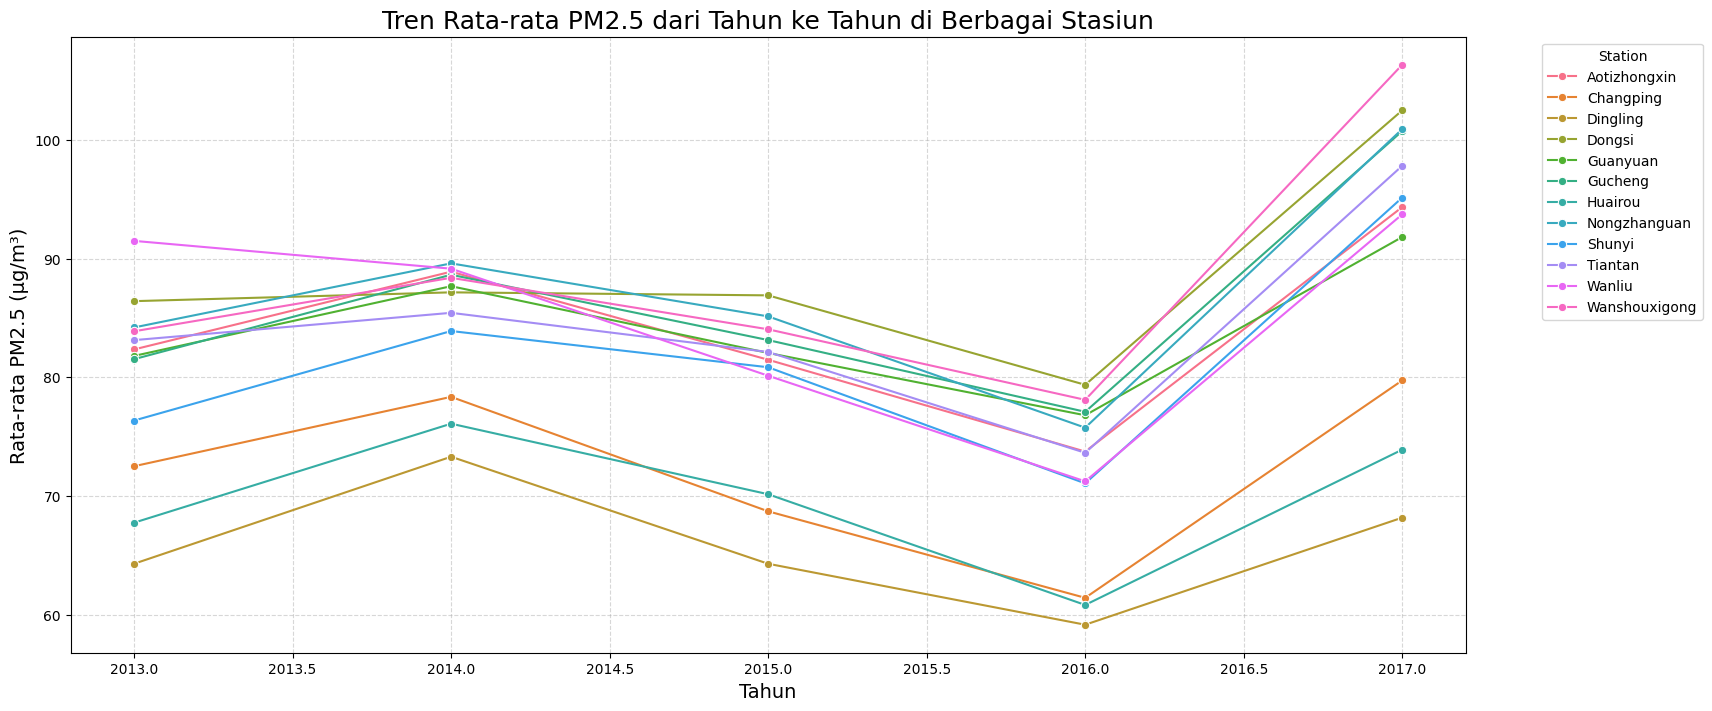

In [178]:
plt.figure(figsize=(18, 8))

sns.lineplot(
    data=yearly_pm25,
    x="year",
    y="PM2.5",
    hue="station",
    marker="o"
)

plt.title("Tren Rata-rata PM2.5 dari Tahun ke Tahun di Berbagai Stasiun", fontsize=18)
plt.xlabel("Tahun", fontsize=14)
plt.ylabel("Rata-rata PM2.5 (µg/m³)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

**Visualisasi Stasiun dengan PM2.5 Tertinggi & Terendah pada Tahun Terakhir (2017)**

Karena tahun terakhir adalah 2017, kita bandingkan kualitas udara antar stasiun.

/tmp/ipython-input-458546382.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-458546382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


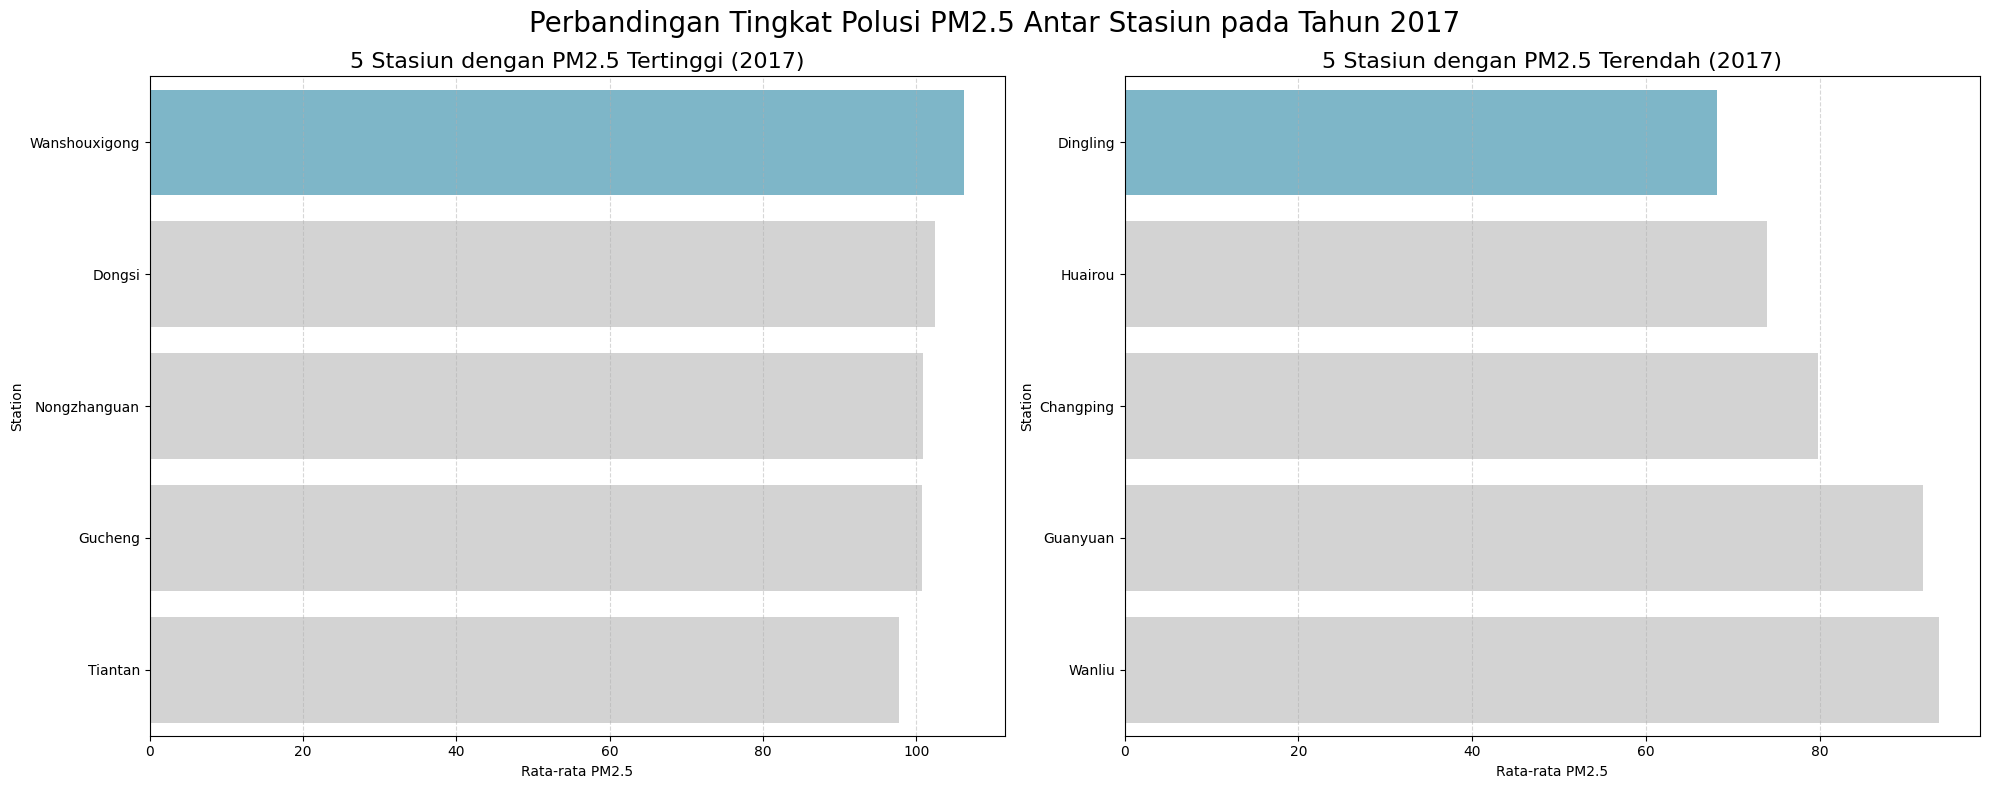

In [179]:
df_2017 = df[df["year"] == 2017]

pollution_2017 = df_2017.groupby("station", as_index=False)["PM2.5"].mean()

top_pm25 = pollution_2017.sort_values("PM2.5", ascending=False).head(5)
bottom_pm25 = pollution_2017.sort_values("PM2.5", ascending=True).head(5)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Warna highlight
colors = ["#72BCD4"] + ["#D3D3D3"] * 4

# Top 5 stasiun dengan PM2.5 tertinggi
sns.barplot(
    data=top_pm25,
    x="PM2.5",
    y="station",
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("5 Stasiun dengan PM2.5 Tertinggi (2017)", fontsize=16)
ax[0].set_xlabel("Rata-rata PM2.5")
ax[0].set_ylabel("Station")
ax[0].grid(axis="x", linestyle="--", alpha=0.5)

# Bottom 5 stasiun dengan PM2.5 terendah
sns.barplot(
    data=bottom_pm25,
    x="PM2.5",
    y="station",
    palette=colors,
    ax=ax[1]
)
ax[1].set_title("5 Stasiun dengan PM2.5 Terendah (2017)", fontsize=16)
ax[1].set_xlabel("Rata-rata PM2.5")
ax[1].set_ylabel("Station")
ax[1].grid(axis="x", linestyle="--", alpha=0.5)

plt.suptitle("Perbandingan Tingkat Polusi PM2.5 Antar Stasiun pada Tahun 2017", fontsize=20)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh temperatur terhadap tingkat polutan PM2.5 dan PM10 secara global?

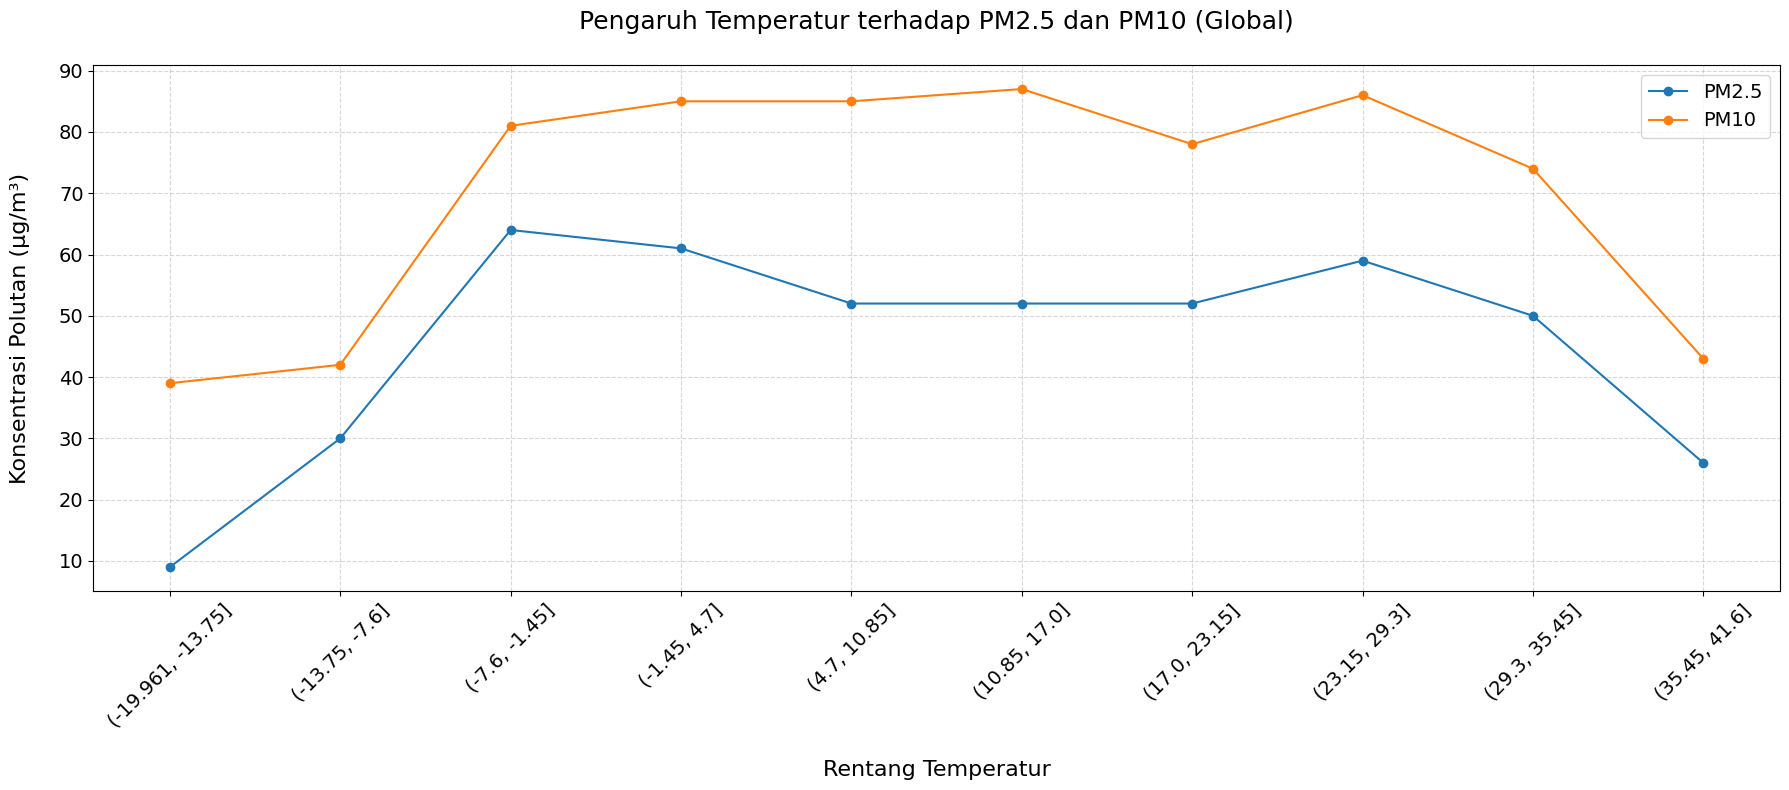

In [180]:
df_temp = df.copy()

df_temp["temp_bin"] = pd.cut(df_temp["TEMP"], bins=10)

temp_pm = df_temp.groupby("temp_bin", observed=True)[["PM2.5", "PM10"]].median()

plt.figure(figsize=(18, 8))

plt.plot(
    temp_pm.index.astype(str),
    temp_pm["PM2.5"],
    marker='o',
    label="PM2.5"
)

plt.plot(
    temp_pm.index.astype(str),
    temp_pm["PM10"],
    marker='o',
    label="PM10"
)

plt.title("Pengaruh Temperatur terhadap PM2.5 dan PM10 (Global)\n", fontsize=18)
plt.xlabel("\nRentang Temperatur", fontsize=16)
plt.ylabel("Konsentrasi Polutan (µg/m³)\n", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi tren tahunan dan perbandingan antar stasiun, konsentrasi PM2.5 menunjukkan pola fluktuatif dengan penurunan yang relatif seragam pada tahun 2016, namun diikuti oleh peningkatan signifikan di hampir seluruh stasiun pada tahun 2017 yang mengindikasikan penurunan kualitas udara secara menyeluruh. Stasiun Wanshouxigong secara konsisten mencatat tingkat PM2.5 yang lebih tinggi dibandingkan stasiun lainnya. sementara Dingling memiliki tingkat polusi yang relatif lebih rendah. Perbedaan ini menunjukkan bahwa faktor lokasi dan intensitas aktivitas di sekitar stasiun berperan penting dalam memengaruhi tingkat polusi udara, dengan wilayah perkotaan cenderung mengalami konsentrasi PM2.5 yang lebih tinggi dibandingkan wilayah pinggiran.
-  Temperatur dingin hingga menengah berkorelasi dengan tingginya polutan PM2.5 dan PM10 secara global. Sementara itu suhu ekstrem menurunkan tingkat polutan PM2.5 dan PM10 secara global.

## Analisis Lanjutan (Opsional)

1. Memilih rerata PM2.5 secara global pada tahun 2017
2. Membentuk koordinat geografis setiap stasiun pemantauan

In [181]:
df_2017 = df[df["year"] == 2017]

station_pm25 = df_2017.groupby("station", as_index=False)["PM2.5"].mean()

station_coords = {
    "Aotizhongxin": (40.00, 116.41),
    "Changping": (40.20, 116.23),
    "Dingling": (40.30, 116.22),
    "Dongsi": (39.93, 116.42),
    "Guanyuan": (39.94, 116.36),
    "Gucheng": (39.93, 116.23),
    "Huairou": (40.36, 116.64),
    "Nongzhanguan": (39.97, 116.47),
    "Shunyi": (40.14, 116.72),
    "Tiantan": (39.87, 116.43),
    "Wanliu": (39.99, 116.32),
    "Wanshouxigong": (39.87, 116.37)
}

station_pm25["lat"] = station_pm25["station"].map(lambda x: station_coords[x][0])
station_pm25["lon"] = station_pm25["station"].map(lambda x: station_coords[x][1])

3. Konversi ke GeoDataFrame (GeoPandas)

In [182]:
geometry = [Point(xy) for xy in zip(station_pm25["lon"], station_pm25["lat"])]

gdf = gpd.GeoDataFrame(
    station_pm25,
    geometry=geometry,
    crs="EPSG:4326"
)

gdf

station       PM2.5    lat     lon              geometry
0    Aotizhongxin   94.327684  40.00  116.41     POINT (116.41 40)
1       Changping   79.743644  40.20  116.23   POINT (116.23 40.2)
2        Dingling   68.195975  40.30  116.22   POINT (116.22 40.3)
3          Dongsi  102.466808  39.93  116.42  POINT (116.42 39.93)
4        Guanyuan   91.810381  39.94  116.36  POINT (116.36 39.94)
5         Gucheng  100.725847  39.93  116.23  POINT (116.23 39.93)
6         Huairou   73.918785  40.36  116.64  POINT (116.64 40.36)
7    Nongzhanguan  100.892655  39.97  116.47  POINT (116.47 39.97)
8          Shunyi   95.126059  40.14  116.72  POINT (116.72 40.14)
9         Tiantan   97.802613  39.87  116.43  POINT (116.43 39.87)
10         Wanliu   93.716102  39.99  116.32  POINT (116.32 39.99)
11  Wanshouxigong  106.306144  39.87  116.37  POINT (116.37 39.87)

4. Plot peta sebaran PM2.5

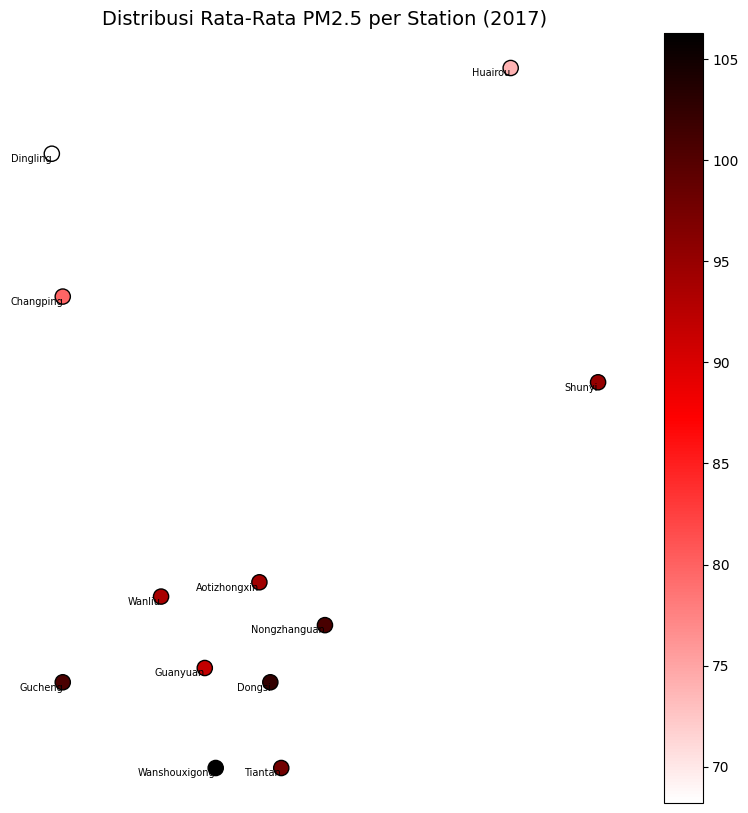

In [183]:
cmap_custom = LinearSegmentedColormap.from_list("pm25_dark",["#ffffff", "#ff0000", "#000000"])

fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column="PM2.5",
    cmap=cmap_custom,
    legend=True,
    markersize=120,
    ax=ax,
    edgecolor="black"
)

for x, y, label in zip(
    gdf.geometry.x,
    gdf.geometry.y,
    gdf["station"]
):
    ax.text(
        x,
        y,
        label,
        fontsize=7,
        ha="right",
        va="top"
    )

ax.set_title("Distribusi Rata-Rata PM2.5 per Station (2017)", fontsize=14)
ax.set_axis_off()
plt.show()

Pada visualisasi dengan GeoPandas di atas semakin gelap warna titik maka semakin tinggi tingkat PM2.5 di stasiun pemantauan tersebut. Berdasarkan map tersebut terlihat bahwa Wanshouxigong menjadi stasiun pemantauan dengan tingkat pencemaran udara tertinggi, sedangkan Dingling menjadi stasiun pemantauan dengan tingkat pencemaran udara terendah berdasarkan polutan PM2.5 pada tahun 2017.

5. Peta interaktif dengan Folium

In [184]:
min_pm25 = station_pm25["PM2.5"].min()
max_pm25 = station_pm25["PM2.5"].max()

colormap = cm.LinearColormap(
    colors=["#ffffff", "#ff0000", "#000000"],
    vmin=min_pm25,
    vmax=max_pm25
)
colormap.caption = "Rata-rata PM2.5 (µg/m³)"

m = folium.Map(location=[39.9, 116.4], zoom_start=10)

for _, row in station_pm25.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=10,
        popup=f"""
        <b>{row['station']}</b><br>
        PM2.5: {row['PM2.5']:.2f} µg/m³
        """,
        color=colormap(row["PM2.5"]),
        fill=True,
        fill_color=colormap(row["PM2.5"]),
        fill_opacity=0.8
    ).add_to(m)

colormap.add_to(m)

m

Pada map Folium di atas semakin gelap warna titik maka semakin tinggi tingkat PM2.5 di stasiun pemantauan tersebut. Berdasarkan map tersebut terlihat bahwa Wanshouxigong menjadi stasiun pemantauan dengan tingkat pencemaran udara tertinggi, sedangkan Dingling menjadi stasiun pemantauan dengan tingkat pencemaran udara terendah berdasarkan polutan PM2.5 pada tahun 2017.

#### **Tujuan Analisis Geospasial:**

Analisis geospasial menggunakan GeoPandas dan Folium digunakan untuk menganalisis dan memvisualisasikan distribusi pencemaran udara secara spasial guna mengidentifikasi perbedaan kualitas udara dan hotspot pencemaran antar wilayah..

## Conclusion

- Berdasarkan visualisasi tren tahunan dan perbandingan antar stasiun, konsentrasi PM2.5 menunjukkan pola fluktuatif dengan penurunan yang relatif seragam pada tahun 2016, namun diikuti oleh peningkatan signifikan di hampir seluruh stasiun pada tahun 2017 yang mengindikasikan penurunan kualitas udara secara menyeluruh. Stasiun Wanshouxigong secara konsisten mencatat tingkat PM2.5 yang lebih tinggi dibandingkan stasiun lainnya. sementara Dingling memiliki tingkat polusi yang relatif lebih rendah. Perbedaan ini menunjukkan bahwa faktor lokasi dan intensitas aktivitas di sekitar stasiun berperan penting dalam memengaruhi tingkat polusi udara, dengan wilayah perkotaan cenderung mengalami konsentrasi PM2.5 yang lebih tinggi dibandingkan wilayah pinggiran.
-  Temperatur dingin hingga menengah berkorelasi dengan tingginya polutan PM2.5 dan PM10 secara global. Sementara itu suhu ekstrem menurunkan tingkat polutan PM2.5 dan PM10 secara global.